# **Project Name**    -  Integrated retail analytics



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Author**          - Aparna Praturi


# **Project Summary -**

# **GitHub Link -**

# **Problem Statement**


# **Part-I. Data Preparation and EDA**

## ***1. Knowing Data***

### 1.1. Importing Libraries

In [1]:
# Installling numpy version compatible with pmdarima

# !pip uninstall -y numpy
# !pip install numpy==1.26.4
# !pip install pmdarima

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm

# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.base import BaseEstimator, TransformerMixin
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.seasonal import STL

# from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import apriori, association_rules





# from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import  RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# from sklearn.model_selection import KFold

from xgboost import XGBRegressor
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 1.2 Loading Data

In [ ]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:

# Defining the path to data files

sales = '/content/drive/MyDrive/Data science/Datasets/Advanced ML/sales data-set.csv'
features = '/content/drive/MyDrive/Data science/Datasets/Advanced ML/Features data set.csv'
stores = '/content/drive/MyDrive/Data science/Datasets/Advanced ML/stores data-set.csv'

# Loading data to df
dfs = {}

try:
  df_sales = pd.read_csv(f'{sales}')
  df_features = pd.read_csv(f'{features}')
  df_stores = pd.read_csv(f'{stores}')
  print(f"Data loaded into successfully!")

except FileNotFoundError:
    print(f"Error: The file(s)  were not found. Please check the path.")

except pd.errors.EmptyDataError:
    print(f"Error: The file(s)  is empty. Please check the file content.")

except pd.errors.ParserError:
    print(f"Error: There was a problem parsing the file(s) . Please check the file(s) format.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

### 1.3. Dataset First View

In [ ]:
# Top 5 rows of df_sales
df_sales.head()

In [ ]:
# Top 5 rows of df_stores
df_stores.head()


In [ ]:
# Top 5 rows of df_features
df_features.head()

In [ ]:
# df_sales Info

df_sales.info()

In [ ]:
# df_features info
df_features.info()

In [ ]:
#df_storesinfo
df_stores.info()

#### 1.4  Checking for Duplicate and Null Values

In [ ]:
# Dataset Duplicate Value Count

print(f'No. of duplicated rows in df_features: {len(df_features[df_features.duplicated()])}')
print(f'No. of duplicated rows in df_stores: {len(df_stores[df_stores.duplicated()])}')
print(f'No. of duplicated rows in df_sales: {len(df_sales[df_sales.duplicated()])}')

In [ ]:
# Null Values Count

df_sales.isnull().sum()

In [ ]:
df_stores.isnull().sum()

In [ ]:
df_features.isnull().sum()

### 1.5. Understanding Variables

**Definitions of the variables:**

In [ ]:
## Checking Unique Values
# Unique values in sales data
[{i:df_sales[i].nunique()} for i in df_sales.columns]

In [ ]:
# Unique values in features data
[{i:df_features[i].nunique()} for i in df_features.columns]

In [ ]:
# Unique values in stores data
[{i:df_stores[i].nunique()} for i in df_stores.columns]

## ***2. Data wrangling***

### 2.1. Coverting date features into datetime objects

In [ ]:
# Converting Date in features data into a datetime object
df_features['Date'] = pd.to_datetime(df_features['Date'], format = "%d/%m/%Y")

# coverting date col of sales data into datetime object
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format = "%d/%m/%Y")

### 2.2 Handling missing values

There are missing values only in **df_features**.

In [ ]:
# Filling missing values in Marksown features with 0

df_features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] =  df_features[
    ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

To fill the unemployment and CPI values, we first check their trend with date

In [ ]:
# checking trend of unemployment and CPT

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x='Date', y='Unemployment', hue='Store', data=df_features, ax=axs[0])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Unemployment')
axs[0].set_title('Trend of Unemployment')
axs[0].grid()

sns.scatterplot(x='Date', y='CPI', hue='Store', data=df_features, ax=axs[1])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('CPI')
axs[1].set_title('Trend of CPI')
axs[1].grid()


As the trends of unemployment and cpi vary contionusly with date, we impute the missing values in these features by linear interpolation.

In [ ]:
# iMPUTING THE NAN VALUES UNEMPLOYMENT AND cpi VALUES BY INTERPOLATING THE STORE TRENDS

df_features['cpi'] = df_features.groupby('Store')['CPI'].transform(
    lambda x: x.interpolate(method='linear'))

df_features['unemployment'] = df_features.groupby('Store')['Unemployment'].transform(
    lambda x: x.interpolate(method='linear'))

# Dropping the old features
df_features.drop(columns = ['CPI', 'Unemployment'], inplace =True);

In [ ]:
# Checking the misssing values
df_features.isna().sum()

### 2.3. Merging the datasets

In [ ]:
# Merging stores dataset with features dataset on common column Store
df_merge1 = pd.merge(df_features, df_stores, on='Store', how = 'left')

# Merging  new features dataset with sales dataset on common columns 'Date','Store' and 'IsHoliday'
df_merged = pd.merge(df_sales, df_merge1, on=['Date','Store','IsHoliday'], how='left')

In [ ]:
# final merged dataset info
df_merged.info()

### 2.4. Extracting features from date

In [ ]:
#  Define a function to Extract year, month from the date

def extract_from_date(df, date_col):

    df['date'] = pd.to_datetime(df[date_col], format = "%d/%m/%Y")
    df['Year'] = df['date'].dt.year.astype(int)
    df['Month'] = df['date'].dt.month.astype(int)
    df['WeekOfYear'] = df['date'].dt.isocalendar().week.astype(int)
    return
extract_from_date(df_merged, 'Date')

In [ ]:
# Creating Total MarkDown
df_merged['Total_MarkDown'] = df_merged[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)

Therefore,  have converted the date to a date_time object and extracted the year, month, weekday, week and date to separate variables to enable detailed analysis.


In [ ]:
df_forecast = df_merged.copy()

## ***3. Data Visualisation and EDA***

#### Chart-1: Distribution plots of numerical features

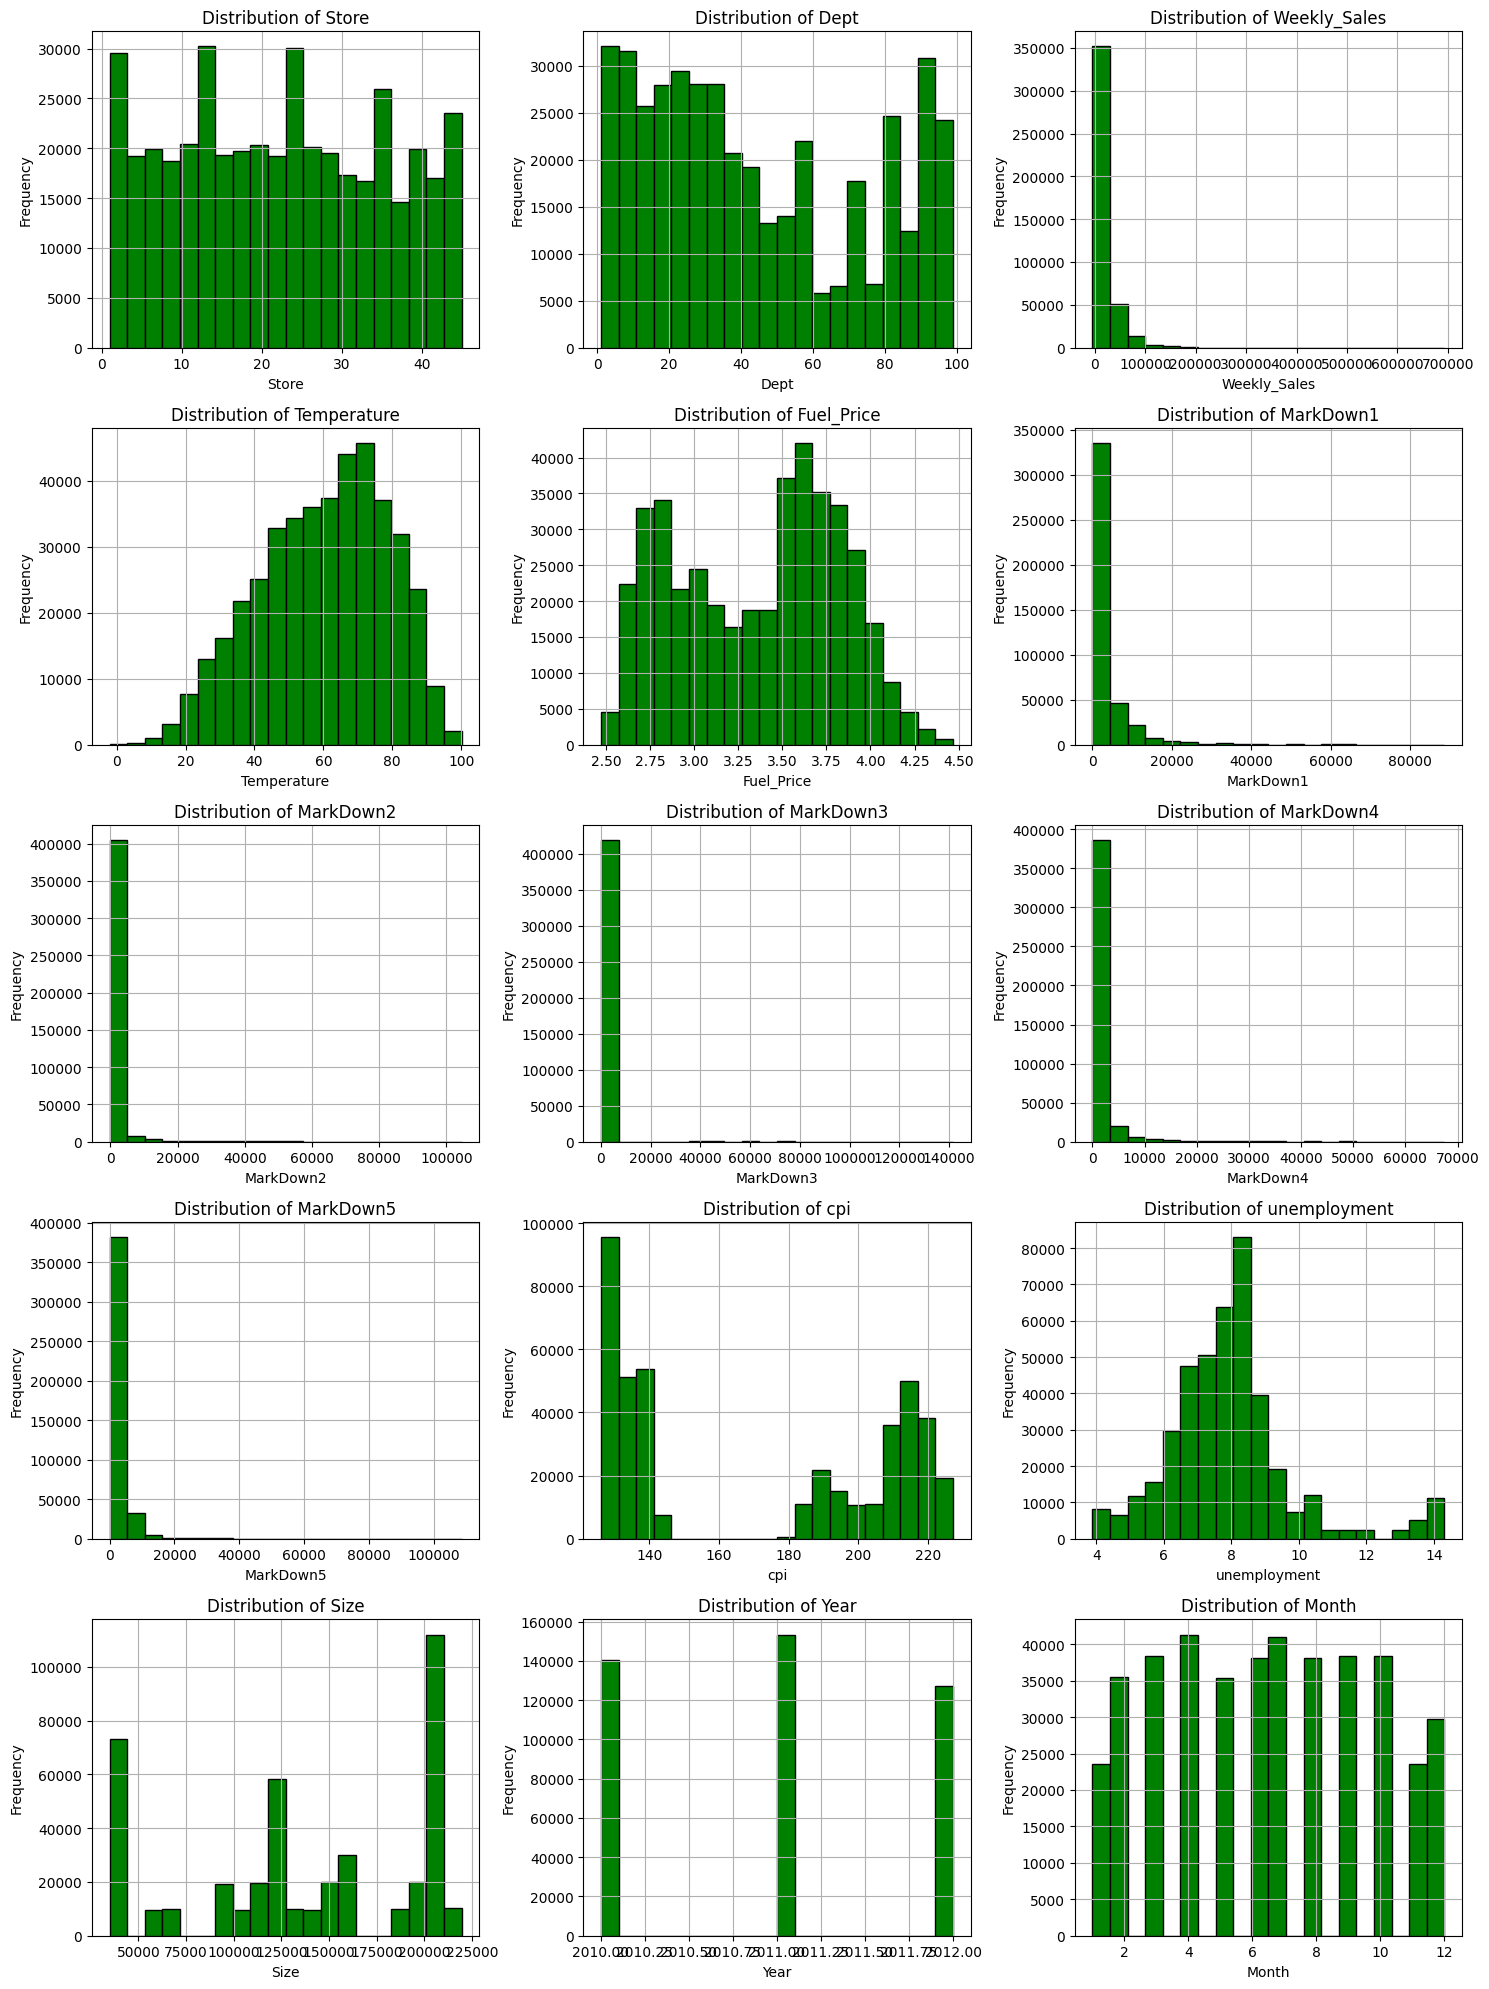

In [ ]:
# Chart - 1 Distribution plots of numerical features

# Create subplots

fig, axs = plt.subplots(5, 3, figsize=(15, 20))
axs = axs.flatten()

num_cols = [col for col in df_merged.columns if df_merged[col].dtypes == 'int64' \
            or df_merged[col].dtypes == 'float64']

for i, col in enumerate(num_cols):
    if i < len(axs):
        # Histogram
        axs[i].hist(df_merged[col], bins=20, color='green', edgecolor='black')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Distribution of {col}')
        axs[i].grid(True)

# Show plots()
plt.tight_layout()
plt.show()

##### **Insights:**


1. Features 'Store', 'Dept.' are actually categorical variables, though they have numeric values..hence we must use frequency encoding to transform them.

2. All the markdowns, 'weekly sales' are skewed, poisson-like distributions. Therefore we log_transform them before scaling.

3. Month is a cyclical feature. Therefore we use cyclical encoding on it.

4. We will use 2010 as base year and subtract other years from it.

#### Chart - 2:  Trends of CPI, Fuel price, Unemployment and Weekly Sales vary over months of  a year.

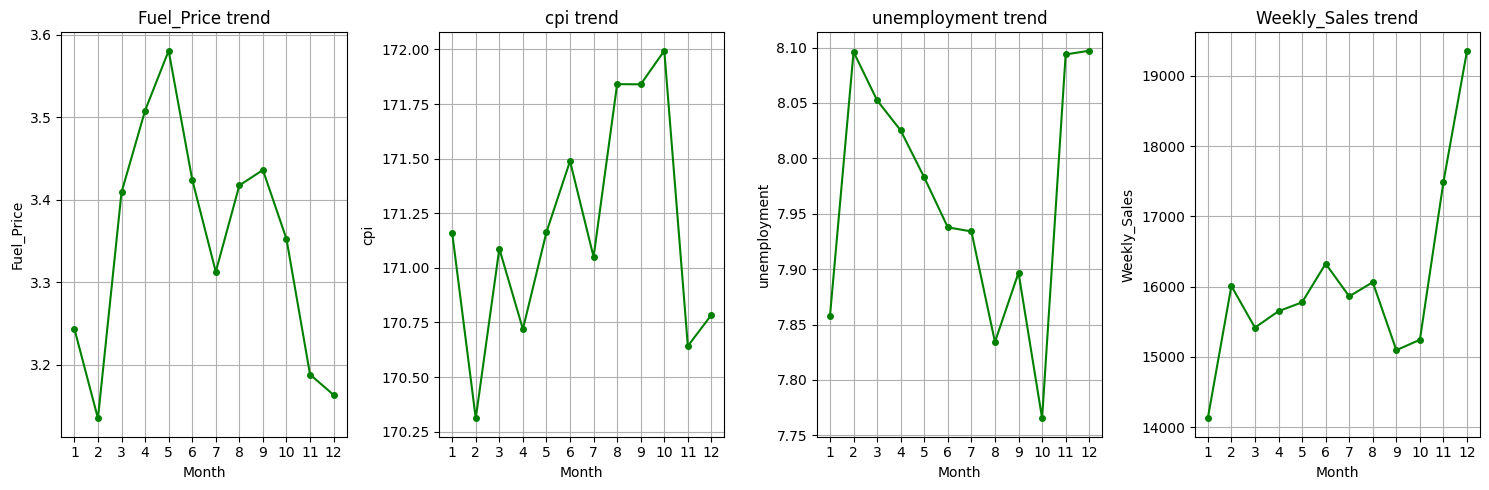

In [ ]:
df_merged['Month'] = df_merged['Month'].astype(int)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
cols = [ 'Fuel_Price', 'cpi', 'unemployment','Weekly_Sales']

for i, col in enumerate(cols):
  y1 = df_merged.groupby(['Month'])[col].mean()
  x1 = df_merged.groupby(['Month'])[col].mean().index
  axs[i].plot(x1, y1, marker='o', markersize=4, color='green')
  axs[i].set_xlabel('Month')
  axs[i].set_xticks(x1)
  axs[i].set_ylabel(col)
  axs[i].set_title(f'{col} trend')
  axs[i].grid()


plt.tight_layout()
plt.show()

##### **Insights:**

1. **Fuel Price Trend**: Fuel prices started low, peaked around months 5 and 6, and then generally decreased towards the end of the year.

2. **CPI Trend:** The CPI plot shows a highly volatile trend, with sharp drops in months 2 and 6, and significant increases in months 4 and 8. The overall trend is a slight increase.

3. **Unemployment Trend:** The unemployment rate started high, dropped significantly in the first few months, and then remained relatively low and stable, with minor fluctuations, for the rest of the year.

4. **Weekly Sales Trend:** Theweekly sales started at a low of 14000, raised significantly in the first quarter, remained stable and then shot up in the last quarter, mostly qwing to the holiday season.





Unemployment trend appears to have the strongest and most logical relationship with weekly sales . While factors like fuel prices and CPI are important economic indicators, their short-term fluctuations in this dataset are seemingly overshadowed by seasonal consumer behavior and a stabilizing labor market, both of which are contributing to a strong and rising trend in weekly sales.

#### Chart - 3:  Average weekly sales of different store types and over holidays

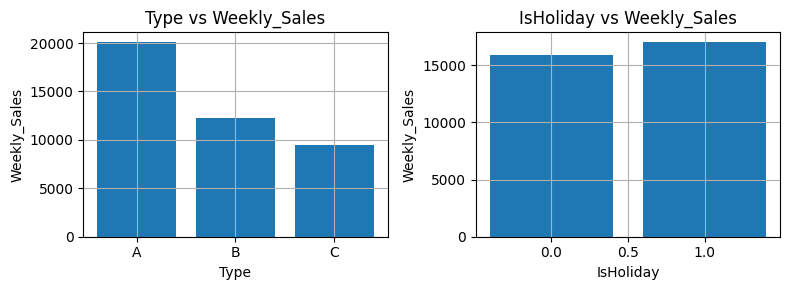

In [ ]:
# Plot bar garphs

fig, axs = plt.subplots(1, 2, figsize=(8, 3))


x1 = df_merged.groupby('Type')['Weekly_Sales'].mean().index
y1 = df_merged.groupby('Type')['Weekly_Sales'].mean()

axs[0].bar(height=y1, x=x1)
axs[0].set_xlabel('Type')
axs[0].set_ylabel('Weekly_Sales')
axs[0].set_title('Type vs Weekly_Sales')
axs[0].grid(True)

x = df_merged.groupby('IsHoliday')['Weekly_Sales'].mean().index
y = df_merged.groupby('IsHoliday')['Weekly_Sales'].mean()

axs[1].bar(height=y, x=x)
axs[1].set_xlabel('IsHoliday')
axs[1].set_ylabel('Weekly_Sales')
axs[1].set_title('IsHoliday vs Weekly_Sales')
axs[1].grid(True)

plt.tight_layout()
plt.show()



##### **Insights:**


1. **Sales by Store Type(Size):** There are significant differences in average sales based on store type. Type "A" stores have the highest average weekly sales reaching 20000, followed by Type "B," with Type "C" having the lowest.

2. **Holiday vs. Non-Holiday Sales:** Stores experience higher average weekly sales during holiday weeks compared to non-holiday weeks. The bar for "IsHoliday = 1.0" (holiday) is noticeably taller than the bar for "IsHoliday = 0.0" (non-holiday).

#### Chart - 4:  Stores with highest and lowest sales

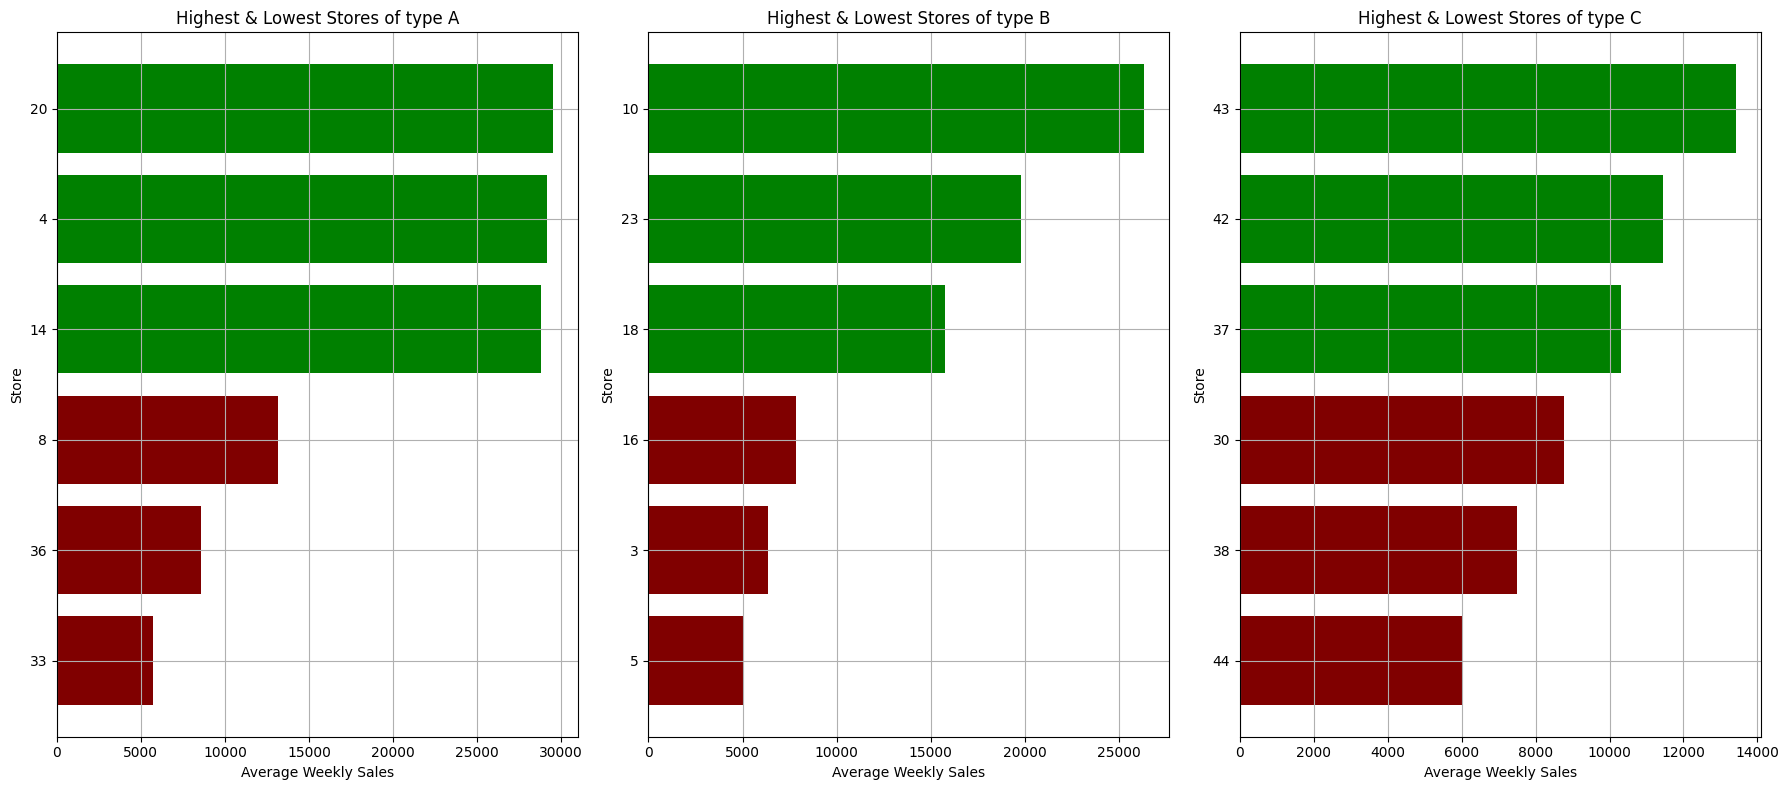

In [ ]:
# stores with highest and lowest sales for each type
df_merged['Store'] = df_merged['Store'].astype(str)



fig, axs = plt.subplots(1, 3, figsize=(18, 8))


for i, t in enumerate(['A', 'B', 'C']):

    grouped = df_merged[df_merged['Type'] == t].groupby('Store')['Weekly_Sales'].mean()

    # Highest 3
    top_stores = grouped.sort_values(ascending=False).head(3)
    # Lowest 3
    bottom_stores = grouped.sort_values(ascending=True).head(3)

    # Combine both
    combined = pd.concat([top_stores, bottom_stores]).sort_values()

    # Plot
    colors = ['maroon'] * len(top_stores) + ['green'] * len(bottom_stores)
    axs[i].barh(combined.index, combined.values, color=colors)
    axs[i].set_title(f"Highest & Lowest Stores of type {t}")
    axs[i].set_xlabel("Average Weekly Sales")
    axs[i].set_ylabel("Store")
    axs[i].grid(True)


plt.tight_layout()
plt.show()

df_merged['Store'] = df_merged['Store'].astype(int)

##### **Insights:**

**Type A Stores:**

* Highest Performers: Stores  14, 4, and 20 have weekly sales close to 28k–29k, showing very strong performance.

* Lowest Performers: Stores 33 and 36 are the weakest, with sales dropping to ~6k–9k, which is significantly below the top performers.

* Insight: Wide gap in sales between top and bottom (almost 5x difference).

**Type B Stores:**

* Highest Performers: Store 10 stands out with sales above 26k, others are around 15k–20k.

* Lowest Performers: Sales for the weakest stores are between 5k–8k.

* Insight: Gap between top and bottom is also large (~3–5x), with one dominant store (Store 10).

**Type C Stores**

* Highest Performers: Store 43 leads with ~13.5k, followed by stores 42, 37, 30, 38.

* Lowest Performers: Even the lowest sales (Store 44, ~6k) aren’t drastically below the average for type C.

* Insight: Compared to A and B, C stores have smaller sales overall and smaller performance gaps between top and bottom.

**Overall Insight:**

Type C stores have much smaller sales overall (max ~13k) and more consistency across stores, with less variation between top and bottom performers.

#### Chart - 5:  Stores with highest and lowest sales after normalising for Size of store

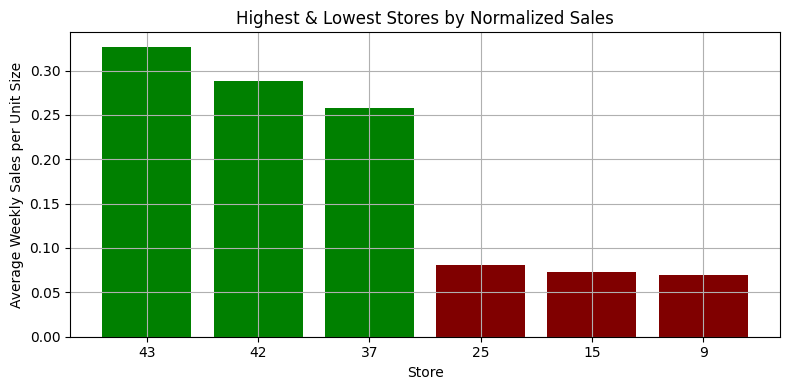

In [ ]:
df_merged['Store'] = df_merged['Store'].astype(str)

# Normalized sales
df_merged['sales_vs_size'] = df_merged['Weekly_Sales'] / df_merged['Size']

# Aggregate by store (mean normalized sales)
store_norm = df_merged.groupby('Store', as_index=False)['sales_vs_size'].mean()

# Top 5 and bottom 5 stores
top_stores_normalised = store_norm.sort_values(by='sales_vs_size', ascending=False).head(3)
bottom_stores_normalised = store_norm.sort_values(by='sales_vs_size', ascending=True).head(3)

# Combine them
combined_normalised = pd.concat([top_stores_normalised, bottom_stores_normalised]).sort_values(
    by='sales_vs_size', ascending=False)
colors = ['green'] * len(top_stores_normalised) + ['maroon'] * len(bottom_stores_normalised)
# Plot
plt.figure(figsize=(8,4))
plt.bar(combined_normalised['Store'], combined_normalised['sales_vs_size'], color=colors)
plt.title("Highest & Lowest Stores by Normalized Sales")
plt.ylabel("Average Weekly Sales per Unit Size")
plt.xlabel("Store")
plt.grid(True)

plt.tight_layout()
plt.show()



##### **Insights:**

**Highest Normalized Sales:**

* Stores 43, 42, 37

* These stores achieve much higher sales per unit size, with Store 43 leading at ~0.33.

* This means these stores are very efficient in utilizing their floor space – smaller or mid-sized stores doing more sales relative to their size.

**Lowest Normalized Sales:**

* Stores  25, 15, 9

* Their normalized sales are below 0.08, much lower than top stores.

* Suggests these stores may be under-utilizing space either they are large stores with lower demand, or their operations/foot traffic is weaker compared to others.

**Overall Insights:**

* **Efficiency vs. Size:** Some small/medium stores (like 43, 42, 37) punch well above their weight, showing high efficiency. Larger stores might not always guarantee better performance.

* **Gap Between Top & Bottom:** Top stores (0.20–0.33) perform almost 4–5 times better in normalized sales than bottom ones (~0.06–0.08).

* **Optimization Potential:** The bottom stores could be reviewed for issues like poor location, product mix, or operational inefficiencies.

#### Chart - 6 : Departments with highest and lowest sales

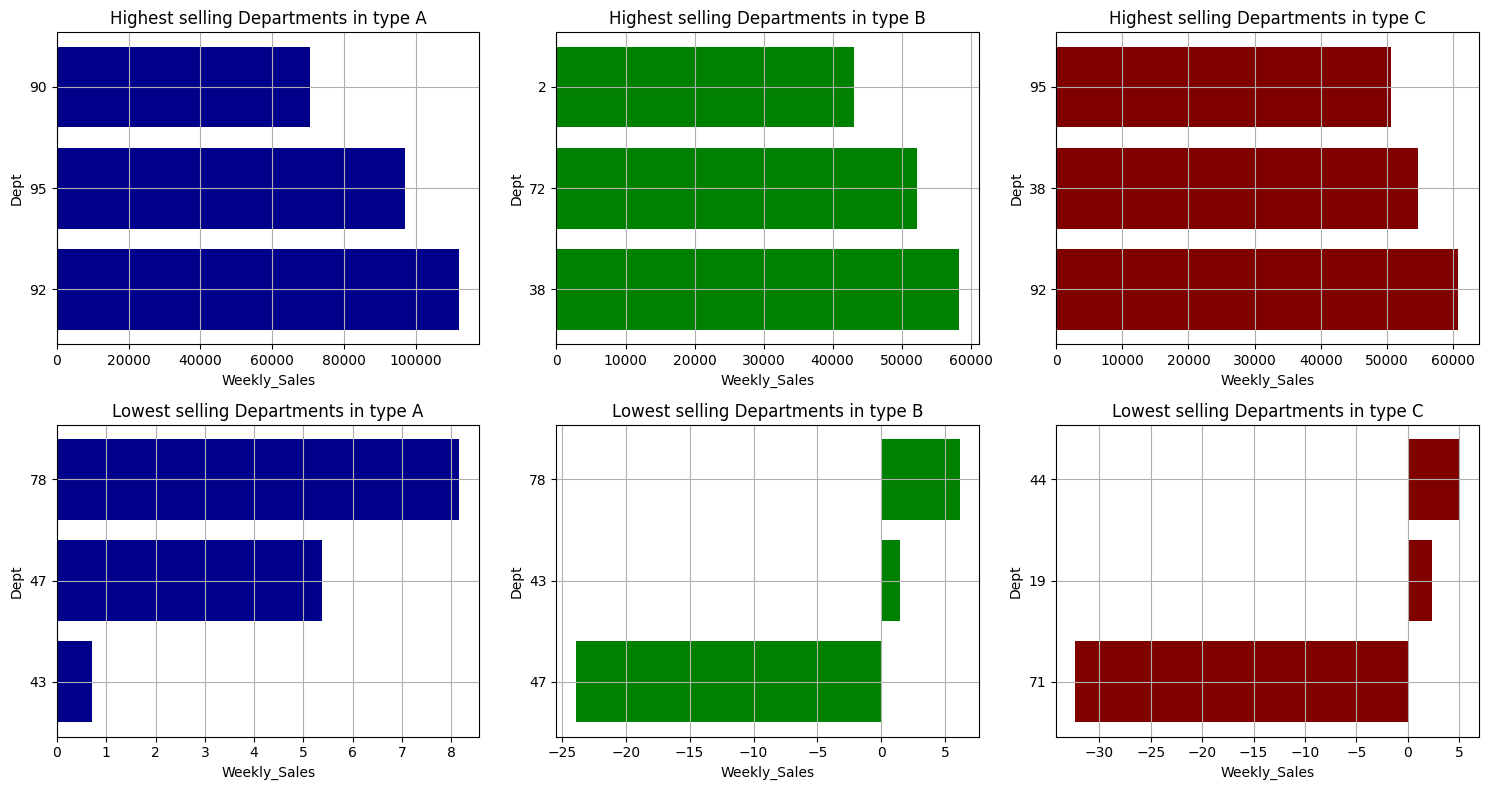

In [ ]:
# departments with highest and lowest sales for each type
df_merged['Dept'] = df_merged['Dept'].astype(str)

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()
colors = ['Darkblue', 'green', 'maroon']

for i, t in enumerate(['A', 'B', 'C']):
  x0 = df_merged.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head().index
  y0 = df_merged.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head()

  x = df_merged[df_merged['Type'] == t].groupby('Dept')['Weekly_Sales'].mean().sort_values(
      ascending=False).head(3).index
  y = df_merged[df_merged['Type'] == t].groupby('Dept')['Weekly_Sales'].mean().sort_values(
      ascending=False).head(3)

  x1 = df_merged[df_merged['Type'] == t].groupby('Dept')['Weekly_Sales'].mean().sort_values(
      ascending=True).head(3).index
  y1 = df_merged[df_merged['Type'] == t].groupby('Dept')['Weekly_Sales'].mean().sort_values(
      ascending=True).head(3)

  axs[i].barh(width=y, y=x, color = colors[i])
  axs[i].set_ylabel('Dept')
  axs[i].set_xlabel('Weekly_Sales')
  axs[i].set_title(f'Highest selling Departments in type {t}')
  axs[i].grid(True)

  axs[i+3].barh(width=y1, y=x1, color = colors[i])
  axs[i+3].set_ylabel('Dept')
  axs[i+3].set_xlabel('Weekly_Sales')
  axs[i+3].set_title(f'Lowest selling Departments in type {t}')
  axs[i+3].grid(True)

plt.tight_layout()
plt.show()

df_merged['Dept'] = df_merged['Dept'].astype(int)

##### **Insights:**

**Highest Selling Departments:**

* Type A: Departments 90, 95, 92 dominate, with sales reaching ~100k+ weekly. These are the strongest revenue drivers in Type A stores.

* Type B: Departments 2, 72, 38 lead, with sales around 45k–58k weekly. Lower absolute values compared to Type A, but still the top contributors in this type.

* Type C: Departments 95, 38, 92 are strongest, with sales ~50k–60k weekly. Indicates some overlap with Type A (e.g., Dept 92 & 95 are important across both).

**Lowest Selling Departments:**

* Type A: Departments 43, 47, 78 show extremely low sales (<10 weekly). Suggests these depts may be non-core or underperforming in Type A stores.

* Type B: Departments 43, 47, 78 also appear at the bottom. Dept 47 even shows negative weekly sales, suggesting frequent returns or markdowns.

* Type C: Departments 19, 44, 71 are the weakest.
Dept 71 shows large negative sales (~ -30), again suggesting returns dominating sales.

**Overall Insights:**

* Key Growth Drivers: Type A has the highest-grossing departments overall, with sales crossing 100k weekly.Type B & C have lower absolute sales but consistent performers (Dept 38, 92, 95 across both).

* Cross-Type Importance: Departments 92, 95, 38 repeatedly show up as high-performing across multiple store types, making them strategic categories.

* Problematic Departments: Departments 43, 47, 78 underperform in both Type A and B. Negative sales (Depts 47 in B and 71 in C) suggest return/refund heavy categories.

**Strategic Action:**

* Focus: Invest in and expand departments 92, 95, and 38 across all store types.

* Fix: Investigate high-return categories like Dept 47 (B) and Dept 71 (C).

* Evaluate: Departments 43 and 78 consistently underperform – consider repositioning or phasing out.

#### Chart 7: Trends of various Markdowns across months

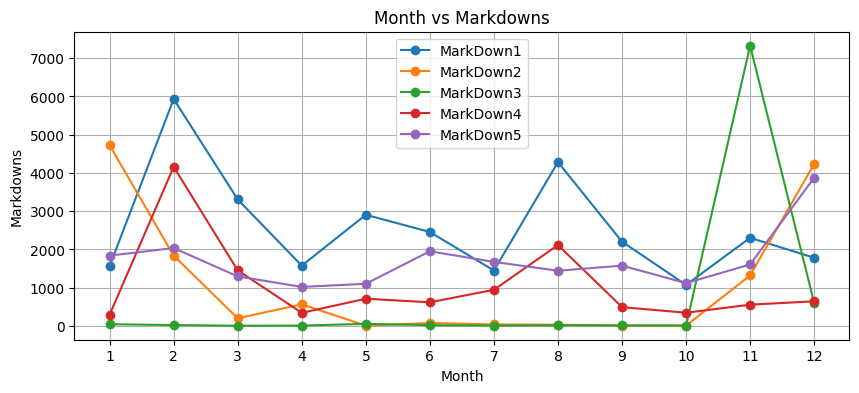

In [ ]:
# markdown vs month

fig = plt.figure(figsize=(10, 4))
for i, col in enumerate(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']):
  x = df_merged.groupby('Month')[col].mean().index
  y = df_merged.groupby('Month')[col].mean()

  plt.plot(x, y, label= col, marker = "o")
  plt.xlabel('Month')
  plt.xticks(x)
  plt.ylabel('Markdowns')
  plt.legend()
  plt.title('Month vs Markdowns')
  plt.grid()



##### **Insights:**



**MarkDown1:**

* Consistently active across most months.

* Peaks in Feb (6,000) and Aug (~4,200).

* Suggests it may be linked to seasonal promotions (e.g., clearance or pre-festive sales).

**MarkDown2:**

* Very high in Jan (~4,700), then falls sharply to near zero by May–Sep.

* Reappears strongly in Dec (~4,200).

* Likely tied to holiday-specific promotions (New Year, Christmas).

**MarkDown3:**

* Almost flat for most of the year, except for a huge spike in Nov (~7,200+).

* This strongly aligns with Black Friday or major festive events.

**MarkDown4:**

* Spikes in Feb (4,100) and Aug (~2,100).

* Minor activity elsewhere.

* Possibly targeted mid-season clearance events.

**MarkDown5:**

* More stable than others (steady ~1,000–2,000).

* Gradual rise toward Dec (~4,000).

* Suggests a supporting markdown program, not as event-driven but contributing steadily.

**Overall Insights:**

* Event-Driven Markdown Strategy: MarkDown2 (Jan & Dec), MarkDown3 (Nov), and MarkDown1/4 (Feb & Aug) are spike-driven, tied to major retail events/festivals.

* Consistent Contributor: MarkDown5 provides a baseline markdown effect throughout the year, unlike the others which are more volatile.

* Critical Sales Months: Nov, Dec, Jan, Feb, Aug are the markdown-heavy months, likely coinciding with holidays (Thanksgiving/Black Friday, Christmas, New Year, Valentine’s, back-to-school).

**Business Implication:**

* Retail strategy is heavily reliant on seasonal markdowns to drive sales surges.

* A more balanced approach could smoothen sales across “off-peak” months.

#### Chart 8: Weekly sales trend of each Store-Dept

In [ ]:
[store, dept] = list(map(int, (input('Enter the store and department separated by a comma').split(","))))

Enter the store and department separated by a comma1,2


/tmp/ipython-input-1427839334.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_temp = df_temp.groupby(['WeekOfYear']).agg({'Weekly_Sales':sum}).reset_index()


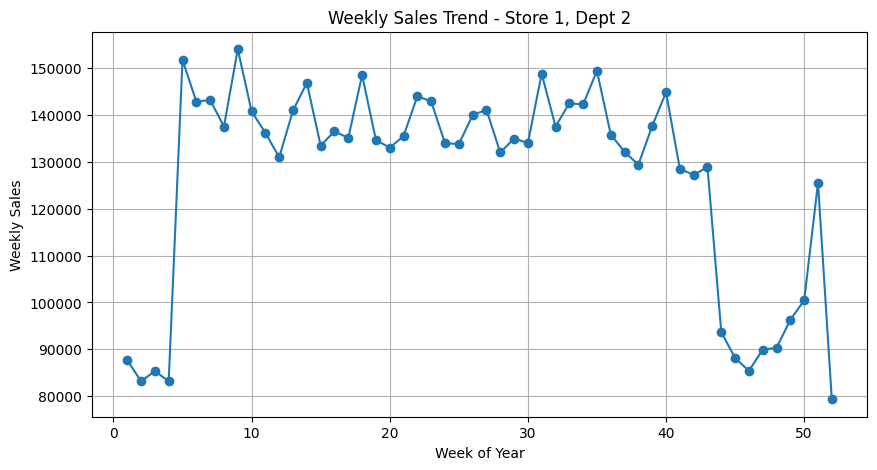

In [ ]:
df_temp = df_merged[(df_merged["Store"]==str(store)) & (df_merged["Dept"]==dept)]

df_temp = df_temp.groupby(['WeekOfYear']).agg({'Weekly_Sales':sum}).reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_temp['WeekOfYear'], df_temp['Weekly_Sales'], marker='o', linestyle='-')
plt.title(f"Weekly Sales Trend - Store {store}, Dept {dept}")
plt.xlabel("Week of Year")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

#### Chart-9: Trend of Weekly sales in different types of Stores

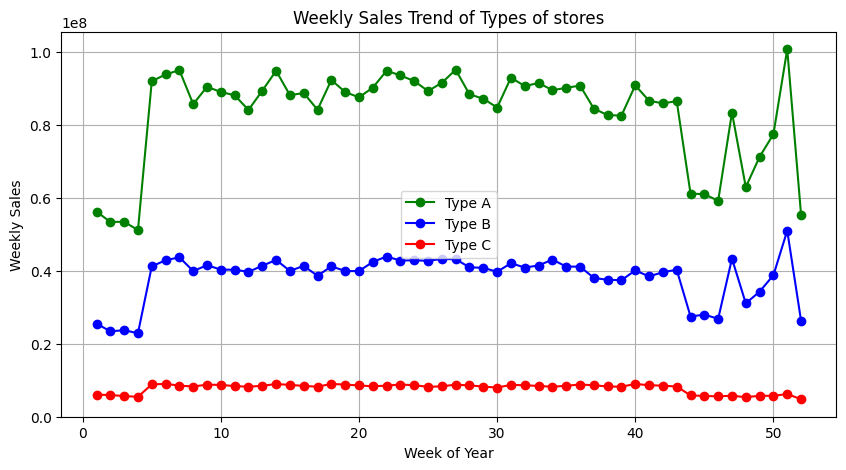

In [ ]:
df_temp = df_merged.groupby(['WeekOfYear'])['Weekly_Sales'].sum().reset_index()
df_temp1 = df_merged[df_merged['Type']=='A'].groupby(['WeekOfYear'])['Weekly_Sales'].sum().reset_index()
df_temp2 = df_merged[df_merged['Type']=='B'].groupby(['WeekOfYear'])['Weekly_Sales'].sum().reset_index()
df_temp3 = df_merged[df_merged['Type']=='C'].groupby(['WeekOfYear'])['Weekly_Sales'].sum().reset_index()


plt.figure(figsize=(10,5))


plt.plot(df_temp1['WeekOfYear'], df_temp1['Weekly_Sales'], marker='o', linestyle='-',
         color = 'green', label="Type A")
plt.plot(df_temp2['WeekOfYear'], df_temp2['Weekly_Sales'], marker='o', linestyle='-',
         color = 'blue', label="Type B")
plt.plot(df_temp3['WeekOfYear'], df_temp3['Weekly_Sales'], marker='o', linestyle='-',
         color = 'red', label="Type C")

plt.title(f"Weekly Sales Trend of Types of stores")
plt.xlabel("Week of Year")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()

##### **Insights:**

**Type A (Green Line):**

* Highest sales overall among all store types, averaging close to 90–100M weekly.

* Stable performance for most of the year, though there are noticeable dips around weeks 42–47.

* Large spike at week 51 (holiday season / year-end sales).

* Type A stores are the main revenue drivers in the business.

**Type B (Blue Line):**

* Moderate sales (~40–45M weekly).

* Shows similar dips around weeks 42–47, with a sharp rise in week 51.

* Type B is steady but clearly secondary to Type A in terms of sales contribution.

**Type C (Red Line):**

* Lowest sales (~8–10M weekly), but stable across the year.

* Slight seasonal variation, but no drastic spikes except a small increase mid-year.

* Type C contributes the least, but its stability suggests a niche role.

**Overall Insights:**

* Seasonality is strong: All store types show a holiday surge at week 51 and dips around weeks 42–47.

* Type A stores dominate: Contribute the majority of sales, with significantly higher revenue per week than B and C.

* Type B plays a supporting role: Consistent middle performer, mirroring Type A’s seasonality pattern.

* Type C is niche: Lowest sales but provides steady revenue; likely smaller-format stores.

**Business implication:**

* Type A should be the primary focus for inventory and promotional planning.

* Type B can be leveraged to support seasonal campaigns.

* Type C may need targeted strategies to boost efficiency or maintain cost-effectiveness.

#### Chart 10: Sales trends for top selling and bottom selling departments

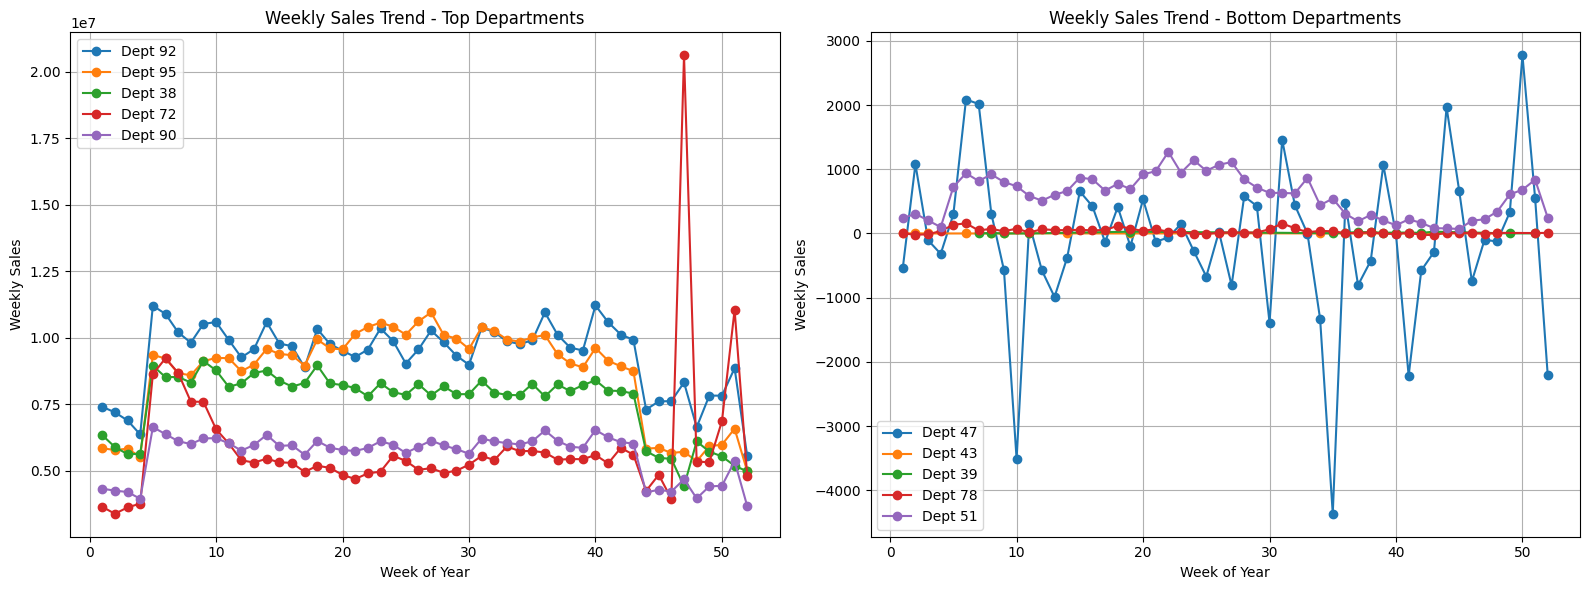

In [ ]:
# Aggregating sales over department
dept_sales = df_merged.groupby("Dept", as_index=False)['Weekly_Sales'].sum()


top_depts = dept_sales.sort_values(by="Weekly_Sales", ascending=False).head(5)['Dept'].tolist()
bottom_depts = dept_sales.sort_values(by="Weekly_Sales", ascending=True).head(5)['Dept'].tolist()

df_top = df_merged[df_merged['Dept'].isin(top_depts)]
df_bottom = df_merged[df_merged['Dept'].isin(bottom_depts)]


weekly_top = df_top.groupby(['WeekOfYear','Dept'])['Weekly_Sales'].sum().reset_index()
weekly_bottom = df_bottom.groupby(['WeekOfYear','Dept'])['Weekly_Sales'].sum().reset_index()


fig, axs = plt.subplots(1, 2, figsize=(16,6))

for dept in top_depts:
    temp = weekly_top[weekly_top['Dept']==dept]
    axs[0].plot(temp['WeekOfYear'], temp['Weekly_Sales'], marker='o', label=f"Dept {dept}")
axs[0].set_title("Weekly Sales Trend - Top Departments")
axs[0].set_xlabel("Week of Year")
axs[0].set_ylabel("Weekly Sales")
axs[0].legend()
axs[0].grid(True)


for dept in bottom_depts:
    temp = weekly_bottom[weekly_bottom['Dept']==dept]
    axs[1].plot(temp['WeekOfYear'], temp['Weekly_Sales'], marker='o', label=f"Dept {dept}")
axs[1].set_title("Weekly Sales Trend - Bottom Departments")
axs[1].set_xlabel("Week of Year")
axs[1].set_ylabel("Weekly Sales")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


##### **Insights:**

* Top vs Bottom Gap: Top depts make millions weekly, bottom depts struggle to cross a few thousand → a huge gap in contribution.

* Strategic Focus: Invest in and strengthen Depts 92, 95, 38 (steady high performers).

* Holiday-driven: Dept 72 needs special seasonal planning due to sharp spikes.

* Underperformers: Dept 47 requires urgent investigation (negative sales). Others may be candidates for repositioning or discontinuation.

#### Chart 11: Trends of Normalised top performing and Bottom performoing stores over months

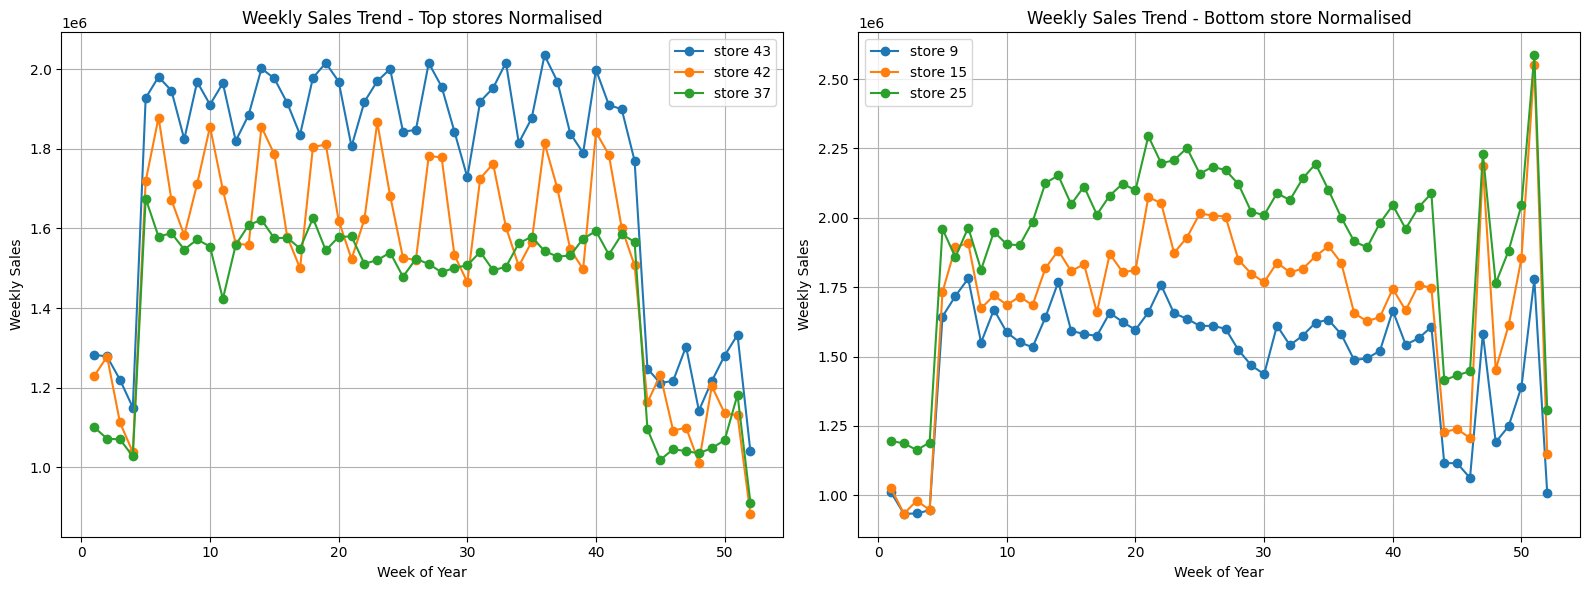

In [ ]:
# Making lists of top and bottom stores

top_stores = list(top_stores_normalised["Store"])
bottom_stores = list(bottom_stores_normalised["Store"])

df_top = df_merged[df_merged['Store'].isin(top_stores)]
df_bottom = df_merged[df_merged['Store'].isin(bottom_stores)]


weekly_top = df_top.groupby(['WeekOfYear','Store'])['Weekly_Sales'].sum().reset_index()
weekly_bottom = df_bottom.groupby(['WeekOfYear','Store'])['Weekly_Sales'].sum().reset_index()


fig, axs = plt.subplots(1, 2, figsize=(16,6))

for store in top_stores:
    temp = weekly_top[weekly_top['Store']==store]
    axs[0].plot(temp['WeekOfYear'], temp['Weekly_Sales'], marker='o', label=f"store {store}")
axs[0].set_title("Weekly Sales Trend - Top stores Normalised")
axs[0].set_xlabel("Week of Year")
axs[0].set_ylabel("Weekly Sales")
axs[0].legend()
axs[0].grid(True)


for store in bottom_stores:
    temp = weekly_bottom[weekly_bottom['Store']==store]
    axs[1].plot(temp['WeekOfYear'], temp['Weekly_Sales'], marker='o', label=f"store {store}")
axs[1].set_title("Weekly Sales Trend - Bottom store Normalised")
axs[1].set_xlabel("Week of Year")
axs[1].set_ylabel("Weekly Sales")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


##### **Insights:**

**Top Normalized Stores (43, 42, 37):**

* Very stable mid-year (weeks 10–35) around 1.5–2M.

* Small holiday bump (weeks 50–52), but less dramatic.

* Overall: steady, low seasonality.

**Bottom Normalized Stores (9, 15, 25):**

* More seasonal: small mid-year rise, sharp holiday spikes (~2.5M+).

* Also show deeper pre-holiday dips (weeks 43–46).

* Overall: heavier reliance on holidays, less consistent baseline.

Top stores = steady engines, Bottom stores = holiday-driven swings.

#### Chart 12: Correlation between Weekly sales and indicators like CPI, Unemployment, Fuel Price and MarkDowns

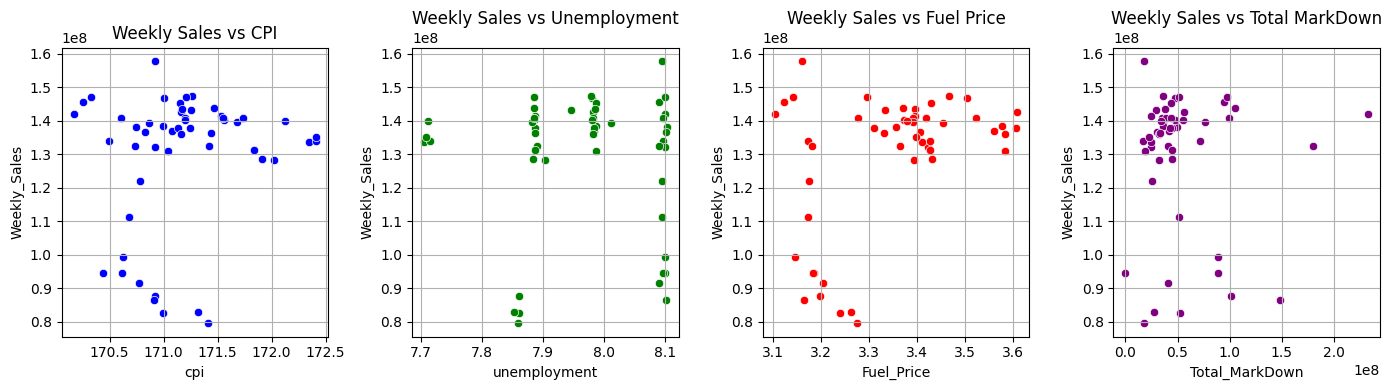

In [ ]:



# Aggregate weekly sales at WeekOfYear level
weekly_data = df_merged.groupby('WeekOfYear').agg({
    'Weekly_Sales':'sum',
    'cpi':'mean',
    'unemployment':'mean',
    'Fuel_Price':'mean',
    'Total_MarkDown':'sum'
}).reset_index()

# Plot
fig, axs = plt.subplots(1, 4, figsize=(14,4))

sns.scatterplot(data=weekly_data, x='cpi', y='Weekly_Sales', ax=axs[0], color="blue")
axs[0].set_title("Weekly Sales vs CPI")
axs[0].grid(True)

sns.scatterplot(data=weekly_data, x='unemployment', y='Weekly_Sales', ax=axs[1], color="green")
axs[1].set_title("Weekly Sales vs Unemployment")
axs[1].grid(True)

sns.scatterplot(data=weekly_data, x='Fuel_Price', y='Weekly_Sales', ax=axs[2], color="red")
axs[2].set_title("Weekly Sales vs Fuel Price")
axs[2].grid(True)

sns.scatterplot(data=weekly_data, x='Total_MarkDown', y='Weekly_Sales', ax=axs[3], color="purple")
axs[3].set_title("Weekly Sales vs Total MarkDown")
axs[3].grid(True)

plt.tight_layout()
plt.grid(True)
plt.show()


##### **Insights:**

**Weekly Sales vs CPI:**

* Sales remain fairly clustered between 170.5–171.5 CPI, with no clear upward or downward trend.

* A few points show sharp sales drops at higher CPI (~171+), suggesting that higher consumer prices may negatively impact sales for some weeks.

* Overall: Weak/negative relationship – as CPI increases, sales slightly weaken.

**Weekly Sales vs Unemployment:**

* Most data points are concentrated around 7.8–8.1 unemployment rate.

* Sales remain relatively stable despite changes in unemployment.

* A few dips in sales when unemployment is slightly higher (~8.0–8.1).

* Overall: Minimal correlation, unemployment doesn’t appear to strongly affect sales in this dataset.

**Weekly Sales vs Fuel Price:**

* Sales are spread across fuel prices 3.1–3.6, but there’s no obvious linear trend.

* Sales stay fairly stable even as fuel prices change, though there are some dips at lower prices (~3.1–3.2).

* Overall: Little to no correlation – fuel price fluctuations do not strongly influence weekly sales here.

**Weekly Sales vs Total MarkDown:**

* Stronger signal here: higher markdowns correlate with higher weekly sales spikes.

* Points show clustering at low markdown values (0–0.5e8), but sales peak when markdowns are higher (close to 1e8+).

* Suggests markdowns are effective promotional levers that boost weekly sales.

**Overall Insights:**

* External economic factors (CPI, Unemployment, Fuel Price) → show weak or no strong correlation with weekly sales in this dataset.

* Markdowns are impactful → sales increase when markdown activity is high, meaning promotions are a key sales driver.

* Business implication: While macroeconomic variables might set the backdrop, sales performance here is far more sensitive to internal retail levers (markdowns) than external factors.

#### Chart 13: Correlation Heatmap between all numerical features

<Axes: >

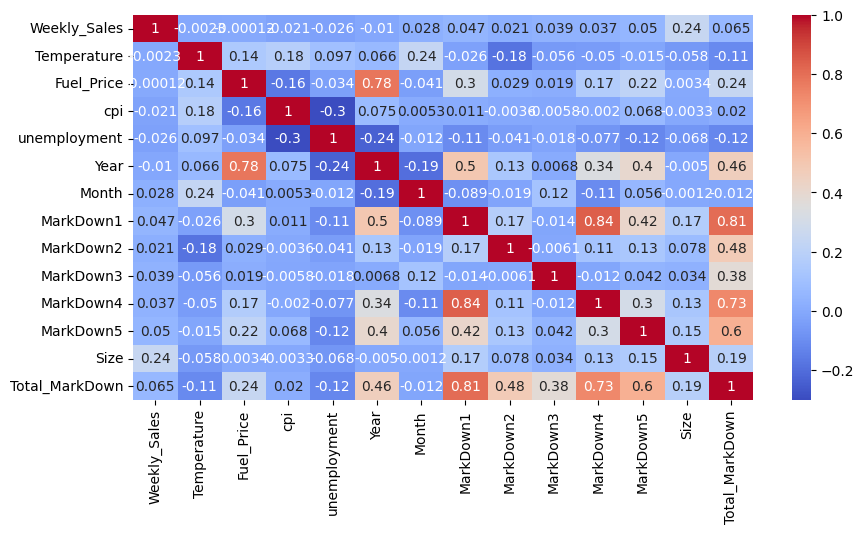

In [ ]:
cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'cpi', 'unemployment','Year',
        'Month', 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5',
        'Size', 'Total_MarkDown']
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df_merged[cols].corr(), annot=True, cmap='coolwarm', ax=axs)

##### **Insights:**

**Weekly Sales:**

* Weak correlations overall → sales are not strongly explained by CPI, fuel price, unemployment, temperature, or markdowns.

* Slight positive link with Size (0.24) → larger stores generally sell more.

* Negligible correlation with Total_MarkDown (~-0.07) → markdowns don’t directly translate into higher sales in this aggregated view.

**External Factors:**

* Fuel Price vs Temperature (0.78) → strong positive correlation, meaning higher temps coincide with higher fuel prices (seasonal effect).

* CPI vs Unemployment (-0.30) → negative relation, as expected economically.

**Markdowns:**

* MarkDown1, MarkDown4, MarkDown5 are highly correlated with each other (0.6–0.8).

* Total_MarkDown correlates strongly with individual markdowns (esp. MarkDown1: 0.81, MarkDown4: 0.73).

* This suggests redundancy: Total_MarkDown is a strong proxy for individual markdown variables.

**Key Takeaways:**

* Sales drivers not obvious from linear correlations — other methods (time-series, interactions, lag effects) may reveal markdown/seasonal impacts better.

* Store Size matters modestly (larger stores sell more).

* Markdown variables are multicollinear

* External factors show internal consistency (Fuel ↔ Temperature, CPI ↔ Unemployment), but don’t explain sales strongly.

## ***4. Anomaly Detection using Advanced ML Methods***

### 4.1. Feature Engineering

WE see that except 'Size', none of the features are stongly correlated with the 'Weekly_Sales'. This makes outlier detection difficult. Therefore, we engineer some features which make it easier for algorithms to detect outliers.

In [ ]:
# Calculating new features

df_merged['store_mean'] = df_merged.groupby('Store')['Weekly_Sales'].transform('mean')
df_merged['dept_mean'] = df_merged.groupby('Dept')['Weekly_Sales'].transform('mean')
df_merged['store_dept_mean'] = df_merged.groupby(['Store', 'Dept'])['Weekly_Sales'].transform('mean')

# Ratio-based features
df_merged['sales_vs_store'] = df_merged['Weekly_Sales'] / df_merged['store_mean'].dropna()
df_merged['sales_vs_dept'] = df_merged['Weekly_Sales'] / df_merged['dept_mean'].dropna()

# Create boolean flags for MarkDowns
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for col in markdown_cols:
    df_merged[f'{col}_flag'] = (df_merged[col] > 0).astype(int)


In [ ]:
%matplotlib inline
## 1. log transformation of skewed features
skewed_cols = ['Weekly_Sales','sales_vs_store', 'MarkDown1', 'MarkDown2', 'MarkDown3',
               'MarkDown4', 'MarkDown5','Total_MarkDown']

fig, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()

for i, col in enumerate(skewed_cols):
  df_merged[f'{col}_transformed'] = np.log1p(df_merged[col]).where(df_merged[col] > 0, 1)

  # Replace any  infinite values with NaN
  df_merged[f'{col}_transformed'] = df_merged[f'{col}_transformed'].replace([np.inf, -np.inf], np.nan)

  # Drop rows with NaN values in 'log_weekly_sales'
  df_merged.dropna(subset=[f'{col}_transformed'], inplace=True)

  # scaling using scaler
  #scaler = StandardScaler()
  scaler = RobustScaler()
  df_merged[f'{col}_scaled'] = scaler.fit_transform(df_merged[[f'{col}_transformed']])


  # Histogram
  axs[2*i+1].hist(df_merged[f'{col}_scaled'], bins=20, color='green', edgecolor='black')
  axs[2*i+1].set_xlabel(f'{col}_scaled')
  axs[2*i+1].set_ylabel('Frequency')
  axs[2*i+1].set_title(f'{col}_scaled')
  axs[2*i+1].grid(True)

  axs[2*i].hist(df_merged[col], bins=20, color='maroon', edgecolor='black')
  axs[2*i].set_xlabel(col)
  axs[2*i].set_ylabel('Frequency')
  axs[2*i].set_title(col)
  axs[2*i].grid(True)


# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
## 2. Scaling other numeric features
unskewed_cols = ['Temperature', 'Fuel_Price', 'cpi', 'unemployment', 'Size', 'sales_vs_dept',
                 'WeekOfYear']

# Scaling with standard scaler
for col in unskewed_cols:
  #scaler = StandardScaler()
  scaler = RobustScaler()
  df_merged[f'{col}_scaled'] = scaler.fit_transform(df_merged[[col]])

## 3. Frequency encoding store, dept
cat_cols = ['Dept','Store']
for col in cat_cols:
  freq_map = df_merged[col].value_counts().to_dict()
  df_merged[f'{col}_id_freq'] = df_merged[col].map(freq_map)
  df_merged[f'{col}_scaled'] = scaler.fit_transform(df_merged[[f'{col}_id_freq']])

## 4. Scaling year and month

# Scaling year by subtracting base year
base_year = 2010
df_merged['year_scaled'] = df_merged['Year']-base_year

# cyclical encoding of month
df_merged['month_sin_scaled'] = np.sin(2 * np.pi * df_merged['Month'] / 12)
df_merged['month_cos_scaled'] = np.cos(2 * np.pi * df_merged['Month'] / 12)
df_merged['weekofyear_scaled'] = np.cos(2 * np.pi * df_merged['WeekOfYear'] /52)

## 5. Convert is_holiday to 0/1
df_merged['IsHoliday_scaled'] = df_merged['IsHoliday'].astype(int)

In [ ]:
# Seeing relavant features by calculating coorrelation coefficients with traget column, Weekly_Sales

numeric_features = df_merged.select_dtypes(include=np.number).columns
corr = df_merged[numeric_features].corr()['Weekly_Sales_scaled'].sort_values(ascending=False)

relevant_corr = corr[(corr.index != 'Weekly_Sales_scaled') & (corr.abs() > 0.1)]

In [ ]:
relevant_corr

In [ ]:
# All Features
original_features = skewed_cols + unskewed_cols + cat_cols + ['year', 'month']

scaled_features = [f'{col}_scaled' for col in skewed_cols + unskewed_cols +
 ['year', 'month_cos','month_sin']]

relavant_features = ['sales_vs_store_scaled', 'sales_vs_dept_scaled', 'Size_scaled',
                     'Total_MarkDown_scaled', 'unemployment_scaled', 'Temperature_scaled']

rel_features = ['sales_vs_store_scaled','Dept_id_freq', 'Store_id_freq', 'Size_scaled',
                'sales_vs_dept_scaled']

In [ ]:
relavant_features = ['sales_vs_store_scaled', 'sales_vs_dept_scaled', 'Size_scaled',
                     'Total_MarkDown_scaled', 'unemployment_scaled', 'Temparature_scaled', 'Store']

In [ ]:
rel_features = ['sales_vs_store_scaled','Dept_id_freq', 'Store_id_freq',
                'Size_scaled', 'sales_vs_dept_scaled']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df, features):

    X = df[features].copy()

    # Add constant (intercept) for VIF calculation
    X = add_constant(X)

    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]

    # Drop constant row
    vif_data = vif_data[vif_data["Feature"] != "const"]

    return vif_data.reset_index(drop=True)

In [ ]:
vif_result = calculate_vif(df_merged, scaled_features)
print(vif_result)

In [ ]:
vif_result = calculate_vif(df_merged, rel_features)
print(vif_result)

### 4.2. Detecting Anomalies by Isolation Forest and Local outlier Factor

In [ ]:


# Apply Isolation Forest and Local Outlier Factor
isolation_forest = IsolationForest(contamination=0.002)
lof = LocalOutlierFactor(n_neighbors=40, contamination=0.005, novelty=True)

# Fitting
if_model = isolation_forest.fit(df_merged[rel_features])
lof_model = lof.fit(df_merged[rel_features])

# Predicting
df_merged['if_anomaly'] = if_model.predict(df_merged[rel_features])
df_merged['lof_anomaly'] = lof_model.predict(df_merged[rel_features])

# Plotting
fig,axs = plt.subplots(2, 3, figsize=(8, 5))


sns.scatterplot(data=df_merged, x='Size', y='Weekly_Sales', hue='if_anomaly',
                  palette={1: 'blue', -1: 'red'}, ax=axs[0,0])

sns.scatterplot(data=df_merged, x='Total_MarkDown', y='Weekly_Sales', hue='if_anomaly',
                  palette={1: 'blue', -1: 'red'}, ax=axs[0,1])

sns.scatterplot(data=df_merged, x='sales_vs_store_scaled', y='Weekly_Sales', hue='if_anomaly',
                  palette={1: 'blue', -1: 'red'}, ax=axs[0,2])

sns.scatterplot(data=df_merged, x='Size', y='Weekly_Sales', hue='lof_anomaly',
                  palette={1: 'blue', -1: 'red'}, ax=axs[1,0])

sns.scatterplot(data=df_merged, x='Total_MarkDown', y='Weekly_Sales', hue='lof_anomaly',
                  palette={1: 'blue', -1: 'red'}, ax=axs[1,1])

sns.scatterplot(data=df_merged, x='sales_vs_store_scaled', y='Weekly_Sales', hue='lof_anomaly',
                  palette={1: 'blue', -1: 'red'}, ax=axs[1,2])
plt.tight_layout()
plt.show()

* From the plots, it is clear that for our data, Isolation Forest flags **global ouliers**, i.e. only the extreme high-sales / large-size / high-normalized-sales points are flagged. It flags high-markdown & high-sales extremes.

* Local Outlier Factor which is better at finding **local deviations**. It’s picking low-sales points in dense regions. LOF flags points with low sales even after markdowns.


In [ ]:
# Plotting the statistics of anomalies vs non-anomalies

fig,axs = plt.subplots(2, 2, figsize=(10, 4))


sns.boxplot(x='if_anomaly', y='Weekly_Sales', data=df_merged, ax=axs[0,0], color = 'green')
sns.boxplot(x='if_anomaly', y='sales_vs_store', data=df_merged, ax=axs[0,1])
sns.boxplot(x='lof_anomaly', y='Weekly_Sales', data=df_merged, ax=axs[1,0])
sns.boxplot(x='lof_anomaly', y='sales_vs_store', data=df_merged, ax=axs[1,1])
for ax in axs.flat:
    ax.grid(True)
plt.tight_layout()
plt.show()


1. Weekly Sales (left column):

* IF anomalies (-1): Concentrated at very high sales outliers (>200k). Consistent with IF’s behavior: it focuses on global extremes.

* LOF anomalies (-1): Spread across both high and low extremes, not just the top. Suggests LOF is catching underperforming low-sales cases in addition to extreme highs.

2. Sales vs Store Size (right column)

* IF anomalies (-1): Mostly points with very high sales per unit size. Matches expectation: IF highlights rare "super-performing" stores.

* LOF anomalies (-1): Broader distribution → includes low and high ratios. Implies LOF is flagging both stores selling unusually poorly relative to size and those selling unusually well.

In [ ]:
## Changing anomaly flags from 1/-1 to 0/1

df_merged[['lof_anomaly','if_anomaly']] = (df_merged[['lof_anomaly','if_anomaly']].replace({1:0, -1:1}))


### 4.3. Detecting anomalies by using Rolling statistics

In [ ]:
# Sorting by Store, Dept and Date
df_merged = df_merged.sort_values(by=['Store', 'Dept', 'Date'])

# Create new columns for anomalies and z-score
df_merged['rolling_anomaly'] = 0
df_merged['rolling_zscore'] = np.nan

# Rolling window size
window = 8

# Iterate through each store
for store in tqdm(df_merged['Store'].unique(), desc='Stores'):
    store_df = df_merged[df_merged['Store'] == store]

    # Iterate through each department in that store
    for dept in store_df['Dept'].unique():
        try:
            group = store_df[store_df['Dept'] == dept]
            group = group.set_index('Date').sort_index()

            # Rolling statistics
            rolling_mean = group['Weekly_Sales'].rolling(window=window, min_periods=1).mean()
            rolling_std = group['Weekly_Sales'].rolling(window=window, min_periods=1).std()

            # Z-score calculation
            z_score = (group['Weekly_Sales'] - rolling_mean) / (rolling_std + 1e-5)
            anomaly_mask = z_score.abs() > 2

            # Store results
            idx = df_merged[(df_merged['Store'] == store) & (df_merged['Dept'] == dept)].sort_values('Date').index

          # Assign using these indices
            df_merged.loc[idx, 'rolling_zscore'] = z_score.values
            df_merged.loc[idx, 'rolling_anomaly'] = anomaly_mask.astype(int).values

        except Exception as e:
            print(f"Failed for Store {store}, Dept {dept}: {e}")


In [ ]:
# Percentage of entries flagged as rolling anomalies

(df_merged[df_merged['rolling_anomaly']==1].shape[0]/df_merged.shape[0])*100

### 4.4 Detecting Anomalies Using STL Decomposition

In [ ]:

# Initialize new columns
df_merged['stk_trend'] = np.nan
df_merged['stk_season'] = np.nan
df_merged['stk_residuals'] = np.nan
df_merged['stk_anomaly'] = 0

# Unique store-dept combinations
combinations = df_merged[['Store', 'Dept']].drop_duplicates()

for _, row in tqdm(combinations.iterrows()):
    store, dept = row['Store'], row['Dept']
    try:
        mask = (df_merged['Store'] == store) & (df_merged['Dept'] == dept)
        sub_df = df_merged[mask].copy()

        # Time series
        ts = sub_df.set_index('Date')['Weekly_Sales'].sort_index()

        # STL decomposition
        stl = STL(ts, period=52, seasonal=13)  # seasonal usually < period
        result = stl.fit()
        resid, trend, season = result.resid, result.trend, result.seasonal

        # Anomalies (Z-score method)
        z_scores = (resid - resid.mean()) / resid.std()
        anomalies = (z_scores.abs() > 2.5).astype(int)

        # Pack into DataFrame for alignment
        comp_df = pd.DataFrame({
            'Date': ts.index,
            'stk_trend': trend.values,
            'stk_season': season.values,
            'stk_residuals': resid.values,
            'stk_anomaly': anomalies.values
        })

        # Merge back
        df_merged.loc[mask, ['stk_trend','stk_season','stk_residuals','stk_anomaly']] = comp_df[
            ['stk_trend','stk_season','stk_residuals','stk_anomaly']
        ].values

    except Exception as e:
        print(f"Failed for Store {store}, Dept {dept}: {e}")


In [ ]:
# Percentage of entries flagged as stk anomalies
(df_merged[df_merged['stk_anomaly']==True].shape[0]/df_merged.shape[0])*100

In [ ]:
## Plotting the Seasonality, Trend, residuals and Anomaliesof STL Decomposition

store_id = 40
dept_id = 60

sample = df_merged[(df_merged['Store'] == store_id) & (df_merged['Dept'] == dept_id)].set_index('Date')

# Plotting
fig, axs = plt.subplots(2,1, figsize=(12, 12))
axs=axs.flatten()

axs[0].plot(sample.index, sample['Weekly_Sales'], label='Weekly Sales')
axs[0].plot(sample.index, sample['stk_trend'], label='trend', color = 'green')
axs[0].plot(sample.index, sample['stk_season'], label='seasonality', color = 'orange')
axs[0].plot(sample.index, sample['stk_residuals'], label='residuals', color = 'red')
axs[0].legend()
axs[0].grid(True)


axs[1].plot(sample.index, sample['Weekly_Sales'], label='Weekly Sales')
axs[1].scatter(sample[sample['rolling_anomaly'] == 1].index,
            sample[sample['rolling_anomaly'] == 1]['Weekly_Sales'],
            color='red', label='rolling_Anomalies')
axs[1].scatter(sample[sample['stk_anomaly'] == 1].index,
            sample[sample['stk_anomaly'] == 1]['Weekly_Sales'],
            color='green', label=' stk_Anomalies')
axs[1].set_title("Weekly Sales with Anomalies")
axs[1].legend()
axs[1].grid(True)



# axs[2].plot(sample.index, sample['Weekly_Sales'], label='Weekly Sales')
# axs[2].scatter(sample[sample['stk_anomalies'] == 1].index,
#             sample[sample['stk_anomalies'] == 1]['Weekly_Sales'],
#             color='red', label='Anomalies')
# axs[2].set_title("Weekly Sales with Anomalies")
# axs[2].legend()
plt.show()


In [ ]:
# Make sure anomaly flags exist (-1 = anomaly, 1 = normal)
rolling_col = 'rolling_anomaly'
stk_col = 'stk_anomaly'

# Boolean masks
rolling_anom = df_merged[rolling_col] == 1
stk_anom = df_merged[stk_col] == 1

# Counts
rolling_only = sum(rolling_anom & ~stk_anom)
stk_only = sum(stk_anom & ~rolling_anom)
both = sum(rolling_anom & stk_anom)
none = sum(~rolling_anom & ~stk_anom)

from matplotlib_venn import venn2
import matplotlib.pyplot as plt

venn2(subsets=(rolling_only, stk_only, both),
      set_labels=('Rolliong stats', 'stk'))
plt.title("Anomaly Detection Overlap: Rolling stats vs stk")
plt.show()


### 4.5 Handling anomalies

As seen above, the anomalies constitute only 3% of the data. Hence we dro the rows with anomalies for segmentation and forecasting.

In [ ]:
# Seasonal medians by week number
seasonal_medians = df_merged.groupby('WeekOfYear')['Weekly_Sales'].median()

# --- Step 2: Combine anomaly flags (STL + Rolling)
df_merged['final_anomaly'] = ((df_merged['stk_anomaly'] == 1) &
 (df_merged['rolling_anomaly'] == 1)).astype(int)

# --- Step 3: Create cleaned version of Weekly_Sales
df_merged['Weekly_Sales_cleaned'] = df_merged['Weekly_Sales'].copy()

# Replace only consensus anomalies with seasonal median
df_merged.loc[df_merged['final_anomaly'] == 1, 'Weekly_Sales_cleaned'] = (
    df_merged.loc[df_merged['final_anomaly'] == 1, 'WeekOfYear'].map(seasonal_medians)
)


In [ ]:
df_cleaned1 = df_merged[df_merged['stk_anomaly']==0]

In [ ]:
df_cleaned1.shape

In [ ]:
df_merged.shape

## ***5. Store and Department Segmentation***

### 5.1.  Store segmentation

In [ ]:
## Creating store_features

stores_df = df_merged.copy()

# Group data by store
store_groups = stores_df.groupby('Store')
features = []

for store, store_df in store_groups:

    # Aggregate to store-level weekly sales
    weekly_sales = store_df.groupby('Date')['Weekly_Sales_cleaned'].sum().sort_index()

    # Descriptive stats
    total_sales = weekly_sales.sum()
    std_sales = weekly_sales.std()
    max_sales = weekly_sales.max()
    min_sales = weekly_sales.min()
    median_sales = weekly_sales.median()
    mean_sales = weekly_sales.mean()


    # Seasonality strength via STL
    stl = STL(weekly_sales, period=52, robust=True)
    result = stl.fit()
    trend = result.trend
    seasonality = result.seasonal
    resid = result.resid
    seasonality_strength = 1 - (np.var(resid) / np.var(result.observed))
    trend_strength = 1 - (np.var(resid) / np.var(resid + trend))


    #  Volatility via rolling IQR
    rolling_iqr = weekly_sales.rolling(window=12).quantile(0.75) - weekly_sales.rolling(window=12).quantile(0.25)
    volatility = rolling_iqr.mean()

    # Promotions: % weeks with markdowns
    store_markdowns = store_df.groupby('Date')['Total_MarkDown'].sum()
    percent_promo_weeks = (store_markdowns > 0).mean()

    # Markdown impact: correlation with sales
    sales_aligned = weekly_sales.loc[store_markdowns.index]
    corr_markdown_sales = store_markdowns.corr(sales_aligned) if not store_markdowns.isnull().all() else np.nan

    # Anomalies
    rolling_flags = store_df.groupby('Date')['rolling_anomaly'].sum()
    stk_flags = store_df.groupby('Date')['stk_anomaly'].sum()
    anomaly_flags = rolling_flags + stk_flags
    # anomaly_flags = (resid < lower_bound) | (resid > upper_bound)
    percent_anomalies = anomaly_flags.mean()

    # Sales per store size
    store_size = stores_df.loc[stores_df['Store'] == store, 'Size'].values[0]
    sales_per_size = mean_sales / store_size if store_size != 0 else np.nan
    sales_vs_store = stores_df.loc[stores_df['Store'] == store, 'sales_vs_store'].mean()


    # Append to feature list
    features.append({
        'Store': store,
        'median_Sales': median_sales,
        #'total_Sales': total_sales,
        'Std_Sales': std_sales,
        # 'Max_Sales': max_sales,
        # 'Min_Sales': min_sales,
        'Seasonality_Strength': seasonality_strength,
        'Volatility': volatility,
        #'Percent_Promo_Weeks': percent_promo_weeks,
        'Corr_Markdown_Sales': corr_markdown_sales,
        'Percent_Anomalies': percent_anomalies,
        'Sales_per_Size': sales_per_size,
        #'sales_vs_store': sales_vs_store
    })

# Final DataFrame
store_features = pd.DataFrame(features)


In [ ]:
## Using Elbow method to find optimal number of clusters

# Transform & scale features
transformed = np.log1p(store_features.drop(columns=['Store']))
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(transformed)

# Elbow WCSS
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Silhouette scores
sil_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    sil_scores.append(silhouette_score(scaled_features, labels))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Elbow
axs[0].plot(range(1, 11), wcss, marker='o')
axs[0].set_title('Elbow Method')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('WCSS (Inertia)')
axs[0].grid(True)

# Silhouette score
axs[1].plot(list(k_range_sil), sil_scores, marker='o', color='orange')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

plt.tight_layout()
plt.show()



In [ ]:

## Segmentation with variopus methods

X = scaled_features
pca = PCA(n_components=0.95)
X_scaled = pca.fit_transform(X)


#  PCA (for visualization )
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Clustering and Evaluation
results = {}

## 1. KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
score_kmeans = silhouette_score(X_scaled, labels_kmeans)
results['KMeans'] = score_kmeans

## 2. DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=7)
labels_dbscan = dbscan.fit_predict(X_scaled)
# Exclude noise (-1 label) for silhouette
mask = labels_dbscan != -1
if len(set(labels_dbscan[mask])) > 1:
    score_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
else:
    score_dbscan = -1
results['DBSCAN'] = score_dbscan

## 3. Agglomerative
agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X_scaled)
score_agg = silhouette_score(X_scaled, labels_agg)
results['Agglomerative'] = score_agg

# Printing Results
print("Silhouette Scores:")
for method, score in results.items():
    print(f"{method}: {score:.3f}")

#  Plot Clusters using PCA
plt.figure(figsize=(14, 4))
for i, (name, labels) in enumerate(zip(['KMeans', 'DBSCAN', 'Agglomerative'],
                                       [labels_kmeans, labels_dbscan, labels_agg])):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', legend=False)
    plt.title(name)
plt.tight_layout()
plt.show()


In [ ]:
# Fitting KMeans with chosen number of clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=5)
store_features['Cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
## Visualising features for different clusters

cols = store_features.drop(columns=['Store', 'Cluster']).columns

fig, axs = plt.subplots(4,2, figsize=(12, 12))
axs=axs.flatten()
for i, col in enumerate(cols):
  sns.boxplot(x='Cluster', y= col, data=store_features,ax=axs[i])
  axs[i].set_title(col)
  axs[i].grid(True)
plt.tight_layout()
plt.show()

#### Insights and Recommendations:

| Feature                   | Cluster 0 (🟦 Unstable)         | Cluster 1 (🟩 Stable / High-performing) |
|--------------------------|------------------------------|-----------------------------------------|
| Std_Sales                | High                         | Low                                    |
| Trend_Strength           | Low                          | High                                   |
| Sales_per_Size           | Low                          | High                                   |
| Percent_Anomalies        | High                         | Low                                    |
| Corr_Markdown_Sales      | Weak                         | Stronger (but noisier)                 |
| Seasonality_Strength     | Slightly higher              | Still high, but more variable          |

**Cluster 0 (larger group):**

* Higher median sales but also higher volatility (Std_Sales & Volatility).

* Seasonality strength is strong (close to 1) → their sales are heavily seasonal.

* Higher percent anomalies (~4–6%) → more irregular spikes/drops.

* Weaker correlation with markdowns (closer to 0) → promotions don’t drive sales much.

* Lower sales per store size → less efficient use of space.

* **Interpretation:** Big-volume stores with seasonal peaks, volatile demand, and more anomalies. They don’t rely much on markdowns but may need better stock/promo management.

**Recommendations for Cluster 0 stores:**

1. **Inventory Planning:** Focus on demand forecasting around seasonal peaks (e.g., holidays, back-to-school).

* Use buffer stock to absorb volatility.

2. **Promo Strategy:** Since markdowns don’t drive much sales here, reduce blanket discounts.

* Instead, invest in targeted event-based promotions during seasonal peaks.

3. **Operational Efficiency:** Evaluate space utilization → low sales per size suggests underperformance in floor usage.

* Consider product mix optimization (remove low-yield SKUs).

**Cluster 1 (smaller group):**

* Lower overall and median sales (smaller revenue contribution).

* Much lower volatility (stable weekly sales).

* Seasonality slightly weaker but still high.

* Fewer anomalies (~2–3%).

* Stronger positive correlation with markdowns → promotions have a visible impact.

* Higher sales per size → more space-efficient.

* **Interpretation:** Smaller, stable stores with predictable sales. Markdown-driven — promotions play a stronger role in boosting performance.

* Recommendations for cluster 1 stores:

1. **Promo Strategy:** Leverage markdowns effectively — tailor discounts to these stores.

* Experiment with localized offers (these stores respond strongly to promotions).

2. **Inventory Planning:** Stable demand → easier to manage with lean inventory.

* Reduce excess stock risk by aligning replenishment with baseline demand.

3. **Growth Opportunity:** Since they are space-efficient, consider expansion (new outlets with similar profiles).

* Test new product launches here — lower volatility makes impact clearer.

###5.2 Department Segmentation

In [ ]:
depts_df = df_merged.copy()

# Group data by dept
dept_groups = depts_df.groupby('Dept')
dept_features = []

for dept, dept_df in dept_groups:

    weekly_sales = dept_df.groupby('Date')['Weekly_Sales'].sum().sort_index()

    # Descriptive stats
    total_sales = weekly_sales.sum()
    std_sales = weekly_sales.std()
    max_sales = weekly_sales.max()
    min_sales = weekly_sales.min()
    mean_sales = weekly_sales.mean()
    median_sales = weekly_sales.median()


    # Seasonality strength via STL
    stl = STL(weekly_sales, period=52, robust=True)
    result = stl.fit()
    trend = result.trend
    seasonality = result.seasonal
    resid = result.resid
    seasonality_strength = 1 - (np.var(resid) / np.var(result.observed))
    trend_strength = 1 - (np.var(resid) / np.var(resid + trend))



    # Promotions: % weeks with markdowns
    dept_markdowns = dept_df.groupby('Date')['Total_MarkDown'].sum()
    avg_markdown = dept_markdowns.mean()   # average markdown per week
    total_markdown = dept_markdowns.sum()  # total markdowns for the department
    median_markdown = dept_markdowns.median()
    percent_promo_weeks = (dept_markdowns > 0).mean()

    # Markdown impact: correlation with sales
    sales_aligned = weekly_sales.loc[dept_markdowns.index]
    corr_markdown_sales = dept_markdowns.corr(sales_aligned) if not dept_markdowns.isnull().all() else np.nan

    # Anomalies via residual IQR method
    q1 = resid.quantile(0.25)
    q3 = resid.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    anomaly_flags = (resid < lower_bound) | (resid > upper_bound)
    percent_anomalies = anomaly_flags.mean()
    rolling_flags = dept_df.groupby('Date')['rolling_anomaly'].sum()
    percent_anomalies = rolling_flags.mean()
    sales_vs_dept = depts_df.loc[depts_df['Dept'] == dept, 'sales_vs_dept'].mean()

    # Sales per store size
    # store_size = store_size_df.loc[store_size_df['Store'] == store, 'Size'].values[0]
    # sales_per_size = mean_sales / store_size if store_size != 0 else np.nan

    # Append to feature list
    dept_features.append({
        'Dept': dept,
        #'total_Sales': total_sales,
        'median_sales' : median_sales,
        'Std_Sales': std_sales,
        #'Max_Sales': max_sales,
        #'Min_Sales': min_sales,
        'Seasonality_Strength': seasonality_strength,
        #'Trend_Strength': trend_strength,
        'Volatility': volatility,
        #'Percent_Promo_Weeks': percent_promo_weeks,
        'Corr_Markdown_Sales': corr_markdown_sales,
        'Percent_Anomalies': percent_anomalies,
        'Avg_Dept_Markdowns': avg_markdown,
        #'Total_Dept_Markdowns': total_markdown
        #'sales_vs_dept': sales_vs_dept

    })

# Final DataFrame
dept_features_df = pd.DataFrame(dept_features)


In [ ]:
## Using Elbow method to find optimal number of clusters

# Transform & scale features
transformed = np.log1p(dept_features_df.drop(columns=['Dept'])).dropna()
scaler = MinMaxScaler()
scaled_dept_features = scaler.fit_transform(transformed)



# Elbow WCSS
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_dept_features)
    wcss.append(kmeans.inertia_)

# Silhouette scores
sil_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_dept_features)
    sil_scores.append(silhouette_score(scaled_dept_features, labels))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Elbow
axs[0].plot(range(1, 11), wcss, marker='o')
axs[0].set_title('Elbow Method')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('WCSS (Inertia)')
axs[0].grid(True)

# Silhouette score
axs[1].plot(list(k_range_sil), sil_scores, marker='o', color='orange')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

plt.tight_layout()
plt.show()



In [ ]:

X = scaled_dept_features
pca = PCA(n_components=0.95)
X_scaled = pca.fit_transform(X)


# PCA (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#  Clustering and Evaluation
results = {}

## 1. KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
score_kmeans = silhouette_score(X_scaled, labels_kmeans)
results['KMeans'] = score_kmeans

## 2. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
# Exclude noise (-1 label) for silhouette
mask = labels_dbscan != -1
if len(set(labels_dbscan[mask])) > 1:
    score_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
else:
    score_dbscan = -1
results['DBSCAN'] = score_dbscan

## 3. Agglomerative
agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X_scaled)
score_agg = silhouette_score(X_scaled, labels_agg)
results['Agglomerative'] = score_agg

# Print Results
print("Silhouette Scores:")
for method, score in results.items():
    print(f"{method}: {score:.3f}")

# Step 5: Plot Clusters using PCA
plt.figure(figsize=(14, 4))
for i, (name, labels) in enumerate(zip(['KMeans', 'DBSCAN', 'Agglomerative'],
                                       [labels_kmeans, labels_dbscan, labels_agg])):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', legend=False)
    plt.title(name)
plt.tight_layout()
plt.show()


In [ ]:
## Applying agglomerative clustering with k=2

numeric_df = dept_features_df.drop(columns=['Dept']).select_dtypes(include=[np.number])
numeric_df_clipped = numeric_df.clip(lower=-1)

numeric_logged = np.log1p(numeric_df_clipped)
numeric_logged = numeric_logged.replace([np.inf, -np.inf], np.nan).fillna(0)

scaler = MinMaxScaler()
scaled_dept_features = scaler.fit_transform(numeric_logged)

agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = agglo.fit_predict(scaled_dept_features)

dept_features_df['Cluster'] = clusters

In [ ]:
## Plotting various features for the different clusters

cols = dept_features_df.drop(columns=['Dept', 'Cluster']).columns
fig, axs = plt.subplots(4,2, figsize=(12, 12))
axs=axs.flatten()
for i, col in enumerate(cols):
  sns.boxplot(x='Cluster', y= col, data=dept_features_df,ax=axs[i])
  axs[i].set_title(col)
  axs[i].grid(True)
plt.tight_layout()
plt.show()

#### Insights and Recommendations:

**Cluster 0 (Higher-activity departments):**

* Median & Std Sales: Much higher overall sales and variability → these are the core/high-demand departments.

* Seasonality Strength: Strong and stable, close to 1 → demand is consistent and strongly seasonal.

* Percent Anomalies: Higher (~1–3%) → more frequent unusual sales spikes/dips, possibly due to promotions or holiday effects.

* Avg Dept Markdowns: High → markdowns are a common lever here, suggesting markdowns play a big role in driving sales.

* Corr_Markdown_Sales: Slightly positive on average → markdowns tend to boost sales in these departments.

* Volatility: Stable across departments → differences are minimal.

* **Interpretation:** These are high-volume, seasonally driven departments, with markdowns actively shaping demand. They’re strategically important but require anomaly monitoring.


* **Characteristics:** High sales, strong seasonality, frequent anomalies (holiday peaks, promos), markdowns effective.

**Recommendations and Strategies:**

* **Inventory Optimization:** Stock up ahead of seasonal peaks (holidays, back-to-school, etc.).

* Use demand forecasting + anomaly detection to avoid stockouts.

* **Dynamic Pricing & Promotions**: Run targeted markdown campaigns during peak demand windows.

* Use A/B testing to fine-tune markdown depth for maximum uplift.

* **Anomaly Monitoring:**Treat anomalies not as “errors” but signals of opportunity (holiday spikes, promo lift).

* Align marketing campaigns to reinforce these surges.

* **Cross-Selling & Bundling:** Pair high-volume items with low-volume (Cluster 1) products to lift secondary sales.

**Cluster 1 (Lower-activity departments):**

* Median & Std Sales: Very low → secondary or niche departments.

* Seasonality Strength: More spread, sometimes weaker → sales are less tied to seasonal cycles.

* Percent Anomalies: Low → sales patterns are stable (but at low levels).

* Avg Dept Markdowns: Very low → markdowns are rarely used.

* Corr_Markdown_Sales: Near zero or negative → markdowns don’t consistently help sales here.

* Volatility: Similar baseline, but less impact overall.

* **Interpretation:** These are low-sales, steady departments where markdowns and seasonal effects matter less. Likely “maintenance” categories rather than sales drivers.


* **Characteristics:** Low sales, weak seasonality, markdowns ineffective, steady but small contribution.

**Recommendations and Strategies:**

* **Cost Control:** Minimize excess inventory — focus on lean stocking.

* Cut back on promotions here since they don’t move the needle.

* **Niche Marketing:** Position these products as complements rather than primary drivers.

* Promote them via bundles with Cluster 0 departments.

* **Customer Segmentation:** Identify loyal niche buyers → tailor personalized offers instead of broad markdowns.

* **Space Allocation:** Reduce shelf/floor space in favor of Cluster 0 categories.

* Keep just enough inventory to satisfy steady demand.

## ***6. Correlation and Market-Basket Analysis***

### 6.1. Correlation Analysis

In [324]:

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [65]:
# Grouping wrt Departments and calculating correlation matrix

dept_sales_pivot = df_merged.groupby(['Date', 'Dept'])['Weekly_Sales_cleaned'].sum().unstack(fill_value=0)

correlation_matrix = dept_sales_pivot.corr()


In [66]:
# Display correlation matrix

correlation_matrix


Dept        1         2         3         4         5         6         7   \
Dept                                                                         
1     1.000000  0.287272 -0.163321  0.059286  0.529138  0.312228  0.502578   
2     0.287272  1.000000  0.383272  0.698825  0.363664  0.420670  0.606679   
3    -0.163321  0.383272  1.000000  0.390924 -0.108111 -0.029226 -0.042005   
4     0.059286  0.698825  0.390924  1.000000  0.305398  0.375356  0.459063   
5     0.529138  0.363664 -0.108111  0.305398  1.000000  0.863044  0.872717   
...        ...       ...       ...       ...       ...       ...       ...   
95   -0.227142  0.542684  0.245880  0.562440 -0.271723 -0.009652  0.007972   
96   -0.035417  0.455319  0.165419  0.678389  0.143262  0.338505  0.361638   
97   -0.086966  0.510062  0.250258  0.642534 -0.183604 -0.076279  0.053685   
98    0.657940  0.375865 -0.192515  0.289425  0.818472  0.761002  0.760507   
99    0.262654  0.356509  0.017100  0.324775  0.516103  0.413359  0.503195   

Dept        8         9         10  ...        90        91        92  \
Dept                                ...                                 
1     0.538396 -0.077788  0.214103  ...  0.419254  0.027277  0.358314   
2     0.635604  0.538604  0.702214  ...  0.482577  0.256321  0.412701   
3    -0.136071  0.179158  0.170506  ...  0.002374 -0.009111 -0.027006   
4     0.469524  0.533599  0.671235  ...  0.570403  0.300859  0.555496   
5     0.556783 -0.017387  0.306336  ...  0.554126 -0.057350  0.530681   
...        ...       ...       ...  ...       ...       ...       ...   
95    0.144707  0.776099  0.621391  ...  0.078217  0.374181  0.058922   
96    0.118064  0.784142  0.743295  ...  0.280128 -0.091873  0.188771   
97    0.287590  0.510115  0.524647  ...  0.382082  0.630815  0.371498   
98    0.541791  0.070037  0.361622  ...  0.576929  0.082876  0.574281   
99    0.275286  0.076519  0.223435  ...  0.507202  0.039649  0.487882   

Dept        93        94        95        96        97        98        99  
Dept                                                                        
1     0.137795 -0.052469 -0.227142 -0.035417 -0.086966  0.657940  0.262654  
2     0.476637  0.349779  0.542684  0.455319  0.510062  0.375865  0.356509  
3     0.011017  0.035129  0.245880  0.165419  0.250258 -0.192515  0.017100  
4     0.715447  0.266437  0.562440  0.678389  0.642534  0.289425  0.324775  
5     0.266947 -0.182756 -0.271723  0.143262 -0.183604  0.818472  0.516103  
...        ...       ...       ...       ...       ...       ...       ...  
95    0.533428  0.693610  1.000000  0.600247  0.796223 -0.081054 -0.038672  
96    0.532323  0.384723  0.600247  1.000000  0.485920  0.219955  0.220946  
97    0.753632  0.444080  0.796223  0.485920  1.000000  0.002580 -0.023279  
98    0.432897  0.091971 -0.081054  0.219955  0.002580  1.000000  0.558262  
99    0.303428 -0.026440 -0.038672  0.220946 -0.023279  0.558262  1.000000  

[81 rows x 81 columns]

In [67]:
## Finding strongly positvely and strongly negatively correlated departments

# Rename index and columns
correlation_matrix.index.name = 'Dept1'
correlation_matrix.columns.name = 'Dept2'

# stack and reset index
corr_pairs = correlation_matrix.stack().reset_index()
corr_pairs.columns = ['Dept1', 'Dept2', 'Correlation']


#  keep only strong positive correlations
strong_positive = corr_pairs[
    (corr_pairs['Dept1'] != corr_pairs['Dept2']) &
    (corr_pairs['Correlation'] > 0.85)
]

strong_positive['pair'] = strong_positive.apply(
    lambda x: tuple(sorted([x['Dept1'], x['Dept2']])), axis=1
)

# Drop duplicates based on the sorted pair
strong_positive = strong_positive.drop_duplicates(subset='pair')


# strong negative correlations
strong_negative = corr_pairs[
    (corr_pairs['Dept1'] != corr_pairs['Dept2']) &
    (corr_pairs['Correlation'] < -0.65)
]

strong_negative['pair'] = strong_negative.apply(
    lambda x: tuple(sorted([x['Dept1'], x['Dept2']])), axis=1
)

strong_negative = strong_negative.drop_duplicates(subset='pair').drop(columns='pair')



In [68]:
strong_positive.head()

Dept1  Dept2  Correlation         pair
329      5      6     0.863044   (5.0, 6.0)
330      5      7     0.872717   (5.0, 7.0)
337      5     14     0.935371  (5.0, 14.0)
339      5     17     0.864436  (5.0, 17.0)
344      5     22     0.881663  (5.0, 22.0)

In [69]:
strong_negative.head()

Empty DataFrame
Columns: [Dept1, Dept2, Correlation]
Index: []

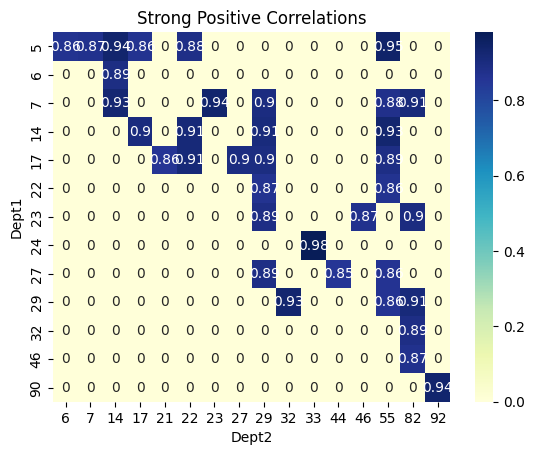

In [70]:
# Plotting correlation heatmap

pivot_df = strong_positive.pivot(index='Dept1', columns='Dept2', values='Correlation')
pivot_df = pivot_df.fillna(0)  # make symmetric if needed

sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')
plt.title('Strong Positive Correlations')
plt.show()


### 6.2 Market-Basket analysis

basket = sales of each dept in each store in each week

basket = store + week

In [71]:
df_mb = df_merged[['Store', 'Dept', "Date", "Weekly_Sales_cleaned"]]

In [72]:

# Create a pivot table: Rows = Date (or Store-Date), Columns = Depts, Values = Presence (1/0)
basket = df_mb[df_mb.loc[:,'Weekly_Sales_cleaned'] > 0].copy()
basket['Present'] = 1

# Group by Store-Date and pivot
basket_matrix = basket.pivot_table(index=['Store', 'Date'],
                                   columns='Dept',
                                   values='Present',
                                   fill_value=0)


In [73]:
basket_matrix

Dept               1    2    3    4    5    6    7    8    9    10  ...   90  \
Store Date                                                          ...        
1     2010-02-05  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-02-12  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-02-19  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-02-26  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-03-05  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
45    2012-09-28  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2012-10-05  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2012-10-12  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2012-10-19  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2012-10-26  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   

Dept               91   92   93   94   95   96   97   98   99  
Store Date                                                     
1     2010-02-05  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-02-12  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-02-19  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-02-26  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-03-05  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  
45    2012-09-28  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2012-10-05  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2012-10-12  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2012-10-19  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2012-10-26  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  

[6435 rows x 81 columns]

In [75]:
# Choosing the departments which are frequent
frequent_depts = basket_matrix.columns[(basket_matrix.sum(axis=0) / len(basket_matrix)) >= 0.15]
basket_matrix = basket_matrix[frequent_depts]

basket_matrix = basket_matrix.astype(bool)


frequent_itemsets = fpgrowth(basket_matrix, min_support=0.3,max_len = 3, use_colnames=True)


rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
strong_rules = rules[(rules['confidence'] > 0.85) & (rules['lift'] > 1.45)]


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [81]:
plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'],
            alpha=0.7, c=rules['lift'], cmap='viridis', edgecolor='k')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

In [80]:
strong_rules = rules[(rules['confidence'] > 0.85) & (rules['lift'] > 1.4) &(rules['support'] > 0.3)]


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(strong_rules['support'], strong_rules['confidence'],
            alpha=0.7, c=strong_rules['lift'], cmap='viridis', edgecolor='k')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()

In [76]:
pivot = rules.pivot_table(index='antecedents', columns='consequents', values='lift', fill_value=0)

plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Lift between Antecedents and Consequents")
plt.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

NameError: name 'pivot' is not defined

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<Figure size 1000x800 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [78]:
rules_table = strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()

# Convert frozenset to string for readability
rules_table['antecedents'] = rules_table['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_table['consequents'] = rules_table['consequents'].apply(lambda x: ', '.join(list(x)))

# Round numeric values for cleaner display
rules_table[['support', 'confidence', 'lift']] = rules_table[['support', 'confidence', 'lift']].round(3)

# Reset index for a clean table
rules_table = rules_table.reset_index(drop=True)

# Print in notebook (pretty table)
from IPython.display import display
display(rules_table)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

TypeError: sequence item 0: expected str instance, int found

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

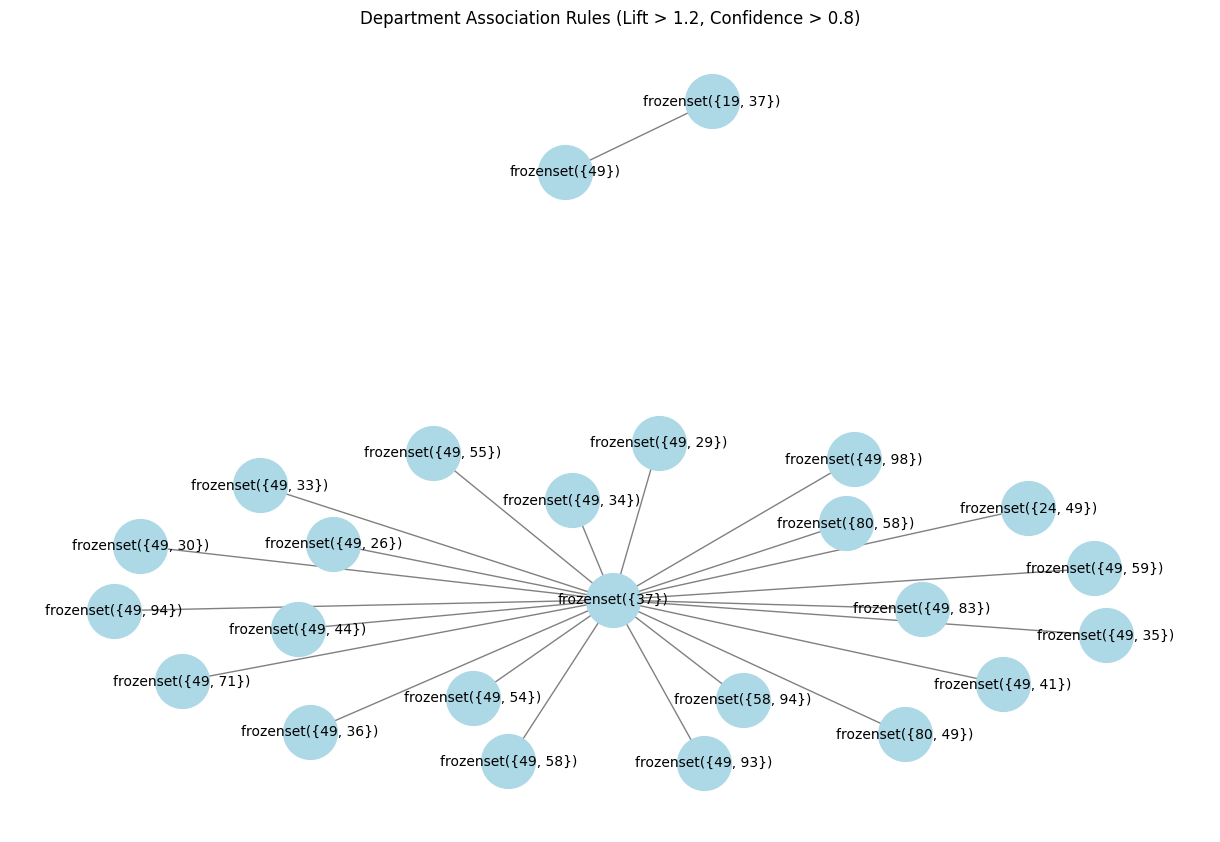

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Visualize strong rules as a network
G = nx.from_pandas_edgelist(strong_rules, 'antecedents', 'consequents', ['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=10, edge_color='gray')
plt.title("Department Association Rules (Lift > 1.2, Confidence > 0.8)")
plt.show()


###***1. From the network graph:***
* Key Hub: frozenset({37}):
Department 37 is strongly associated with many other departments.

**Frequent co-occurrence exists between:**

* Dept 37 and Dept 49 (common in many rules)

* Dept 37 with various combinations involving Dept 49 and others (e.g., 49-94, 49-54, 49-93)

**Strong Co-associations:**

* Dept 49 appears in almost all the associated itemsets. It's a core co-purchase department.

* Other departments like 94, 58, 36, and 83 also co-occur with 37 via department 49.

**Isolated Cluster: {19, 37} and {49}**

* Dept 19 and 37 co-occur independently of the main graph suggesting a distinct subgroup behavior.

###***2. From the heatmap:***

**High pairwise correlation:**

* Department 49 shows high correlation with many departments, echoing the association rules.

* Departments like 54, 94, 36, 93 again appear prominently, reinforcing the frequent co-purchase pattern.

###***3. Consistent Pairs:***

Pairs like 49–54, 49–94, 49–93, 49–58, 49–83 are both statistically correlated and strongly associated in transactions.

Business Suggestions
**1. Bundling & Cross-Selling:**

Create bundles centered around Dept 49 + [54, 94, 93, 58, 83]

Example: “Customers who buy from Dept 49 also tend to buy from 94 and 54.”

**2. Promotions Involving Dept 37:**

Since Dept 37 is a hub, use it as a promo anchor. Target users purchasing from Dept 37 with tailored offers from associated departments.

**3. Segmented Campaigns:**

Isolated cluster {19, 37}: Run targeted niche campaigns or explore why these purchases happen together (e.g., seasonal, event-based?)

**4. Store Layout Optimization:**

Position products from Depts 49, 54, 94, and 93 close together in the physical or online store to increase basket size.

**5. Product Recommendations:**

Use this graph to train or supplement a recommendation engine—especially recommending items from associated departments when a customer interacts with 49 or 37.

**6. Customer Segmentation:**

Customers buying from the {49, 94, 54, 58} group may represent a high-value cluster. Consider loyalty benefits or personalization.

In [ ]:

medium_rules = rules[(rules['confidence'] < 0.85) & (rules['confidence'] > 0.6) & (rules['lift'] < 1.45) & (rules['lift'] > 1.3)]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

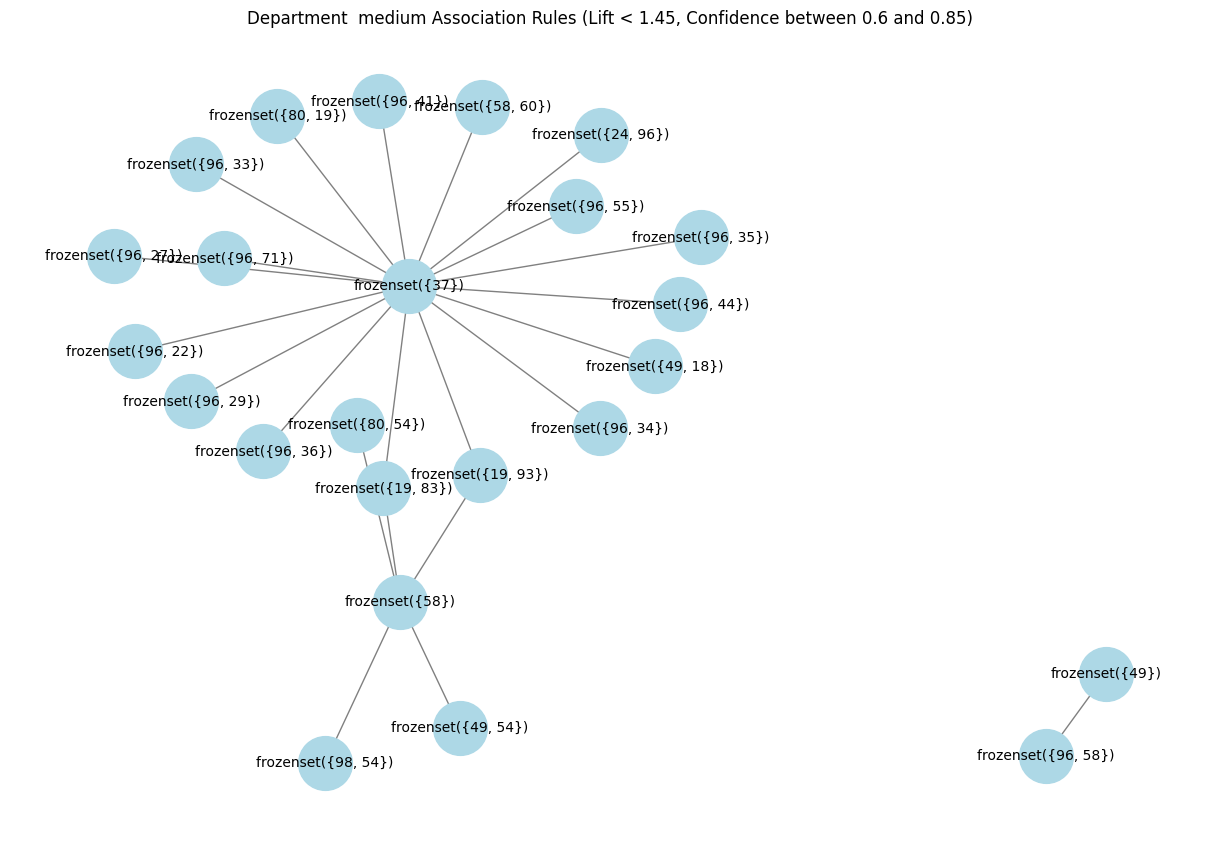

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Visualize strong rules as a network
G = nx.from_pandas_edgelist(medium_rules, 'antecedents', 'consequents', ['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=10, edge_color='gray')
plt.title("Department  medium Association Rules (Lift < 1.45, Confidence between 0.6 and 0.85)")
plt.show()

In [ ]:
neg_rules = rules[rules['lift'] < 1 ]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
neg_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Demand Forecasting

In [ ]:
df_merged[['cpi', 'unemployment', 'Fuel_Price', 'Size']].max()

cpi                227.232807
unemployment        14.313000
Fuel_Price           4.468000
Size            219622.000000
dtype: float64

In [ ]:
df_corr = df_forecast.sort_values(["Store","date"])

In [ ]:
def forecast_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true==0, 1, y_true))) * 100
    r2 = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAPE": mape, "R2": r2}

In [ ]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           421570 non-null  int64         
 1   Dept            421570 non-null  int64         
 2   Date            421570 non-null  datetime64[ns]
 3   Weekly_Sales    421570 non-null  float64       
 4   IsHoliday       421570 non-null  bool          
 5   Temperature     421570 non-null  float64       
 6   Fuel_Price      421570 non-null  float64       
 7   MarkDown1       421570 non-null  float64       
 8   MarkDown2       421570 non-null  float64       
 9   MarkDown3       421570 non-null  float64       
 10  MarkDown4       421570 non-null  float64       
 11  MarkDown5       421570 non-null  float64       
 12  cpi             421570 non-null  float64       
 13  unemployment    421570 non-null  float64       
 14  Type            421570 non-null  obj

In [ ]:
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)


In [ ]:
from pmdarima import auto_arima
df_forecast['Total_Markdown'] = df_forecast['MarkDown1'] + df_forecast['MarkDown2'] + df_forecast['MarkDown3'] + df_forecast['MarkDown4'] + df_forecast['MarkDown5']

group = df_forecast[(df_forecast['Store']==1)]

# Preprocess
group = group.copy()

group["date"] = pd.to_datetime(group["date"])


for i in range(1, 6):
        group[f'MarkDown{i}_lag1'] = group[f'MarkDown{i}'].shift(1)
        #group[f'Markdown{i}_lag2'] = group[f'Markdown{i}'].shift(2)

group["week"] = group["date"].dt.isocalendar().week.astype(int)
group["rolling_mean_4"] = group["Weekly_Sales"].rolling(4).mean().shift(1)
group = group.groupby('date').agg({
"Weekly_Sales": "sum",
"cpi": "mean",
"unemployment": "mean",
"Fuel_Price": "mean",
"Total_Markdown": "sum",
"Size":"mean",
"IsHoliday":"mean",
"MarkDown1":"sum",
"MarkDown2":"sum",
"MarkDown3":"sum",
"MarkDown4":"sum",
"MarkDown5":"sum",
'MarkDown1_lag1':"sum",
'MarkDown2_lag1':"sum",
'MarkDown3_lag1':"sum",
'MarkDown4_lag1':"sum",
'MarkDown5_lag1':"sum",
"week":"mean",
"rolling_mean_4": "mean"


}).reset_index()

group = group.sort_values("date").set_index("date")

target_col = "Weekly_Sales"
exog_cols =[  "IsHoliday",
            #"MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5",
              "Total_Markdown"]
#              'MarkDown1_lag1',
# 'MarkDown2_lag1',
# 'MarkDown3_lag1',
# 'MarkDown4_lag1',
# 'MarkDown5_lag1']

group = group.replace([np.inf, -np.inf], np.nan)

group = group.dropna(subset=[target_col]+exog_cols)
# 1. added rolling features r2 from -3 to -2.7

exog_cols.append("rolling_mean_4")
# 2. removing individual markdowns..instead using total markdown r2=-0.33

# Train/test split
# train_size = int(len(group)*0.8)
# train, test = group.iloc[:train_size], group.iloc[train_size:]
# y_train, y_test = train[target_col], test[target_col]
# X_train, X_test = train[exog_cols], test[exog_cols]



# model = auto_arima(y=y_train,
#                    X=X_train,
#                    seasonal=False,
#                    #m=52,
#                    trace=True,
#                    error_action='ignore',  # Don't throw errors if a model can't be fit
#                    suppress_warnings=True,
#                    stepwise=True)

# forecast = model.predict(n_periods=len(y_test), X=X_test)

# sarima with no exog r2=0.08

train_size = int(len(group) * 0.8)
train, test = group.iloc[:train_size], group.iloc[train_size:]
y_train, y_test = train[target_col], test[target_col]

model = SARIMAX(
    y_train,
    order=(1,1,1),              # ARIMA part
    seasonal_order=(1,1,1,52),  # yearly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = model.fit(disp=False)

# Forecast
sarima_forecast = sarima_fit.get_forecast(steps=len(y_test))
sarima_pred = sarima_forecast.predicted_mean

# --------------------------
# Evaluation
# --------------------------
rmse = np.sqrt(mean_squared_error(y_test, sarima_pred))
r2 = r2_score(y_test, sarima_pred)
print(f"SARIMA RMSE: {rmse:.2f}, SARIMA R²: {r2:.3f}")

# auto arima with no exog
auto_model = auto_arima(
    y_train,
    #seasonal=True, m=52, r2=-1.1
    trace=True, stepwise=True,
    error_action="ignore", suppress_warnings=True
)
# print(auto_model.summary())
pred = auto_model.predict(n_periods=len(y_test))
print("R²:", r2_score(y_test, pred))



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA RMSE: 82951.63, SARIMA R²: -0.084
Performing stepwise search to minimize aic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3079.453, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3071.108, Time=0.12 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3066.571, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3077.472, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3058.287, Time=0.41 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3060.470, Time=0.40 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3060.786, Time=0.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3069.930, Time=0.15 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3056.650, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3064.899, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3069.178, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3058.854, Time=0.10 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3059.917, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3068.032, Time=0.05 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3057.362, Time=0.15 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 5.977 seconds
R²: -1.3684354260427796


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print("R²:", r2_score(y_test, pred))

R²: -1.3684354260427796


In [ ]:
mse = mean_squared_error(y_test, forecast)

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 92124.67483366058


In [ ]:
r2 = r2_score(y_test, forecast)

In [ ]:
r2

-0.33727589526107216

XGBoost RMSE: 54986.46, R²: 0.547
XGBoost with Raw Target:
  RMSE: 54986.46, R²: 0.547
XGBoost with Log Target:
  RMSE: 52300.32, R²: 0.590


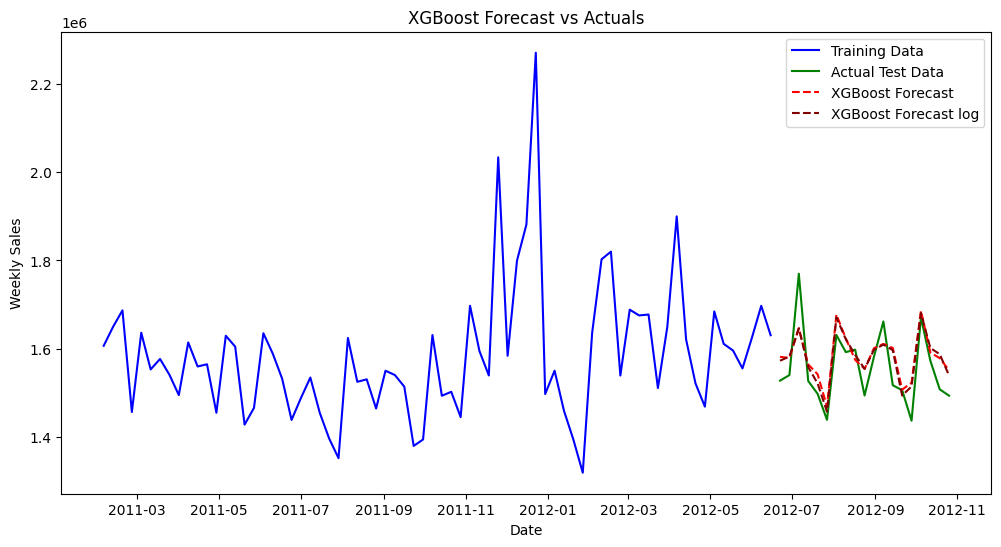

In [ ]:


# -------------------------
# 1. Preprocess Data
# -------------------------
group = df_forecast[df_forecast['Store'] == 1].copy()
group["date"] = pd.to_datetime(group["date"])
group = group.groupby("date").agg({"Weekly_Sales": "sum"}).reset_index()
#                                    "cpi": "mean",
# "unemployment": "mean",
# "Fuel_Price": "mean",
# "Total_Markdown": "sum",
# "IsHoliday":"mean"})
# .reset_index()
group = group.sort_values("date").set_index("date")

# -------------------------
# 2. Create Lag Features
# -------------------------
group["lag_1"] = group["Weekly_Sales"].shift(1)
group["lag_2"] = group["Weekly_Sales"].shift(2)

group["lag_52"] = group["Weekly_Sales"].shift(52)  # same week last year

# group["Total_Markdown_lag"] = group["Total_Markdown"].shift(1)
# group["Total_Markdown_lag"] = group["Total_Markdown"].shift(2)
# group["Total_Markdown_lag"] = group["Total_Markdown"].shift(3)
# -------------------------
# 3. Create Rolling Features
# -------------------------
group["rolling_4"]  = group["Weekly_Sales"].shift(1).rolling(window=4).mean()
group["rolling_12"] = group["Weekly_Sales"].shift(1).rolling(window=12).mean()
group["rolling_52"] = group["Weekly_Sales"].shift(1).rolling(window=52).mean()

# -------------------------
# 4. Calendar Features
# -------------------------
group["weekofyear"] = group.index.isocalendar().week.astype(int)
group["month"] = group.index.month
group["year"] = group.index.year

# -------------------------
# 5. Drop NaNs from lags/rollings
# -------------------------
group = group.dropna()

# -------------------------
# 6. Train/Test Split
# -------------------------
target_col = "Weekly_Sales"
feature_cols = [col for col in group.columns if col != target_col]

train_size = int(len(group) * 0.8)
train, test = group.iloc[:train_size], group.iloc[train_size:]
X_train, y_train = train[feature_cols], train[target_col]
X_test, y_test = test[feature_cols], test[target_col]





# -------------------------
# 7. Train XGBoost
# -------------------------
xgb = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

# -------------------------
# 8. Forecast
# -------------------------
y_pred = xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"XGBoost RMSE: {rmse:.2f}, R²: {r2:.3f}")

#  log
y_train_log = np.log1p(y_train)
xgb_log = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_log.fit(X_train, y_train_log)
y_pred_log = xgb_log.predict(X_test)
y_pred_log = np.expm1(y_pred_log)  # invert back

rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)

# -------------------------
# 4. Results
# -------------------------
print("XGBoost with Raw Target:")
print(f"  RMSE: {rmse:.2f}, R²: {r2:.3f}")
print("XGBoost with Log Target:")
print(f"  RMSE: {rmse_log:.2f}, R²: {r2_log:.3f}")


# -------------------------
# 9. Plot Results
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, y_train, label="Training Data", color="blue")
plt.plot(test.index, y_test, label="Actual Test Data", color="green")
plt.plot(test.index, y_pred, label="XGBoost Forecast", color="red", linestyle="--")
plt.plot(test.index, y_pred_log, label="XGBoost Forecast log", color="maroon", linestyle="--")
plt.title("XGBoost Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


In [ ]:
group.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2011-02-04 to 2012-10-26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  91 non-null     float64
 1   lag_1         91 non-null     float64
 2   lag_2         91 non-null     float64
 3   lag_52        91 non-null     float64
 4   rolling_4     91 non-null     float64
 5   rolling_12    91 non-null     float64
 6   rolling_52    91 non-null     float64
 7   weekofyear    91 non-null     int64  
 8   month         91 non-null     int32  
 9   year          91 non-null     int32  
dtypes: float64(7), int32(2), int64(1)
memory usage: 7.1 KB


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 10.7 MB/s eta 0:00:00


In [ ]:
# Hyperparameter tuning
import optuna
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# -------------------------
# Data (reuse your preprocessed lags/rolling features)
# -------------------------
# You should already have group, X, y from your pipeline
# (with lag/rolling features engineered)

X = group.drop(columns=["Weekly_Sales"])
y = group["Weekly_Sales"]

# -------------------------
# 1. Objective function with CV
# -------------------------
def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "random_state": 42
    }

    # TimeSeriesSplit CV
    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = XGBRegressor(**params)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)  # minimize mean RMSE across folds

# -------------------------
# 2. Run Optuna study
# -------------------------
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best params:", study.best_params)

# -------------------------
# 3. Train Final Model on Full Train/Test
# -------------------------
# (if you still want a final holdout set, e.g. last 20% of data)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

best_model = XGBRegressor(**study.best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Final tuned model on holdout → RMSE: {rmse:.2f}, R²: {r2:.3f}")


[I 2025-09-22 06:49:03,685] A new study created in memory with name: no-name-4fb5fd21-7c1e-40ce-9f54-033b98fbc0d7


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-09-22 06:49:04,259] Trial 0 finished with value: 116027.79873661487 and parameters: {'n_estimators': 608, 'max_depth': 3, 'learning_rate': 0.2952952855330188, 'subsample': 0.7875384018706905, 'colsample_bytree': 0.9596397329024948, 'min_child_weight': 1, 'gamma': 1.9977083993516054, 'reg_lambda': 1.4460746740995156, 'reg_alpha': 0.8973607365427017}. Best is trial 0 with value: 116027.79873661487.
[I 2025-09-22 06:49:07,991] Trial 1 finished with value: 124467.1451560683 and parameters: {'n_estimators': 884, 'max_depth': 3, 'learning_rate': 0.06710706969727158, 'subsample': 0.8096247898997477, 'colsample_bytree': 0.8670779045875662, 'min_child_weight': 9, 'gamma': 3.121700419711819, 'reg_lambda': 4.513241552208197, 'reg_alpha': 4.916202607540633}. Best is trial 0 with value: 116027.79873661487.
[I 2025-09-22 06:49:08,458] Trial 2 finished with value: 121469.40986642937 and parameters: {'n_estimators': 406, 'max_depth': 6, 'learning_rate': 0.16564052751129543, 'subsample': 0.7857

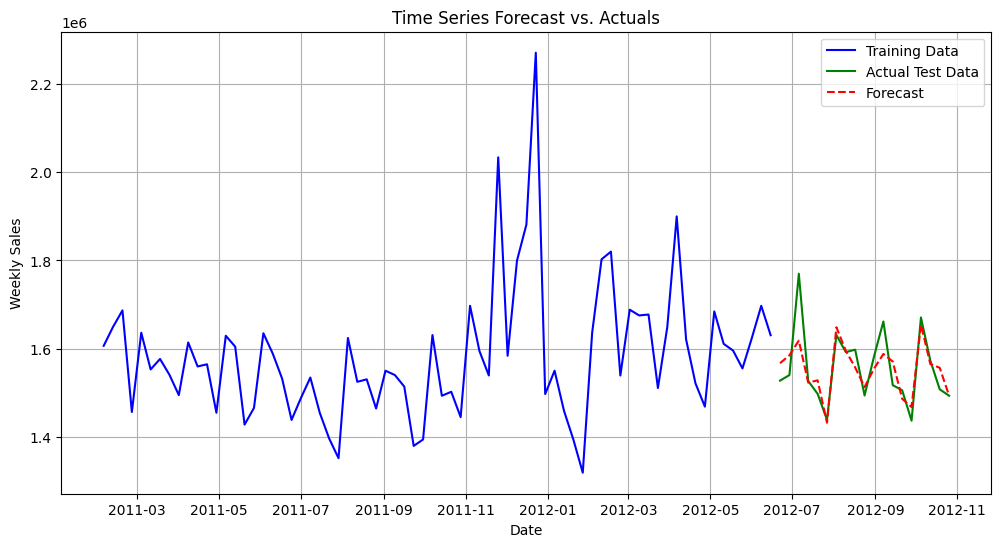

In [ ]:


# Combine training and test data for plotting
train_and_test = pd.concat([y_train, y_test])

plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train.index, y_train, label='Training Data', color='blue')

# Plot the actual test data
plt.plot(test.index, y_test, label='Actual Test Data', color='green')

# Plot the forecasted values
plt.plot(test.index, y_pred, label='Forecast', color='red', linestyle='--')

plt.title('Time Series Forecast vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Hyperparameter tuning per Store
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import pandas as pd

num_of_stores = df_forecast['Store'].nunique()

# Collect results
results = []

for i in range(1, num_of_stores + 1):
    print(f"\n--- Store {i} ---")

    group = df_forecast[df_forecast['Store'] == i].copy()
    group["date"] = pd.to_datetime(group["date"])
    group = group.groupby("date").agg({"Weekly_Sales": "sum"}).reset_index()
    group = group.sort_values("date").set_index("date")

    # -------------------------
    # 1. Create Lag Features
    # -------------------------
    group["lag_1"] = group["Weekly_Sales"].shift(1)
    group["lag_2"] = group["Weekly_Sales"].shift(2)
    group["lag_52"] = group["Weekly_Sales"].shift(52)  # same week last year

    # -------------------------
    # 2. Create Rolling Features
    # -------------------------
    group["rolling_4"] = group["Weekly_Sales"].shift(1).rolling(window=4).mean()
    group["rolling_12"] = group["Weekly_Sales"].shift(1).rolling(window=12).mean()
    group["rolling_52"] = group["Weekly_Sales"].shift(1).rolling(window=52).mean()

    # -------------------------
    # 3. Calendar Features
    # -------------------------
    group["weekofyear"] = group.index.isocalendar().week.astype(int)
    group["month"] = group.index.month
    group["year"] = group.index.year

    # -------------------------
    # 4. Drop NaNs
    # -------------------------
    group = group.dropna()

    X = group.drop(columns=["Weekly_Sales"])
    y = group["Weekly_Sales"]

    # -------------------------
    # 5. Objective function with CV
    # -------------------------
    def objective(trial):
        params = {
            "objective": "reg:squarederror",
            "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
            "max_depth": trial.suggest_int("max_depth", 3, 12),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
            "gamma": trial.suggest_float("gamma", 0.0, 5.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
            "random_state": 42
        }

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []

        for train_idx, val_idx in tscv.split(X):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model = XGBRegressor(**params)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_val)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            rmse_scores.append(rmse)

        return np.mean(rmse_scores)  # minimize mean RMSE

    # -------------------------
    # 6. Run Optuna study
    # -------------------------
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=50, show_progress_bar=False)

    best_params = study.best_params
    print("Best params:", best_params)

    # -------------------------
    # 7. Train Final Model on Holdout (last 20%)
    # -------------------------
    train_size = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Final tuned model → RMSE: {rmse:.2f}, R²: {r2:.3f}")

    # Save results
    results.append({
        "Store": i,
        "RMSE": rmse,
        "R2": r2,
        "Best_Params": best_params
    })

# -------------------------
# 8. Convert results to DataFrame
# -------------------------
results_df = pd.DataFrame(results)
print("\n=== Summary across all stores ===")
print(results_df)


[I 2025-09-22 07:17:14,719] A new study created in memory with name: no-name-614c4bc3-ff56-4d18-9c13-6dfb0aefac22



--- Store 1 ---


[I 2025-09-22 07:17:15,549] Trial 0 finished with value: 115413.49417306103 and parameters: {'n_estimators': 790, 'max_depth': 3, 'learning_rate': 0.016013793504557335, 'subsample': 0.696650744059319, 'colsample_bytree': 0.6971327875555581, 'min_child_weight': 3, 'gamma': 3.7347922257194357, 'reg_lambda': 2.658665734217534, 'reg_alpha': 3.9863452458322497}. Best is trial 0 with value: 115413.49417306103.
[I 2025-09-22 07:17:17,025] Trial 1 finished with value: 115265.65971621088 and parameters: {'n_estimators': 894, 'max_depth': 6, 'learning_rate': 0.04271952871569782, 'subsample': 0.6637940615522683, 'colsample_bytree': 0.8372313937428086, 'min_child_weight': 1, 'gamma': 1.9605215227981359, 'reg_lambda': 2.441014758629504, 'reg_alpha': 3.1499453009569067}. Best is trial 1 with value: 115265.65971621088.
[I 2025-09-22 07:17:17,768] Trial 2 finished with value: 118445.87034137567 and parameters: {'n_estimators': 781, 'max_depth': 10, 'learning_rate': 0.15027172597951188, 'subsample': 0.

Best params: {'n_estimators': 949, 'max_depth': 5, 'learning_rate': 0.09937105770300507, 'subsample': 0.875141102446153, 'colsample_bytree': 0.9679940474253323, 'min_child_weight': 1, 'gamma': 3.8537249232487785, 'reg_lambda': 2.6918070578175177, 'reg_alpha': 2.9739533689852213}


[I 2025-09-22 07:18:16,396] A new study created in memory with name: no-name-33c83694-f511-490d-bfaa-11a57e4679d0


Final tuned model → RMSE: 50705.35, R²: 0.615

--- Store 2 ---


[I 2025-09-22 07:18:17,304] Trial 0 finished with value: 149507.76796361824 and parameters: {'n_estimators': 892, 'max_depth': 6, 'learning_rate': 0.04129719804310019, 'subsample': 0.8307663299718308, 'colsample_bytree': 0.9083664629699727, 'min_child_weight': 7, 'gamma': 1.9690114259679248, 'reg_lambda': 3.9184236063309488, 'reg_alpha': 1.9330211653108453}. Best is trial 0 with value: 149507.76796361824.
[I 2025-09-22 07:18:18,068] Trial 1 finished with value: 157412.20240752085 and parameters: {'n_estimators': 622, 'max_depth': 8, 'learning_rate': 0.055010980148313474, 'subsample': 0.6980188549336053, 'colsample_bytree': 0.617880689394426, 'min_child_weight': 4, 'gamma': 3.6709947765477975, 'reg_lambda': 3.0763300968471095, 'reg_alpha': 3.7336594444943967}. Best is trial 0 with value: 149507.76796361824.
[I 2025-09-22 07:18:19,000] Trial 2 finished with value: 149560.55365448326 and parameters: {'n_estimators': 739, 'max_depth': 5, 'learning_rate': 0.03637895178676882, 'subsample': 0

Best params: {'n_estimators': 798, 'max_depth': 7, 'learning_rate': 0.2599231483764718, 'subsample': 0.9197644290628183, 'colsample_bytree': 0.9818936998856393, 'min_child_weight': 1, 'gamma': 0.9267085827259842, 'reg_lambda': 3.9186716842678955, 'reg_alpha': 1.0803266235400395}
Final tuned model → RMSE: 64423.41, R²: 0.218

--- Store 3 ---


[I 2025-09-22 07:19:25,272] A new study created in memory with name: no-name-a481cf8c-c4a0-40bf-bb99-1b6f42dc45cc
[I 2025-09-22 07:19:25,970] Trial 0 finished with value: 32285.29473410127 and parameters: {'n_estimators': 617, 'max_depth': 12, 'learning_rate': 0.2921958142052824, 'subsample': 0.7723358499949566, 'colsample_bytree': 0.7413415741305491, 'min_child_weight': 1, 'gamma': 2.424126152591011, 'reg_lambda': 3.4095355850953446, 'reg_alpha': 3.5325890052387128}. Best is trial 0 with value: 32285.29473410127.
[I 2025-09-22 07:19:26,607] Trial 1 finished with value: 32754.28379683215 and parameters: {'n_estimators': 485, 'max_depth': 10, 'learning_rate': 0.015505837523027982, 'subsample': 0.6917377536995418, 'colsample_bytree': 0.7802763085905784, 'min_child_weight': 4, 'gamma': 0.32356654629995707, 'reg_lambda': 1.845309010228161, 'reg_alpha': 0.7940512103536496}. Best is trial 0 with value: 32285.29473410127.
[I 2025-09-22 07:19:27,578] Trial 2 finished with value: 34563.52056462

Best params: {'n_estimators': 841, 'max_depth': 8, 'learning_rate': 0.1703630533162246, 'subsample': 0.8832405633638114, 'colsample_bytree': 0.6262676799492265, 'min_child_weight': 10, 'gamma': 0.4688448022051315, 'reg_lambda': 0.5388238005744623, 'reg_alpha': 4.985942976193713}
Final tuned model → RMSE: 28443.23, R²: -3.235

--- Store 4 ---


[I 2025-09-22 07:20:09,846] Trial 0 finished with value: 183531.58934082455 and parameters: {'n_estimators': 560, 'max_depth': 3, 'learning_rate': 0.07824311090709059, 'subsample': 0.5084759224833597, 'colsample_bytree': 0.5897282478230799, 'min_child_weight': 1, 'gamma': 2.73776626003906, 'reg_lambda': 1.257374914833786, 'reg_alpha': 1.4511248828693213}. Best is trial 0 with value: 183531.58934082455.
[I 2025-09-22 07:20:10,239] Trial 1 finished with value: 269997.7431486756 and parameters: {'n_estimators': 403, 'max_depth': 6, 'learning_rate': 0.2589927529781041, 'subsample': 0.5899286748539134, 'colsample_bytree': 0.6750774603450309, 'min_child_weight': 7, 'gamma': 4.7231666723075785, 'reg_lambda': 4.952325891905806, 'reg_alpha': 0.06702573585125937}. Best is trial 0 with value: 183531.58934082455.
[I 2025-09-22 07:20:11,029] Trial 2 finished with value: 267556.21507985436 and parameters: {'n_estimators': 849, 'max_depth': 8, 'learning_rate': 0.2237405222575344, 'subsample': 0.82247

Best params: {'n_estimators': 796, 'max_depth': 9, 'learning_rate': 0.04759016881939292, 'subsample': 0.8460852687379548, 'colsample_bytree': 0.9628065665889773, 'min_child_weight': 1, 'gamma': 1.1507654341098008, 'reg_lambda': 4.642598165204615, 'reg_alpha': 4.382078478708158}


[I 2025-09-22 07:21:25,323] A new study created in memory with name: no-name-81539e45-cc95-486d-9f29-57bcb4439c23


Final tuned model → RMSE: 107563.23, R²: -2.116

--- Store 5 ---


[I 2025-09-22 07:21:26,061] Trial 0 finished with value: 31407.00539286111 and parameters: {'n_estimators': 660, 'max_depth': 4, 'learning_rate': 0.05532125749158477, 'subsample': 0.5253528892780266, 'colsample_bytree': 0.9877092929168046, 'min_child_weight': 3, 'gamma': 2.356764240860759, 'reg_lambda': 0.975444202714274, 'reg_alpha': 3.7183627552781613}. Best is trial 0 with value: 31407.00539286111.
[I 2025-09-22 07:21:26,742] Trial 1 finished with value: 31446.072597340833 and parameters: {'n_estimators': 839, 'max_depth': 3, 'learning_rate': 0.01597454084090985, 'subsample': 0.8446756818685641, 'colsample_bytree': 0.6402654111731076, 'min_child_weight': 10, 'gamma': 4.491579226595747, 'reg_lambda': 1.4764533189579887, 'reg_alpha': 3.128383040348181}. Best is trial 0 with value: 31407.00539286111.
[I 2025-09-22 07:21:27,199] Trial 2 finished with value: 30102.25794867557 and parameters: {'n_estimators': 380, 'max_depth': 4, 'learning_rate': 0.05498062715526202, 'subsample': 0.651782

Best params: {'n_estimators': 562, 'max_depth': 11, 'learning_rate': 0.014211902451339974, 'subsample': 0.6651165562971147, 'colsample_bytree': 0.998740459153431, 'min_child_weight': 2, 'gamma': 2.1688683441552117, 'reg_lambda': 3.65384314672573, 'reg_alpha': 3.4940216169031117}


[I 2025-09-22 07:22:10,257] A new study created in memory with name: no-name-d5787411-1638-4450-af0d-433affeec88a


Final tuned model → RMSE: 22922.70, R²: -1.683

--- Store 6 ---


[I 2025-09-22 07:22:10,771] Trial 0 finished with value: 142630.31277047473 and parameters: {'n_estimators': 389, 'max_depth': 11, 'learning_rate': 0.11980783093897299, 'subsample': 0.7358241693003277, 'colsample_bytree': 0.5382946472937011, 'min_child_weight': 4, 'gamma': 1.4023367315024808, 'reg_lambda': 4.539423281636453, 'reg_alpha': 4.823587622149017}. Best is trial 0 with value: 142630.31277047473.
[I 2025-09-22 07:22:11,776] Trial 1 finished with value: 125449.61556114847 and parameters: {'n_estimators': 624, 'max_depth': 4, 'learning_rate': 0.04615931201960316, 'subsample': 0.6016231206469596, 'colsample_bytree': 0.8989481349848552, 'min_child_weight': 1, 'gamma': 2.4132398487114743, 'reg_lambda': 4.159339958763152, 'reg_alpha': 1.8675773738865753}. Best is trial 1 with value: 125449.61556114847.
[I 2025-09-22 07:22:15,257] Trial 2 finished with value: 152132.92573008 and parameters: {'n_estimators': 905, 'max_depth': 8, 'learning_rate': 0.017269619702556905, 'subsample': 0.754

Best params: {'n_estimators': 368, 'max_depth': 7, 'learning_rate': 0.06901044200227495, 'subsample': 0.6394124915065099, 'colsample_bytree': 0.9035626757786348, 'min_child_weight': 1, 'gamma': 0.7438533189279699, 'reg_lambda': 0.7140967028321595, 'reg_alpha': 2.327791019879145}
Final tuned model → RMSE: 48054.36, R²: 0.826

--- Store 7 ---


[I 2025-09-22 07:22:56,766] A new study created in memory with name: no-name-170f7381-49d8-485b-8199-a451717a4dd8
[I 2025-09-22 07:22:58,325] Trial 0 finished with value: 79272.33235468481 and parameters: {'n_estimators': 878, 'max_depth': 9, 'learning_rate': 0.01408141916720035, 'subsample': 0.8407293460805696, 'colsample_bytree': 0.9573932655386213, 'min_child_weight': 2, 'gamma': 4.6258718342936165, 'reg_lambda': 2.135827375217772, 'reg_alpha': 4.844833842586954}. Best is trial 0 with value: 79272.33235468481.
[I 2025-09-22 07:22:58,811] Trial 1 finished with value: 90255.55726426875 and parameters: {'n_estimators': 456, 'max_depth': 10, 'learning_rate': 0.20309640887910463, 'subsample': 0.791542597967701, 'colsample_bytree': 0.5469678088153407, 'min_child_weight': 6, 'gamma': 4.214139064227468, 'reg_lambda': 2.1672376147641326, 'reg_alpha': 3.0715124591251266}. Best is trial 0 with value: 79272.33235468481.
[I 2025-09-22 07:22:59,372] Trial 2 finished with value: 94961.411274987 an

Best params: {'n_estimators': 821, 'max_depth': 9, 'learning_rate': 0.12011211092309405, 'subsample': 0.6141935845886044, 'colsample_bytree': 0.6941739885665775, 'min_child_weight': 1, 'gamma': 1.7663993799790065, 'reg_lambda': 1.8986255655010205, 'reg_alpha': 1.9063017751247684}


[I 2025-09-22 07:23:53,328] A new study created in memory with name: no-name-a9284a3f-0a40-4fd0-9824-a52057291e86


Final tuned model → RMSE: 36308.95, R²: 0.827

--- Store 8 ---


[I 2025-09-22 07:23:54,915] Trial 0 finished with value: 59395.825173997975 and parameters: {'n_estimators': 861, 'max_depth': 12, 'learning_rate': 0.06449721698774946, 'subsample': 0.6705014717886721, 'colsample_bytree': 0.6324168159607821, 'min_child_weight': 1, 'gamma': 3.8069307517909317, 'reg_lambda': 3.116402676952532, 'reg_alpha': 1.8886212941510676}. Best is trial 0 with value: 59395.825173997975.
[I 2025-09-22 07:23:55,390] Trial 1 finished with value: 59816.14901515479 and parameters: {'n_estimators': 396, 'max_depth': 7, 'learning_rate': 0.06764893120874681, 'subsample': 0.7576382372690038, 'colsample_bytree': 0.7604387342266572, 'min_child_weight': 6, 'gamma': 2.105374978198716, 'reg_lambda': 2.333856845624418, 'reg_alpha': 4.464249459585741}. Best is trial 0 with value: 59395.825173997975.
[I 2025-09-22 07:23:55,849] Trial 2 finished with value: 65484.647575108684 and parameters: {'n_estimators': 459, 'max_depth': 3, 'learning_rate': 0.09107107647466875, 'subsample': 0.990

Best params: {'n_estimators': 820, 'max_depth': 4, 'learning_rate': 0.08884090581321226, 'subsample': 0.7771799642048647, 'colsample_bytree': 0.8998645711889377, 'min_child_weight': 1, 'gamma': 3.6391228636628528, 'reg_lambda': 1.6818410796202694, 'reg_alpha': 4.6870630737621255}


[I 2025-09-22 07:24:53,469] A new study created in memory with name: no-name-68c50f14-09d5-4cd0-8aec-f7a1095dfae7


Final tuned model → RMSE: 32588.90, R²: 0.126

--- Store 9 ---


[I 2025-09-22 07:24:53,955] Trial 0 finished with value: 60204.30515359588 and parameters: {'n_estimators': 498, 'max_depth': 8, 'learning_rate': 0.15280411509796007, 'subsample': 0.6680802212827324, 'colsample_bytree': 0.6108311298593181, 'min_child_weight': 10, 'gamma': 4.5311361613381305, 'reg_lambda': 3.3387020774448377, 'reg_alpha': 3.5830562760273095}. Best is trial 0 with value: 60204.30515359588.
[I 2025-09-22 07:24:54,580] Trial 1 finished with value: 47404.96276284497 and parameters: {'n_estimators': 445, 'max_depth': 5, 'learning_rate': 0.05266330296101154, 'subsample': 0.5168035486121109, 'colsample_bytree': 0.5970940182818423, 'min_child_weight': 1, 'gamma': 2.4947520191245545, 'reg_lambda': 2.5730110863688225, 'reg_alpha': 4.22305018632309}. Best is trial 1 with value: 47404.96276284497.
[I 2025-09-22 07:24:55,490] Trial 2 finished with value: 51849.27379957361 and parameters: {'n_estimators': 676, 'max_depth': 8, 'learning_rate': 0.04104904341465317, 'subsample': 0.57252

Best params: {'n_estimators': 414, 'max_depth': 4, 'learning_rate': 0.02486653891848438, 'subsample': 0.6944422721569232, 'colsample_bytree': 0.9290742874060935, 'min_child_weight': 1, 'gamma': 3.7303757067981884, 'reg_lambda': 0.4061229394884574, 'reg_alpha': 2.1598243793820027}
Final tuned model → RMSE: 26229.60, R²: -0.025

--- Store 10 ---


[I 2025-09-22 07:25:38,836] Trial 0 finished with value: 168064.36474706884 and parameters: {'n_estimators': 750, 'max_depth': 8, 'learning_rate': 0.05270439988533609, 'subsample': 0.8344324152395819, 'colsample_bytree': 0.9448363816600102, 'min_child_weight': 1, 'gamma': 3.0783602152966827, 'reg_lambda': 3.724613273786611, 'reg_alpha': 4.408443405884248}. Best is trial 0 with value: 168064.36474706884.
[I 2025-09-22 07:25:39,802] Trial 1 finished with value: 183670.50056080165 and parameters: {'n_estimators': 954, 'max_depth': 4, 'learning_rate': 0.012003626294811305, 'subsample': 0.7859063323245841, 'colsample_bytree': 0.6197111610405184, 'min_child_weight': 4, 'gamma': 3.7991792520871086, 'reg_lambda': 0.7205637311861945, 'reg_alpha': 2.925026530120594}. Best is trial 0 with value: 168064.36474706884.
[I 2025-09-22 07:25:40,298] Trial 2 finished with value: 193742.20924000393 and parameters: {'n_estimators': 435, 'max_depth': 7, 'learning_rate': 0.0929078382479034, 'subsample': 0.71

Best params: {'n_estimators': 635, 'max_depth': 3, 'learning_rate': 0.29574412376434284, 'subsample': 0.857355948378948, 'colsample_bytree': 0.8617143006562415, 'min_child_weight': 1, 'gamma': 3.130354693230415, 'reg_lambda': 4.964356041025858, 'reg_alpha': 4.6575131735061746}
Final tuned model → RMSE: 72592.51, R²: 0.135

--- Store 11 ---


[I 2025-09-22 07:26:28,158] A new study created in memory with name: no-name-bb12968d-5148-4a08-94f2-d13a8be6c141
[I 2025-09-22 07:26:29,270] Trial 0 finished with value: 118941.82232619997 and parameters: {'n_estimators': 918, 'max_depth': 8, 'learning_rate': 0.010150737691281367, 'subsample': 0.748652369391424, 'colsample_bytree': 0.5952136356022681, 'min_child_weight': 4, 'gamma': 1.6066567020943663, 'reg_lambda': 0.972644084641589, 'reg_alpha': 2.1772518415172737}. Best is trial 0 with value: 118941.82232619997.
[I 2025-09-22 07:26:30,016] Trial 1 finished with value: 121660.12225755025 and parameters: {'n_estimators': 570, 'max_depth': 6, 'learning_rate': 0.030678771855449892, 'subsample': 0.978017344186155, 'colsample_bytree': 0.5644435031674542, 'min_child_weight': 3, 'gamma': 2.0454290751106052, 'reg_lambda': 2.237203947897823, 'reg_alpha': 0.8568626468625506}. Best is trial 0 with value: 118941.82232619997.
[I 2025-09-22 07:26:30,656] Trial 2 finished with value: 119669.534207

Best params: {'n_estimators': 881, 'max_depth': 11, 'learning_rate': 0.016369203512904936, 'subsample': 0.5926812668592935, 'colsample_bytree': 0.9148891145452187, 'min_child_weight': 2, 'gamma': 0.23458662443185974, 'reg_lambda': 2.491474448009819, 'reg_alpha': 2.1918664926807483}


[I 2025-09-22 07:27:39,247] A new study created in memory with name: no-name-4335c0b3-fab9-45b0-8d14-8f2a816d55cf


Final tuned model → RMSE: 64967.43, R²: 0.177

--- Store 12 ---


[I 2025-09-22 07:27:40,008] Trial 0 finished with value: 87339.00197699148 and parameters: {'n_estimators': 804, 'max_depth': 6, 'learning_rate': 0.039567688315637624, 'subsample': 0.8508576022571328, 'colsample_bytree': 0.5920467770293095, 'min_child_weight': 7, 'gamma': 1.8957126865344898, 'reg_lambda': 4.4099309852571285, 'reg_alpha': 4.0064008139409255}. Best is trial 0 with value: 87339.00197699148.
[I 2025-09-22 07:27:40,729] Trial 1 finished with value: 96385.32337366161 and parameters: {'n_estimators': 777, 'max_depth': 9, 'learning_rate': 0.013079890715189363, 'subsample': 0.8332947424956074, 'colsample_bytree': 0.9061659473265169, 'min_child_weight': 10, 'gamma': 0.16644629860175175, 'reg_lambda': 1.6339880444140376, 'reg_alpha': 1.8589025683643383}. Best is trial 0 with value: 87339.00197699148.
[I 2025-09-22 07:27:41,438] Trial 2 finished with value: 100176.0929174095 and parameters: {'n_estimators': 827, 'max_depth': 8, 'learning_rate': 0.041832890793828695, 'subsample': 0

Best params: {'n_estimators': 504, 'max_depth': 7, 'learning_rate': 0.22880577237473781, 'subsample': 0.8320860701309014, 'colsample_bytree': 0.9032128504007597, 'min_child_weight': 1, 'gamma': 2.633201296200998, 'reg_lambda': 3.285515759243431, 'reg_alpha': 0.02298259957631721}


[I 2025-09-22 07:28:38,635] A new study created in memory with name: no-name-914266a7-8460-4261-a7f7-b363e71356d4


Final tuned model → RMSE: 37976.79, R²: 0.331

--- Store 13 ---


[I 2025-09-22 07:28:40,076] Trial 0 finished with value: 175473.1934672545 and parameters: {'n_estimators': 580, 'max_depth': 10, 'learning_rate': 0.025460466444839423, 'subsample': 0.7676522931444503, 'colsample_bytree': 0.8441854497507146, 'min_child_weight': 1, 'gamma': 4.743994149036391, 'reg_lambda': 4.486840203012235, 'reg_alpha': 2.8160646694322145}. Best is trial 0 with value: 175473.1934672545.
[I 2025-09-22 07:28:40,799] Trial 1 finished with value: 213092.6175323713 and parameters: {'n_estimators': 750, 'max_depth': 7, 'learning_rate': 0.11368340890251141, 'subsample': 0.6358149752156832, 'colsample_bytree': 0.5125789604420762, 'min_child_weight': 6, 'gamma': 1.1979852818203591, 'reg_lambda': 1.9732128940369065, 'reg_alpha': 0.5634432441312626}. Best is trial 0 with value: 175473.1934672545.
[I 2025-09-22 07:28:41,531] Trial 2 finished with value: 179635.87317152406 and parameters: {'n_estimators': 844, 'max_depth': 8, 'learning_rate': 0.1499713032220669, 'subsample': 0.9895

Best params: {'n_estimators': 695, 'max_depth': 6, 'learning_rate': 0.0386483599054674, 'subsample': 0.8073254706206792, 'colsample_bytree': 0.9638803784987438, 'min_child_weight': 2, 'gamma': 4.966044919607761, 'reg_lambda': 3.8434821033811897, 'reg_alpha': 1.2012295287758454}


[I 2025-09-22 07:29:34,464] A new study created in memory with name: no-name-cec8a6d5-ede1-4d9e-88e6-e5bcdb61bf5d


Final tuned model → RMSE: 105700.11, R²: -1.109

--- Store 14 ---


[I 2025-09-22 07:29:35,237] Trial 0 finished with value: 215720.58687296681 and parameters: {'n_estimators': 759, 'max_depth': 8, 'learning_rate': 0.10963640762227422, 'subsample': 0.8765871758214825, 'colsample_bytree': 0.7470448485770078, 'min_child_weight': 8, 'gamma': 3.906557905002073, 'reg_lambda': 2.6539468368894448, 'reg_alpha': 2.2780598984554197}. Best is trial 0 with value: 215720.58687296681.
[I 2025-09-22 07:29:35,798] Trial 1 finished with value: 212946.9435217549 and parameters: {'n_estimators': 409, 'max_depth': 12, 'learning_rate': 0.15402181343713767, 'subsample': 0.5523330565777733, 'colsample_bytree': 0.5891264836018169, 'min_child_weight': 3, 'gamma': 0.08683519803777073, 'reg_lambda': 2.721920418156502, 'reg_alpha': 2.5851741552672354}. Best is trial 1 with value: 212946.9435217549.
[I 2025-09-22 07:29:36,698] Trial 2 finished with value: 221572.60478236497 and parameters: {'n_estimators': 518, 'max_depth': 8, 'learning_rate': 0.08625186877006782, 'subsample': 0.9

Best params: {'n_estimators': 743, 'max_depth': 3, 'learning_rate': 0.18844977968684803, 'subsample': 0.941105327011575, 'colsample_bytree': 0.6368471528955751, 'min_child_weight': 3, 'gamma': 3.752912719896327, 'reg_lambda': 0.3352582742452324, 'reg_alpha': 2.359180976405968}
Final tuned model → RMSE: 354302.32, R²: -10.850

--- Store 15 ---


[I 2025-09-22 07:30:20,346] A new study created in memory with name: no-name-cfaf3bb3-cab6-4cda-8df0-2318f7c69609
[I 2025-09-22 07:30:20,692] Trial 0 finished with value: 89901.3735258502 and parameters: {'n_estimators': 346, 'max_depth': 5, 'learning_rate': 0.044985636939416526, 'subsample': 0.9143598940206314, 'colsample_bytree': 0.8053506694948313, 'min_child_weight': 10, 'gamma': 0.2860570011224639, 'reg_lambda': 3.3879418633845515, 'reg_alpha': 1.8883028992274642}. Best is trial 0 with value: 89901.3735258502.
[I 2025-09-22 07:30:21,118] Trial 1 finished with value: 86994.5557616408 and parameters: {'n_estimators': 461, 'max_depth': 3, 'learning_rate': 0.057831649627164694, 'subsample': 0.9671627976307071, 'colsample_bytree': 0.7588788284163459, 'min_child_weight': 9, 'gamma': 3.4393063916160194, 'reg_lambda': 0.7803676071276167, 'reg_alpha': 1.3767325718358847}. Best is trial 1 with value: 86994.5557616408.
[I 2025-09-22 07:30:21,925] Trial 2 finished with value: 75021.0976771346

Best params: {'n_estimators': 728, 'max_depth': 8, 'learning_rate': 0.29983270161674186, 'subsample': 0.658704396695718, 'colsample_bytree': 0.9689787455063098, 'min_child_weight': 1, 'gamma': 2.2791244281617438, 'reg_lambda': 1.7569950151817253, 'reg_alpha': 1.9269821420616537}
Final tuned model → RMSE: 30807.23, R²: 0.431

--- Store 16 ---


[I 2025-09-22 07:31:13,632] Trial 0 finished with value: 62421.31132478855 and parameters: {'n_estimators': 702, 'max_depth': 10, 'learning_rate': 0.20090491622541456, 'subsample': 0.9946357580894045, 'colsample_bytree': 0.8287418061104477, 'min_child_weight': 4, 'gamma': 0.27016892633804745, 'reg_lambda': 1.5531008679589142, 'reg_alpha': 2.647827205232785}. Best is trial 0 with value: 62421.31132478855.
[I 2025-09-22 07:31:14,127] Trial 1 finished with value: 73924.23400739822 and parameters: {'n_estimators': 549, 'max_depth': 4, 'learning_rate': 0.14702553737280047, 'subsample': 0.8736451041684596, 'colsample_bytree': 0.967081442989219, 'min_child_weight': 10, 'gamma': 3.6688869212701416, 'reg_lambda': 0.08703454044948045, 'reg_alpha': 1.223394123877708}. Best is trial 0 with value: 62421.31132478855.
[I 2025-09-22 07:31:14,919] Trial 2 finished with value: 74304.16180212454 and parameters: {'n_estimators': 920, 'max_depth': 6, 'learning_rate': 0.14403854637775954, 'subsample': 0.756

Best params: {'n_estimators': 588, 'max_depth': 6, 'learning_rate': 0.030690272379618393, 'subsample': 0.9650694795833122, 'colsample_bytree': 0.9270728638139472, 'min_child_weight': 1, 'gamma': 0.814509200306829, 'reg_lambda': 3.236869263809629, 'reg_alpha': 0.6022911311811239}


[I 2025-09-22 07:32:15,812] A new study created in memory with name: no-name-0d992acd-5a2b-42a0-93a2-13db4c5ece04


Final tuned model → RMSE: 23579.38, R²: 0.705

--- Store 17 ---


[I 2025-09-22 07:32:16,429] Trial 0 finished with value: 73155.40034193381 and parameters: {'n_estimators': 552, 'max_depth': 4, 'learning_rate': 0.012221901290335862, 'subsample': 0.7534818654949601, 'colsample_bytree': 0.5655165328867836, 'min_child_weight': 4, 'gamma': 4.506963226115286, 'reg_lambda': 1.5074382917212787, 'reg_alpha': 1.509304997117706}. Best is trial 0 with value: 73155.40034193381.
[I 2025-09-22 07:32:16,882] Trial 1 finished with value: 70996.14396428033 and parameters: {'n_estimators': 327, 'max_depth': 9, 'learning_rate': 0.04480790968841082, 'subsample': 0.5646176284153939, 'colsample_bytree': 0.5306736463672177, 'min_child_weight': 3, 'gamma': 4.844753991510282, 'reg_lambda': 1.0757396258702423, 'reg_alpha': 4.678274811291496}. Best is trial 1 with value: 70996.14396428033.
[I 2025-09-22 07:32:17,520] Trial 2 finished with value: 91383.23117786326 and parameters: {'n_estimators': 733, 'max_depth': 5, 'learning_rate': 0.1525863192675403, 'subsample': 0.64804846

Best params: {'n_estimators': 793, 'max_depth': 7, 'learning_rate': 0.2879119454186645, 'subsample': 0.8649867489270097, 'colsample_bytree': 0.9988657642111936, 'min_child_weight': 1, 'gamma': 1.7595002211986401, 'reg_lambda': 3.4413408107010945, 'reg_alpha': 0.02932499375695117}
Final tuned model → RMSE: 59814.22, R²: 0.565

--- Store 18 ---


[I 2025-09-22 07:33:10,197] A new study created in memory with name: no-name-ded0009e-6697-4cbb-bd70-233edb7f65d3
[I 2025-09-22 07:33:10,558] Trial 0 finished with value: 185117.76013824908 and parameters: {'n_estimators': 300, 'max_depth': 11, 'learning_rate': 0.1976089779503418, 'subsample': 0.5899935793605855, 'colsample_bytree': 0.577972464537047, 'min_child_weight': 5, 'gamma': 1.4877268632145975, 'reg_lambda': 4.3039976402533995, 'reg_alpha': 2.5352233938209014}. Best is trial 0 with value: 185117.76013824908.
[I 2025-09-22 07:33:11,111] Trial 1 finished with value: 159567.0509153273 and parameters: {'n_estimators': 593, 'max_depth': 10, 'learning_rate': 0.03382424828214093, 'subsample': 0.7244749570539026, 'colsample_bytree': 0.853903272524807, 'min_child_weight': 10, 'gamma': 2.316348445876208, 'reg_lambda': 1.6836417383300462, 'reg_alpha': 3.0312602009338803}. Best is trial 1 with value: 159567.0509153273.
[I 2025-09-22 07:33:11,675] Trial 2 finished with value: 154419.1067900

Best params: {'n_estimators': 573, 'max_depth': 9, 'learning_rate': 0.010446308525099783, 'subsample': 0.540743923252348, 'colsample_bytree': 0.7514207882651152, 'min_child_weight': 7, 'gamma': 1.4962811901558497, 'reg_lambda': 4.8703407601756314, 'reg_alpha': 1.5826989107561158}
Final tuned model → RMSE: 86948.52, R²: -0.847

--- Store 19 ---


[I 2025-09-22 07:33:49,801] Trial 0 finished with value: 117290.22103665854 and parameters: {'n_estimators': 739, 'max_depth': 11, 'learning_rate': 0.05507740540502924, 'subsample': 0.9495533104443354, 'colsample_bytree': 0.8187340559425212, 'min_child_weight': 3, 'gamma': 4.912439387367844, 'reg_lambda': 4.002180198135422, 'reg_alpha': 1.6720599457459624}. Best is trial 0 with value: 117290.22103665854.
[I 2025-09-22 07:33:50,642] Trial 1 finished with value: 123654.31267931193 and parameters: {'n_estimators': 753, 'max_depth': 10, 'learning_rate': 0.2558515641126672, 'subsample': 0.9149417839644587, 'colsample_bytree': 0.5391637398306521, 'min_child_weight': 5, 'gamma': 3.4685065728941034, 'reg_lambda': 4.105087942661847, 'reg_alpha': 1.4022517949855566}. Best is trial 0 with value: 117290.22103665854.
[I 2025-09-22 07:33:51,279] Trial 2 finished with value: 148449.9926408502 and parameters: {'n_estimators': 791, 'max_depth': 10, 'learning_rate': 0.012053776510088859, 'subsample': 0.

Best params: {'n_estimators': 723, 'max_depth': 7, 'learning_rate': 0.2565030091033719, 'subsample': 0.5888999502806003, 'colsample_bytree': 0.9184066831583684, 'min_child_weight': 1, 'gamma': 3.734432533059424, 'reg_lambda': 0.0600787809743062, 'reg_alpha': 0.90327622840827}


[I 2025-09-22 07:34:37,002] A new study created in memory with name: no-name-055a2bed-b099-4406-9068-ed971ee84280


Final tuned model → RMSE: 70435.73, R²: 0.337

--- Store 20 ---


[I 2025-09-22 07:34:37,887] Trial 0 finished with value: 239143.23201375833 and parameters: {'n_estimators': 961, 'max_depth': 7, 'learning_rate': 0.031287412073014366, 'subsample': 0.9130553604923707, 'colsample_bytree': 0.9888674027602535, 'min_child_weight': 10, 'gamma': 4.718608354387445, 'reg_lambda': 4.4603612268713535, 'reg_alpha': 0.9476124718158446}. Best is trial 0 with value: 239143.23201375833.
[I 2025-09-22 07:34:38,516] Trial 1 finished with value: 218626.33916531922 and parameters: {'n_estimators': 503, 'max_depth': 6, 'learning_rate': 0.038977303345405175, 'subsample': 0.8793704636301507, 'colsample_bytree': 0.5619323365647761, 'min_child_weight': 4, 'gamma': 3.365447254651024, 'reg_lambda': 4.853535525567911, 'reg_alpha': 0.5043790341777299}. Best is trial 1 with value: 218626.33916531922.
[I 2025-09-22 07:34:38,861] Trial 2 finished with value: 238956.95533369126 and parameters: {'n_estimators': 312, 'max_depth': 5, 'learning_rate': 0.07839933550308174, 'subsample': 0

Best params: {'n_estimators': 683, 'max_depth': 12, 'learning_rate': 0.010956175644004418, 'subsample': 0.6182941762020415, 'colsample_bytree': 0.6884877373929178, 'min_child_weight': 2, 'gamma': 2.7575777603437315, 'reg_lambda': 1.1384521610184997, 'reg_alpha': 4.858027143743553}


[I 2025-09-22 07:35:25,416] A new study created in memory with name: no-name-ef13c6f1-3603-404c-b8ad-ba38ee718381


Final tuned model → RMSE: 97407.16, R²: 0.026

--- Store 21 ---


[I 2025-09-22 07:35:26,242] Trial 0 finished with value: 81621.04028064523 and parameters: {'n_estimators': 776, 'max_depth': 9, 'learning_rate': 0.015536645199377709, 'subsample': 0.7549573831552844, 'colsample_bytree': 0.9685405047798714, 'min_child_weight': 7, 'gamma': 1.155867996565726, 'reg_lambda': 0.5676897700365013, 'reg_alpha': 0.6275713168312436}. Best is trial 0 with value: 81621.04028064523.
[I 2025-09-22 07:35:28,478] Trial 1 finished with value: 79009.81665767901 and parameters: {'n_estimators': 317, 'max_depth': 5, 'learning_rate': 0.24559515239036991, 'subsample': 0.9738694075168225, 'colsample_bytree': 0.9629510758255169, 'min_child_weight': 3, 'gamma': 3.4246874605773514, 'reg_lambda': 1.4004708289670083, 'reg_alpha': 2.8187659074019615}. Best is trial 1 with value: 79009.81665767901.
[I 2025-09-22 07:35:29,965] Trial 2 finished with value: 84284.79974334719 and parameters: {'n_estimators': 537, 'max_depth': 3, 'learning_rate': 0.05484609240295915, 'subsample': 0.5024

Best params: {'n_estimators': 852, 'max_depth': 4, 'learning_rate': 0.13071847125930905, 'subsample': 0.8576313816037268, 'colsample_bytree': 0.9249839567427551, 'min_child_weight': 1, 'gamma': 4.543382102918216, 'reg_lambda': 0.004143417826214524, 'reg_alpha': 4.1546272070424}
Final tuned model → RMSE: 44538.00, R²: 0.038

--- Store 22 ---


[I 2025-09-22 07:36:24,803] A new study created in memory with name: no-name-a61f3411-9b97-4826-9ac2-66021d58283e
[I 2025-09-22 07:36:25,601] Trial 0 finished with value: 105636.44359151772 and parameters: {'n_estimators': 485, 'max_depth': 11, 'learning_rate': 0.11302510360863101, 'subsample': 0.815202743595876, 'colsample_bytree': 0.9554585713391445, 'min_child_weight': 2, 'gamma': 4.685262241039641, 'reg_lambda': 0.5160314788202497, 'reg_alpha': 1.6291719201138926}. Best is trial 0 with value: 105636.44359151772.
[I 2025-09-22 07:36:26,270] Trial 1 finished with value: 105156.90282363717 and parameters: {'n_estimators': 465, 'max_depth': 11, 'learning_rate': 0.05920592608529249, 'subsample': 0.8927071132522033, 'colsample_bytree': 0.8057114881567915, 'min_child_weight': 4, 'gamma': 0.8715495691583564, 'reg_lambda': 4.773075722389268, 'reg_alpha': 1.240726235100003}. Best is trial 1 with value: 105156.90282363717.
[I 2025-09-22 07:36:27,262] Trial 2 finished with value: 110676.192345

Best params: {'n_estimators': 577, 'max_depth': 12, 'learning_rate': 0.016444995903256217, 'subsample': 0.652218515379296, 'colsample_bytree': 0.8918786930200374, 'min_child_weight': 2, 'gamma': 2.2587508301038413, 'reg_lambda': 4.507366638315243, 'reg_alpha': 4.439895971924025}


[I 2025-09-22 07:37:23,066] A new study created in memory with name: no-name-b2e50ea9-aaa7-432f-b212-0741b26fb1ba


Final tuned model → RMSE: 38746.40, R²: 0.518

--- Store 23 ---


[I 2025-09-22 07:37:23,905] Trial 0 finished with value: 194508.032139153 and parameters: {'n_estimators': 778, 'max_depth': 3, 'learning_rate': 0.018528708433619513, 'subsample': 0.8867357021890789, 'colsample_bytree': 0.8495448508660766, 'min_child_weight': 2, 'gamma': 1.782174933012759, 'reg_lambda': 1.27952545518921, 'reg_alpha': 1.1458220075546528}. Best is trial 0 with value: 194508.032139153.
[I 2025-09-22 07:37:24,695] Trial 1 finished with value: 197890.73222705576 and parameters: {'n_estimators': 740, 'max_depth': 7, 'learning_rate': 0.1391664918467085, 'subsample': 0.6388781393030768, 'colsample_bytree': 0.7660681043221615, 'min_child_weight': 5, 'gamma': 3.6966369584342145, 'reg_lambda': 4.137138718234541, 'reg_alpha': 3.727847223834544}. Best is trial 0 with value: 194508.032139153.
[I 2025-09-22 07:37:25,128] Trial 2 finished with value: 194069.9123348299 and parameters: {'n_estimators': 348, 'max_depth': 6, 'learning_rate': 0.08762107889887805, 'subsample': 0.71747434501

Best params: {'n_estimators': 473, 'max_depth': 8, 'learning_rate': 0.021480656291714643, 'subsample': 0.6237818378306869, 'colsample_bytree': 0.532467243324014, 'min_child_weight': 2, 'gamma': 0.7558135249024327, 'reg_lambda': 3.7473720435576814, 'reg_alpha': 0.8220059695656452}
Final tuned model → RMSE: 66436.73, R²: 0.574

--- Store 24 ---


[I 2025-09-22 07:38:10,943] Trial 0 finished with value: 121258.99517352777 and parameters: {'n_estimators': 883, 'max_depth': 4, 'learning_rate': 0.0755549391035267, 'subsample': 0.753622380374033, 'colsample_bytree': 0.5522101919733957, 'min_child_weight': 2, 'gamma': 2.283619643003904, 'reg_lambda': 4.730350110939339, 'reg_alpha': 3.10417781781332}. Best is trial 0 with value: 121258.99517352777.
[I 2025-09-22 07:38:11,718] Trial 1 finished with value: 138225.04340569943 and parameters: {'n_estimators': 789, 'max_depth': 8, 'learning_rate': 0.14198885378467513, 'subsample': 0.9696730544042448, 'colsample_bytree': 0.898671824293809, 'min_child_weight': 10, 'gamma': 3.5017073928793034, 'reg_lambda': 3.6973270993309, 'reg_alpha': 2.3231687664569285}. Best is trial 0 with value: 121258.99517352777.
[I 2025-09-22 07:38:12,534] Trial 2 finished with value: 126925.41748314883 and parameters: {'n_estimators': 834, 'max_depth': 5, 'learning_rate': 0.26337175150886555, 'subsample': 0.97887029

Best params: {'n_estimators': 691, 'max_depth': 11, 'learning_rate': 0.22564766228297986, 'subsample': 0.8885228296612333, 'colsample_bytree': 0.9327755078420418, 'min_child_weight': 2, 'gamma': 1.3046511566965648, 'reg_lambda': 1.1536787999430511, 'reg_alpha': 4.8003240061593955}
Final tuned model → RMSE: 68461.06, R²: 0.524

--- Store 25 ---


[I 2025-09-22 07:39:03,307] A new study created in memory with name: no-name-e8600829-98d7-462a-805c-7f5fa9e5093d
[I 2025-09-22 07:39:04,245] Trial 0 finished with value: 81451.75487939679 and parameters: {'n_estimators': 792, 'max_depth': 6, 'learning_rate': 0.0186907257859659, 'subsample': 0.8160030212514127, 'colsample_bytree': 0.910209553621943, 'min_child_weight': 5, 'gamma': 1.7866333513914112, 'reg_lambda': 1.6364232115141508, 'reg_alpha': 3.705662402544596}. Best is trial 0 with value: 81451.75487939679.
[I 2025-09-22 07:39:04,985] Trial 1 finished with value: 88215.71855881978 and parameters: {'n_estimators': 853, 'max_depth': 9, 'learning_rate': 0.15052691638487925, 'subsample': 0.671597539792484, 'colsample_bytree': 0.552748577656297, 'min_child_weight': 8, 'gamma': 4.604386864230018, 'reg_lambda': 4.348193396317888, 'reg_alpha': 1.197196119342074}. Best is trial 0 with value: 81451.75487939679.
[I 2025-09-22 07:39:05,339] Trial 2 finished with value: 86159.1593702639 and pa

Best params: {'n_estimators': 665, 'max_depth': 9, 'learning_rate': 0.10123885869837188, 'subsample': 0.5331199084466773, 'colsample_bytree': 0.573200067890413, 'min_child_weight': 1, 'gamma': 0.9806912868757952, 'reg_lambda': 4.847473910541759, 'reg_alpha': 4.399405078437946}


[I 2025-09-22 07:40:00,814] A new study created in memory with name: no-name-33eb71f3-5364-42cb-9cf7-52ce1939b4b3


Final tuned model → RMSE: 25918.45, R²: 0.129

--- Store 26 ---


[I 2025-09-22 07:40:02,031] Trial 0 finished with value: 80198.77360416076 and parameters: {'n_estimators': 972, 'max_depth': 5, 'learning_rate': 0.025193115103073337, 'subsample': 0.7531963520572007, 'colsample_bytree': 0.805724510449966, 'min_child_weight': 3, 'gamma': 4.639256537793031, 'reg_lambda': 1.3357349225397963, 'reg_alpha': 4.214353921021879}. Best is trial 0 with value: 80198.77360416076.
[I 2025-09-22 07:40:02,457] Trial 1 finished with value: 94948.7824468016 and parameters: {'n_estimators': 379, 'max_depth': 7, 'learning_rate': 0.062403581069720035, 'subsample': 0.7745551568659788, 'colsample_bytree': 0.5634475475805258, 'min_child_weight': 9, 'gamma': 2.136420681534873, 'reg_lambda': 3.2658100377478965, 'reg_alpha': 4.099547145901646}. Best is trial 0 with value: 80198.77360416076.
[I 2025-09-22 07:40:03,048] Trial 2 finished with value: 75676.9834329324 and parameters: {'n_estimators': 523, 'max_depth': 5, 'learning_rate': 0.08397443335855957, 'subsample': 0.721657535

Best params: {'n_estimators': 639, 'max_depth': 7, 'learning_rate': 0.17716249613459065, 'subsample': 0.5670460649103913, 'colsample_bytree': 0.929198121370916, 'min_child_weight': 2, 'gamma': 3.765091933677702, 'reg_lambda': 1.9181331576511935, 'reg_alpha': 3.3646236692766243}


[I 2025-09-22 07:40:51,913] A new study created in memory with name: no-name-e7958d78-693e-42aa-9a8d-fe3f2756a1f9


Final tuned model → RMSE: 43059.12, R²: 0.425

--- Store 27 ---


[I 2025-09-22 07:40:52,816] Trial 0 finished with value: 163956.6614383083 and parameters: {'n_estimators': 716, 'max_depth': 6, 'learning_rate': 0.010715693597010344, 'subsample': 0.9204701493392609, 'colsample_bytree': 0.7979949366894161, 'min_child_weight': 5, 'gamma': 3.3508036701147987, 'reg_lambda': 2.0295938928108814, 'reg_alpha': 0.08006968834032346}. Best is trial 0 with value: 163956.6614383083.
[I 2025-09-22 07:40:53,652] Trial 1 finished with value: 183554.72522505085 and parameters: {'n_estimators': 400, 'max_depth': 11, 'learning_rate': 0.15925187327238352, 'subsample': 0.8312273058032618, 'colsample_bytree': 0.532291089412921, 'min_child_weight': 1, 'gamma': 0.8094273357509074, 'reg_lambda': 4.41867818917043, 'reg_alpha': 3.3489702033785607}. Best is trial 0 with value: 163956.6614383083.
[I 2025-09-22 07:40:54,034] Trial 2 finished with value: 205943.13023351989 and parameters: {'n_estimators': 462, 'max_depth': 4, 'learning_rate': 0.13520056426105728, 'subsample': 0.50

Best params: {'n_estimators': 572, 'max_depth': 5, 'learning_rate': 0.011131827330190698, 'subsample': 0.5014792305905501, 'colsample_bytree': 0.9745833294946272, 'min_child_weight': 2, 'gamma': 0.6245677546170632, 'reg_lambda': 3.3216606728397937, 'reg_alpha': 2.3825832320219904}
Final tuned model → RMSE: 88856.57, R²: 0.506

--- Store 28 ---


[I 2025-09-22 07:41:41,103] A new study created in memory with name: no-name-ca2ad31f-4d9a-4b48-93ef-f05ffd86031a
[I 2025-09-22 07:41:41,962] Trial 0 finished with value: 133141.39204974734 and parameters: {'n_estimators': 506, 'max_depth': 8, 'learning_rate': 0.03695739088940192, 'subsample': 0.9341014579629208, 'colsample_bytree': 0.5772558254434654, 'min_child_weight': 2, 'gamma': 1.566937319787265, 'reg_lambda': 3.2732121375158436, 'reg_alpha': 3.5454523805523075}. Best is trial 0 with value: 133141.39204974734.
[I 2025-09-22 07:41:43,294] Trial 1 finished with value: 132026.45340227996 and parameters: {'n_estimators': 916, 'max_depth': 9, 'learning_rate': 0.03822547087424484, 'subsample': 0.9637050882209892, 'colsample_bytree': 0.5661882014913419, 'min_child_weight': 3, 'gamma': 0.9916406720108828, 'reg_lambda': 2.5063115992037517, 'reg_alpha': 3.7806034589430197}. Best is trial 1 with value: 132026.45340227996.
[I 2025-09-22 07:41:43,982] Trial 2 finished with value: 131272.82047

Best params: {'n_estimators': 337, 'max_depth': 3, 'learning_rate': 0.010689036584310219, 'subsample': 0.848897023962387, 'colsample_bytree': 0.9237537874554046, 'min_child_weight': 6, 'gamma': 2.9625824782576533, 'reg_lambda': 2.5072873586420847, 'reg_alpha': 0.1989186482155758}
Final tuned model → RMSE: 87669.32, R²: 0.479

--- Store 29 ---


[I 2025-09-22 07:42:22,528] Trial 0 finished with value: 71742.18681933035 and parameters: {'n_estimators': 972, 'max_depth': 11, 'learning_rate': 0.017027708659765998, 'subsample': 0.5149390223900143, 'colsample_bytree': 0.9151983585005449, 'min_child_weight': 9, 'gamma': 1.1887413779556, 'reg_lambda': 3.059136411744796, 'reg_alpha': 4.368073008592348}. Best is trial 0 with value: 71742.18681933035.
[I 2025-09-22 07:42:23,183] Trial 1 finished with value: 71934.34677829072 and parameters: {'n_estimators': 762, 'max_depth': 3, 'learning_rate': 0.21340915439933553, 'subsample': 0.5031567895972848, 'colsample_bytree': 0.6819314424100313, 'min_child_weight': 1, 'gamma': 1.726543074214545, 'reg_lambda': 0.41098108855271986, 'reg_alpha': 4.01831871658766}. Best is trial 0 with value: 71742.18681933035.
[I 2025-09-22 07:42:24,300] Trial 2 finished with value: 66483.62653202462 and parameters: {'n_estimators': 958, 'max_depth': 4, 'learning_rate': 0.03793727225376146, 'subsample': 0.848868730

Best params: {'n_estimators': 785, 'max_depth': 11, 'learning_rate': 0.01703342943316859, 'subsample': 0.6792401687125946, 'colsample_bytree': 0.7806099016449687, 'min_child_weight': 1, 'gamma': 0.4402814477899092, 'reg_lambda': 2.294674754072669, 'reg_alpha': 0.7777160301007126}


[I 2025-09-22 07:43:31,773] A new study created in memory with name: no-name-b4f7ac02-76e9-4a6c-bad0-f5e086d33e58


Final tuned model → RMSE: 36058.55, R²: 0.313

--- Store 30 ---


[I 2025-09-22 07:43:32,616] Trial 0 finished with value: 23468.425887754045 and parameters: {'n_estimators': 718, 'max_depth': 6, 'learning_rate': 0.011074133410023411, 'subsample': 0.9967860572931614, 'colsample_bytree': 0.636075042547703, 'min_child_weight': 6, 'gamma': 3.93075843898669, 'reg_lambda': 2.151524442668898, 'reg_alpha': 1.3829371656917577}. Best is trial 0 with value: 23468.425887754045.
[I 2025-09-22 07:43:33,305] Trial 1 finished with value: 23798.034690687266 and parameters: {'n_estimators': 628, 'max_depth': 12, 'learning_rate': 0.17330215848688552, 'subsample': 0.8544076465252428, 'colsample_bytree': 0.5956186651798421, 'min_child_weight': 2, 'gamma': 2.8347709058408608, 'reg_lambda': 0.7450234931373395, 'reg_alpha': 2.819505146794058}. Best is trial 0 with value: 23468.425887754045.
[I 2025-09-22 07:43:34,224] Trial 2 finished with value: 28518.6505614558 and parameters: {'n_estimators': 944, 'max_depth': 9, 'learning_rate': 0.16201471632656217, 'subsample': 0.7913

Best params: {'n_estimators': 327, 'max_depth': 10, 'learning_rate': 0.016406371651033973, 'subsample': 0.8397115295380031, 'colsample_bytree': 0.5874234393512633, 'min_child_weight': 7, 'gamma': 2.909591198042927, 'reg_lambda': 4.698306062476657, 'reg_alpha': 1.6087282977498947}
Final tuned model → RMSE: 15348.32, R²: -2.751

--- Store 31 ---


[I 2025-09-22 07:44:11,312] Trial 0 finished with value: 111995.21006485741 and parameters: {'n_estimators': 845, 'max_depth': 6, 'learning_rate': 0.1783715157611034, 'subsample': 0.5408813700628137, 'colsample_bytree': 0.6943225408708013, 'min_child_weight': 10, 'gamma': 4.1420056387783335, 'reg_lambda': 0.021667397017166024, 'reg_alpha': 3.1586908350121257}. Best is trial 0 with value: 111995.21006485741.
[I 2025-09-22 07:44:11,818] Trial 1 finished with value: 84052.76583121708 and parameters: {'n_estimators': 312, 'max_depth': 6, 'learning_rate': 0.02983443512995296, 'subsample': 0.8819133843580145, 'colsample_bytree': 0.7532689900064293, 'min_child_weight': 2, 'gamma': 1.7473485587000859, 'reg_lambda': 2.7322992471949767, 'reg_alpha': 3.3875786285157554}. Best is trial 1 with value: 84052.76583121708.
[I 2025-09-22 07:44:12,643] Trial 2 finished with value: 88072.40063789955 and parameters: {'n_estimators': 600, 'max_depth': 12, 'learning_rate': 0.15920877448133758, 'subsample': 0

Best params: {'n_estimators': 716, 'max_depth': 3, 'learning_rate': 0.15204202850391596, 'subsample': 0.871511331239913, 'colsample_bytree': 0.9483146887298796, 'min_child_weight': 1, 'gamma': 0.6963133650679277, 'reg_lambda': 0.998452847238309, 'reg_alpha': 2.463826196186613}
Final tuned model → RMSE: 66711.71, R²: -1.992

--- Store 32 ---


[I 2025-09-22 07:45:01,011] A new study created in memory with name: no-name-bb972fe2-d715-4fca-b80e-e5bf972034d9
[I 2025-09-22 07:45:01,925] Trial 0 finished with value: 115728.05137048682 and parameters: {'n_estimators': 969, 'max_depth': 12, 'learning_rate': 0.016765933935434348, 'subsample': 0.7740551824662649, 'colsample_bytree': 0.6675318329676074, 'min_child_weight': 7, 'gamma': 4.174683743650359, 'reg_lambda': 0.6151612600492257, 'reg_alpha': 1.0861629174386833}. Best is trial 0 with value: 115728.05137048682.
[I 2025-09-22 07:45:03,259] Trial 1 finished with value: 82445.95209623144 and parameters: {'n_estimators': 650, 'max_depth': 11, 'learning_rate': 0.08076021694509525, 'subsample': 0.5109434242717478, 'colsample_bytree': 0.9142008232453881, 'min_child_weight': 1, 'gamma': 4.091246648495724, 'reg_lambda': 1.8065035587404283, 'reg_alpha': 1.2061703309714455}. Best is trial 1 with value: 82445.95209623144.
[I 2025-09-22 07:45:04,283] Trial 2 finished with value: 98792.422065

Best params: {'n_estimators': 932, 'max_depth': 8, 'learning_rate': 0.16023860164557727, 'subsample': 0.8764252397620248, 'colsample_bytree': 0.9600950930282347, 'min_child_weight': 1, 'gamma': 0.016736030780689415, 'reg_lambda': 1.300786979844497, 'reg_alpha': 0.6454917486445696}


[I 2025-09-22 07:46:08,596] A new study created in memory with name: no-name-8016fcaa-1a1f-4c68-8c03-20dc7d0e6e3d


Final tuned model → RMSE: 32200.35, R²: 0.284

--- Store 33 ---


[I 2025-09-22 07:46:09,301] Trial 0 finished with value: 19668.98061948717 and parameters: {'n_estimators': 646, 'max_depth': 11, 'learning_rate': 0.24753486135925604, 'subsample': 0.5086460673171249, 'colsample_bytree': 0.534170627676512, 'min_child_weight': 3, 'gamma': 3.793073532189028, 'reg_lambda': 3.7646684318206907, 'reg_alpha': 0.47761321436205595}. Best is trial 0 with value: 19668.98061948717.
[I 2025-09-22 07:46:10,311] Trial 1 finished with value: 18048.984765926572 and parameters: {'n_estimators': 768, 'max_depth': 5, 'learning_rate': 0.010128970375691944, 'subsample': 0.5436972395822701, 'colsample_bytree': 0.7608085692175257, 'min_child_weight': 2, 'gamma': 1.8326957929715115, 'reg_lambda': 1.885698076058608, 'reg_alpha': 1.4418448869204281}. Best is trial 1 with value: 18048.984765926572.
[I 2025-09-22 07:46:11,443] Trial 2 finished with value: 19474.75088795048 and parameters: {'n_estimators': 931, 'max_depth': 4, 'learning_rate': 0.08558913039346337, 'subsample': 0.57

Best params: {'n_estimators': 432, 'max_depth': 5, 'learning_rate': 0.01586306283888885, 'subsample': 0.6886712275916417, 'colsample_bytree': 0.9422703659589091, 'min_child_weight': 1, 'gamma': 3.4813703426661844, 'reg_lambda': 0.023903033356405312, 'reg_alpha': 0.1289779128989581}
Final tuned model → RMSE: 12373.01, R²: 0.496

--- Store 34 ---


[I 2025-09-22 07:46:54,605] Trial 0 finished with value: 89129.03586680448 and parameters: {'n_estimators': 756, 'max_depth': 4, 'learning_rate': 0.043761021805569296, 'subsample': 0.8501541894083259, 'colsample_bytree': 0.554241843905752, 'min_child_weight': 6, 'gamma': 0.3541491463518015, 'reg_lambda': 3.441992326362349, 'reg_alpha': 4.096625093311314}. Best is trial 0 with value: 89129.03586680448.
[I 2025-09-22 07:46:57,914] Trial 1 finished with value: 92022.46700497947 and parameters: {'n_estimators': 686, 'max_depth': 12, 'learning_rate': 0.11293367805620891, 'subsample': 0.6126398393211524, 'colsample_bytree': 0.6453311931704124, 'min_child_weight': 10, 'gamma': 0.011847986018986845, 'reg_lambda': 3.8149849350218386, 'reg_alpha': 4.920660716712294}. Best is trial 0 with value: 89129.03586680448.
[I 2025-09-22 07:46:58,253] Trial 2 finished with value: 84858.27504252866 and parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.10321786511503445, 'subsample': 0.879

Best params: {'n_estimators': 646, 'max_depth': 12, 'learning_rate': 0.11514749536407334, 'subsample': 0.6452951749175251, 'colsample_bytree': 0.9888636660517225, 'min_child_weight': 1, 'gamma': 1.3182180727345203, 'reg_lambda': 2.8186176980716695, 'reg_alpha': 0.682129848887373}


[I 2025-09-22 07:47:56,352] A new study created in memory with name: no-name-89980f15-b7a1-4e61-a8c4-a644046ca86a


Final tuned model → RMSE: 23878.92, R²: 0.265

--- Store 35 ---


[I 2025-09-22 07:47:56,822] Trial 0 finished with value: 133435.36134322843 and parameters: {'n_estimators': 328, 'max_depth': 7, 'learning_rate': 0.09973449868985129, 'subsample': 0.934832949808807, 'colsample_bytree': 0.6239120727360152, 'min_child_weight': 5, 'gamma': 2.3857353745758587, 'reg_lambda': 3.497603803089202, 'reg_alpha': 4.4764668667182095}. Best is trial 0 with value: 133435.36134322843.
[I 2025-09-22 07:47:57,349] Trial 1 finished with value: 134677.73565524648 and parameters: {'n_estimators': 569, 'max_depth': 8, 'learning_rate': 0.06993533448245708, 'subsample': 0.5380823580674754, 'colsample_bytree': 0.7535453263956597, 'min_child_weight': 6, 'gamma': 3.181394996283429, 'reg_lambda': 4.3229998453947385, 'reg_alpha': 1.2248852420408336}. Best is trial 0 with value: 133435.36134322843.
[I 2025-09-22 07:47:58,135] Trial 2 finished with value: 134102.58782143318 and parameters: {'n_estimators': 841, 'max_depth': 8, 'learning_rate': 0.014364018026869709, 'subsample': 0.8

Best params: {'n_estimators': 381, 'max_depth': 8, 'learning_rate': 0.034075267834218985, 'subsample': 0.5585527007837898, 'colsample_bytree': 0.6214855812094411, 'min_child_weight': 9, 'gamma': 2.9790361077719245, 'reg_lambda': 0.7593788040799456, 'reg_alpha': 1.5655741226749382}
Final tuned model → RMSE: 73865.97, R²: -0.815

--- Store 36 ---


[I 2025-09-22 07:48:32,487] Trial 0 finished with value: 17693.31667746357 and parameters: {'n_estimators': 582, 'max_depth': 12, 'learning_rate': 0.22376744849918528, 'subsample': 0.7289254630060653, 'colsample_bytree': 0.9471505471052293, 'min_child_weight': 5, 'gamma': 0.41877041767940937, 'reg_lambda': 0.07274272257542291, 'reg_alpha': 2.0018315211361735}. Best is trial 0 with value: 17693.31667746357.
[I 2025-09-22 07:48:33,223] Trial 1 finished with value: 21432.22317301359 and parameters: {'n_estimators': 779, 'max_depth': 7, 'learning_rate': 0.208542945991107, 'subsample': 0.6982318671652085, 'colsample_bytree': 0.6523371867118966, 'min_child_weight': 7, 'gamma': 2.58426030842353, 'reg_lambda': 3.678701014719152, 'reg_alpha': 3.6505542744701147}. Best is trial 0 with value: 17693.31667746357.
[I 2025-09-22 07:48:33,714] Trial 2 finished with value: 19634.807096711724 and parameters: {'n_estimators': 439, 'max_depth': 4, 'learning_rate': 0.12189818222340622, 'subsample': 0.83618

Best params: {'n_estimators': 884, 'max_depth': 3, 'learning_rate': 0.18860330833812997, 'subsample': 0.8862956987168819, 'colsample_bytree': 0.9532579496936698, 'min_child_weight': 6, 'gamma': 0.6942556300366411, 'reg_lambda': 3.113742532445487, 'reg_alpha': 0.81398102601289}
Final tuned model → RMSE: 36827.25, R²: -7.958

--- Store 37 ---


[I 2025-09-22 07:49:24,110] A new study created in memory with name: no-name-d248ba42-59cd-4cd2-bf09-0292bc229197
[I 2025-09-22 07:49:24,655] Trial 0 finished with value: 19770.150853484425 and parameters: {'n_estimators': 344, 'max_depth': 6, 'learning_rate': 0.07896172292869673, 'subsample': 0.9818710402692257, 'colsample_bytree': 0.9874865266719947, 'min_child_weight': 4, 'gamma': 2.362673677608442, 'reg_lambda': 0.08157478584411404, 'reg_alpha': 2.1822957173648283}. Best is trial 0 with value: 19770.150853484425.
[I 2025-09-22 07:49:25,234] Trial 1 finished with value: 18610.81724267579 and parameters: {'n_estimators': 504, 'max_depth': 9, 'learning_rate': 0.01659789714784495, 'subsample': 0.842407883564099, 'colsample_bytree': 0.7173174490352903, 'min_child_weight': 6, 'gamma': 4.1699127998528756, 'reg_lambda': 1.6755113809629651, 'reg_alpha': 3.2239716406014383}. Best is trial 1 with value: 18610.81724267579.
[I 2025-09-22 07:49:25,644] Trial 2 finished with value: 18637.61927077

Best params: {'n_estimators': 621, 'max_depth': 9, 'learning_rate': 0.017079957590820892, 'subsample': 0.7097506294996777, 'colsample_bytree': 0.8590830738518371, 'min_child_weight': 2, 'gamma': 0.0393918569602989, 'reg_lambda': 0.571753470887112, 'reg_alpha': 3.2978189232078496}


[I 2025-09-22 07:50:23,132] A new study created in memory with name: no-name-297e2c75-da60-49f7-8ae7-f7f0e27817f8


Final tuned model → RMSE: 15133.58, R²: 0.094

--- Store 38 ---


[I 2025-09-22 07:50:23,851] Trial 0 finished with value: 28229.95539478819 and parameters: {'n_estimators': 748, 'max_depth': 4, 'learning_rate': 0.17833895942428488, 'subsample': 0.6480931257632006, 'colsample_bytree': 0.6553571327114298, 'min_child_weight': 2, 'gamma': 4.290765497966351, 'reg_lambda': 1.249404878568268, 'reg_alpha': 3.432948656440816}. Best is trial 0 with value: 28229.95539478819.
[I 2025-09-22 07:50:24,595] Trial 1 finished with value: 29482.871927242126 and parameters: {'n_estimators': 850, 'max_depth': 8, 'learning_rate': 0.26611274473512614, 'subsample': 0.5389693061926284, 'colsample_bytree': 0.9705689301761945, 'min_child_weight': 7, 'gamma': 2.7088291171401693, 'reg_lambda': 1.4210417885126736, 'reg_alpha': 2.81891260378303}. Best is trial 0 with value: 28229.95539478819.
[I 2025-09-22 07:50:25,177] Trial 2 finished with value: 28905.544551268173 and parameters: {'n_estimators': 689, 'max_depth': 11, 'learning_rate': 0.013633949612022132, 'subsample': 0.65407

Best params: {'n_estimators': 455, 'max_depth': 10, 'learning_rate': 0.21886415615394475, 'subsample': 0.5046706102297093, 'colsample_bytree': 0.9921592499901748, 'min_child_weight': 2, 'gamma': 1.9189764830163187, 'reg_lambda': 1.4540973426047004, 'reg_alpha': 2.3412229934729036}
Final tuned model → RMSE: 26429.21, R²: -0.034

--- Store 39 ---


[I 2025-09-22 07:51:05,661] A new study created in memory with name: no-name-e533e423-8ecb-4ccb-879a-07234da0a5bd
[I 2025-09-22 07:51:09,723] Trial 0 finished with value: 147900.13741547032 and parameters: {'n_estimators': 703, 'max_depth': 12, 'learning_rate': 0.013473957189773381, 'subsample': 0.8665481992885826, 'colsample_bytree': 0.5724390852458634, 'min_child_weight': 2, 'gamma': 4.787668411645587, 'reg_lambda': 2.3979146949609658, 'reg_alpha': 3.6449288203574577}. Best is trial 0 with value: 147900.13741547032.
[I 2025-09-22 07:51:10,322] Trial 1 finished with value: 248549.66994001422 and parameters: {'n_estimators': 647, 'max_depth': 7, 'learning_rate': 0.2981379385066084, 'subsample': 0.7299342007556038, 'colsample_bytree': 0.6326247691357475, 'min_child_weight': 10, 'gamma': 2.5492552364750694, 'reg_lambda': 0.06190978392412172, 'reg_alpha': 0.7761840257902225}. Best is trial 0 with value: 147900.13741547032.
[I 2025-09-22 07:51:11,110] Trial 2 finished with value: 182934.93

Best params: {'n_estimators': 690, 'max_depth': 4, 'learning_rate': 0.02474493253608308, 'subsample': 0.504569578450877, 'colsample_bytree': 0.6016195424411308, 'min_child_weight': 2, 'gamma': 1.936178936382765, 'reg_lambda': 4.203628749299273, 'reg_alpha': 2.15015047325714}


[I 2025-09-22 07:52:01,981] A new study created in memory with name: no-name-938bf633-d078-4127-a3f5-53940321ec40


Final tuned model → RMSE: 77345.75, R²: 0.141

--- Store 40 ---


[I 2025-09-22 07:52:02,725] Trial 0 finished with value: 84167.10493990517 and parameters: {'n_estimators': 543, 'max_depth': 10, 'learning_rate': 0.020463545023101045, 'subsample': 0.6320601591691748, 'colsample_bytree': 0.6626552878445242, 'min_child_weight': 3, 'gamma': 0.5858538337367042, 'reg_lambda': 4.056852489971528, 'reg_alpha': 3.5060602298909367}. Best is trial 0 with value: 84167.10493990517.
[I 2025-09-22 07:52:03,320] Trial 1 finished with value: 75682.24415387922 and parameters: {'n_estimators': 534, 'max_depth': 4, 'learning_rate': 0.27509053008880247, 'subsample': 0.7911722080541941, 'colsample_bytree': 0.9468223211539146, 'min_child_weight': 2, 'gamma': 4.743790137343737, 'reg_lambda': 2.984648786384125, 'reg_alpha': 2.9418879187939417}. Best is trial 1 with value: 75682.24415387922.
[I 2025-09-22 07:52:04,012] Trial 2 finished with value: 97821.50105975349 and parameters: {'n_estimators': 799, 'max_depth': 8, 'learning_rate': 0.02578946079710703, 'subsample': 0.72491

Best params: {'n_estimators': 387, 'max_depth': 8, 'learning_rate': 0.23963047460559772, 'subsample': 0.7135054168341696, 'colsample_bytree': 0.9038453303051237, 'min_child_weight': 2, 'gamma': 4.085950244615827, 'reg_lambda': 2.7033992146142207, 'reg_alpha': 1.4205517358761282}
Final tuned model → RMSE: 48146.93, R²: 0.544

--- Store 41 ---


[I 2025-09-22 07:52:54,887] Trial 0 finished with value: 124395.14341543565 and parameters: {'n_estimators': 765, 'max_depth': 11, 'learning_rate': 0.11281750385781253, 'subsample': 0.7661232740555597, 'colsample_bytree': 0.8415669321211156, 'min_child_weight': 1, 'gamma': 3.336865150872902, 'reg_lambda': 0.9288197970845508, 'reg_alpha': 3.7765396882832425}. Best is trial 0 with value: 124395.14341543565.
[I 2025-09-22 07:52:55,789] Trial 1 finished with value: 130736.33488931484 and parameters: {'n_estimators': 659, 'max_depth': 8, 'learning_rate': 0.1643162469243184, 'subsample': 0.8583972566556406, 'colsample_bytree': 0.6811796878601778, 'min_child_weight': 3, 'gamma': 4.8557627544187945, 'reg_lambda': 3.118024193715981, 'reg_alpha': 0.397446679292795}. Best is trial 0 with value: 124395.14341543565.
[I 2025-09-22 07:52:56,331] Trial 2 finished with value: 122918.70375869246 and parameters: {'n_estimators': 409, 'max_depth': 7, 'learning_rate': 0.04175474437040138, 'subsample': 0.65

Best params: {'n_estimators': 931, 'max_depth': 11, 'learning_rate': 0.022804345412643413, 'subsample': 0.6297035607090233, 'colsample_bytree': 0.9659989670747218, 'min_child_weight': 2, 'gamma': 2.260659349142556, 'reg_lambda': 1.6110076277184138, 'reg_alpha': 3.7580084694974003}


[I 2025-09-22 07:54:01,535] A new study created in memory with name: no-name-6c12538d-d1b6-4596-b94d-4290dd83dbaa


Final tuned model → RMSE: 43944.65, R²: 0.632

--- Store 42 ---


[I 2025-09-22 07:54:02,131] Trial 0 finished with value: 35441.19261943651 and parameters: {'n_estimators': 661, 'max_depth': 10, 'learning_rate': 0.04203433819232681, 'subsample': 0.7085117350486184, 'colsample_bytree': 0.5372995961452023, 'min_child_weight': 8, 'gamma': 0.017449186123086324, 'reg_lambda': 2.4536714757971305, 'reg_alpha': 1.5700622662463388}. Best is trial 0 with value: 35441.19261943651.
[I 2025-09-22 07:54:02,749] Trial 1 finished with value: 29190.80244720705 and parameters: {'n_estimators': 383, 'max_depth': 7, 'learning_rate': 0.12121524801120653, 'subsample': 0.9448235750080465, 'colsample_bytree': 0.9838441582034694, 'min_child_weight': 3, 'gamma': 3.0432221541740523, 'reg_lambda': 2.147897075722216, 'reg_alpha': 1.324260595703598}. Best is trial 1 with value: 29190.80244720705.
[I 2025-09-22 07:54:03,861] Trial 2 finished with value: 30357.20577625506 and parameters: {'n_estimators': 904, 'max_depth': 5, 'learning_rate': 0.10328266223188691, 'subsample': 0.716

Best params: {'n_estimators': 303, 'max_depth': 11, 'learning_rate': 0.2340428590735382, 'subsample': 0.9600519811512971, 'colsample_bytree': 0.9648546056876653, 'min_child_weight': 2, 'gamma': 4.942234733546944, 'reg_lambda': 1.6704444072349043, 'reg_alpha': 1.8868324160357086}
Final tuned model → RMSE: 29688.48, R²: 0.486

--- Store 43 ---


[I 2025-09-22 07:54:43,286] Trial 0 finished with value: 42018.98432185182 and parameters: {'n_estimators': 741, 'max_depth': 4, 'learning_rate': 0.041934934432566004, 'subsample': 0.7537114358230523, 'colsample_bytree': 0.9327607934298483, 'min_child_weight': 8, 'gamma': 0.28969013357635465, 'reg_lambda': 4.09236356424444, 'reg_alpha': 4.767771352653968}. Best is trial 0 with value: 42018.98432185182.
[I 2025-09-22 07:54:43,893] Trial 1 finished with value: 41323.6470880504 and parameters: {'n_estimators': 743, 'max_depth': 6, 'learning_rate': 0.11410780892738145, 'subsample': 0.7321976656768057, 'colsample_bytree': 0.5228954735031218, 'min_child_weight': 10, 'gamma': 1.8836888461091505, 'reg_lambda': 2.560481753723342, 'reg_alpha': 3.0462525562692266}. Best is trial 1 with value: 41323.6470880504.
[I 2025-09-22 07:54:44,318] Trial 2 finished with value: 40716.03098946433 and parameters: {'n_estimators': 371, 'max_depth': 7, 'learning_rate': 0.24060758469254614, 'subsample': 0.9291451

Best params: {'n_estimators': 357, 'max_depth': 4, 'learning_rate': 0.013649391679530703, 'subsample': 0.5093271956034142, 'colsample_bytree': 0.6811458380060009, 'min_child_weight': 9, 'gamma': 1.287495975215398, 'reg_lambda': 4.577549440024475, 'reg_alpha': 2.604890231402909}
Final tuned model → RMSE: 20495.77, R²: 0.311

--- Store 44 ---


[I 2025-09-22 07:55:15,342] Trial 0 finished with value: 21312.514175501703 and parameters: {'n_estimators': 957, 'max_depth': 8, 'learning_rate': 0.21376345665487284, 'subsample': 0.5814630113636043, 'colsample_bytree': 0.6181060617343469, 'min_child_weight': 7, 'gamma': 4.078173519714417, 'reg_lambda': 4.772445855826034, 'reg_alpha': 4.554626430965232}. Best is trial 0 with value: 21312.514175501703.
[I 2025-09-22 07:55:16,392] Trial 1 finished with value: 18608.430728186133 and parameters: {'n_estimators': 869, 'max_depth': 4, 'learning_rate': 0.05304161200178263, 'subsample': 0.8622417314972317, 'colsample_bytree': 0.9006633300274911, 'min_child_weight': 1, 'gamma': 4.91868298005301, 'reg_lambda': 1.1198238280237738, 'reg_alpha': 4.082137553288839}. Best is trial 1 with value: 18608.430728186133.
[I 2025-09-22 07:55:16,870] Trial 2 finished with value: 19088.456335719085 and parameters: {'n_estimators': 414, 'max_depth': 3, 'learning_rate': 0.0393518605499855, 'subsample': 0.989710

Best params: {'n_estimators': 330, 'max_depth': 6, 'learning_rate': 0.02227981464427588, 'subsample': 0.5559397710288351, 'colsample_bytree': 0.7023135165919245, 'min_child_weight': 10, 'gamma': 4.797012005905217, 'reg_lambda': 4.427767581767706, 'reg_alpha': 1.9689690061552658}
Final tuned model → RMSE: 15341.57, R²: -1.224

--- Store 45 ---


[I 2025-09-22 07:55:51,254] Trial 0 finished with value: 82030.77399527104 and parameters: {'n_estimators': 838, 'max_depth': 11, 'learning_rate': 0.028161652739011053, 'subsample': 0.7333728037231516, 'colsample_bytree': 0.8097574334966606, 'min_child_weight': 4, 'gamma': 1.2157806277616716, 'reg_lambda': 1.265151432052637, 'reg_alpha': 1.5116551613805411}. Best is trial 0 with value: 82030.77399527104.
[I 2025-09-22 07:55:52,105] Trial 1 finished with value: 99428.86842114036 and parameters: {'n_estimators': 928, 'max_depth': 6, 'learning_rate': 0.23819104222474732, 'subsample': 0.9763025342056484, 'colsample_bytree': 0.7452287228201084, 'min_child_weight': 10, 'gamma': 1.893969697195303, 'reg_lambda': 3.400253648077558, 'reg_alpha': 0.21656497056471324}. Best is trial 0 with value: 82030.77399527104.
[I 2025-09-22 07:55:52,874] Trial 2 finished with value: 83427.92476783216 and parameters: {'n_estimators': 357, 'max_depth': 10, 'learning_rate': 0.04915685868789654, 'subsample': 0.97

Best params: {'n_estimators': 583, 'max_depth': 5, 'learning_rate': 0.2531945955910612, 'subsample': 0.992415017393607, 'colsample_bytree': 0.9459052190991962, 'min_child_weight': 1, 'gamma': 0.21245748429922973, 'reg_lambda': 3.3723301974962134, 'reg_alpha': 0.7523043415457413}
Final tuned model → RMSE: 57413.28, R²: -1.559

=== Summary across all stores ===
    Store           RMSE         R2  \
0       1   50705.350873   0.614844   
1       2   64423.411949   0.217934   
2       3   28443.228039  -3.235217   
3       4  107563.227101  -2.116335   
4       5   22922.698603  -1.682863   
5       6   48054.361761   0.825665   
6       7   36308.949502   0.827071   
7       8   32588.900420   0.126256   
8       9   26229.600829  -0.025212   
9      10   72592.505778   0.134956   
10     11   64967.425228   0.176812   
11     12   37976.790854   0.330817   
12     13  105700.105889  -1.108643   
13     14  354302.320064 -10.849890   
14     15   30807.229206   0.431288   
15     16   23

In [ ]:
from prophet import Prophet
from joblib import Parallel, delayed

In [ ]:
# Forecasting comparison per Store: XGBoost + Naive + ARIMA + Prophet





# -------------------------
# Preprocessing
# -------------------------
# df_forecast['Total_Markdown'] = (
#     df_forecast['MarkDown1'].fillna(0) +
#     df_forecast['MarkDown2'].fillna(0) +
#     df_forecast['MarkDown3'].fillna(0) +
#     df_forecast['MarkDown4'].fillna(0) +
#     df_forecast['MarkDown5'].fillna(0)
# )

num_of_stores = df_forecast['Store'].nunique()

# -------------------------
# Per-Store Function
# -------------------------
def process_store(i):
    print(f"\n--- Store {i} ---")

    group = df_forecast[df_forecast['Store'] == i].copy()
    group["date"] = pd.to_datetime(group["date"])
    group = group.groupby("date").agg({
        "Weekly_Sales": "sum",
        "Fuel_Price": "mean",
        "cpi": "mean",
        "unemployment": "mean",
        "IsHoliday": "mean",
        "Total_Markdown": "sum"
    }).reset_index()
    group = group.sort_values("date").set_index("date")

    # Lag & rolling features
    group["lag_1"] = group["Weekly_Sales"].shift(1)
    group["lag_52"] = group["Weekly_Sales"].shift(52)
    group["rolling_4"] = group["Weekly_Sales"].shift(1).rolling(4).mean()
    group["weekofyear"] = group.index.isocalendar().week.astype(int)
    group["month"] = group.index.month
    group["year"] = group.index.year

    group = group.dropna()
    X = group.drop(columns=["Weekly_Sales"])
    y = group["Weekly_Sales"]

    # -------------------------
    # XGBoost Hyperparameter Tuning (Optuna)
    # -------------------------
    def objective(trial):
        params = {
            "objective": "reg:squarederror",
            "n_estimators": trial.suggest_int("n_estimators", 300, 800),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 8),
            "gamma": trial.suggest_float("gamma", 0.0, 3.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 3.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 3.0),
            "random_state": 42
        }

        tscv = TimeSeriesSplit(n_splits=3)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
            model = XGBRegressor(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        return np.mean(rmse_scores)

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=15, show_progress_bar=False)
    best_params = study.best_params

    # -------------------------
    # Final Holdout Split
    # -------------------------
    train_size = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # --- XGBoost ---
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_model = r2_score(y_test, y_pred)

    # --- Naive-1 ---
    y_pred_naive1 = X_test["lag_1"].values
    rmse_naive1 = np.sqrt(mean_squared_error(y_test, y_pred_naive1))
    r2_naive1 = r2_score(y_test, y_pred_naive1)

    # --- Naive-52 ---
    y_pred_naive52 = X_test["lag_52"].values
    rmse_naive52 = np.sqrt(mean_squared_error(y_test, y_pred_naive52))
    r2_naive52 = r2_score(y_test, y_pred_naive52)

    # --- SARIMA ---
    try:
        sarima_model = SARIMAX(
            y_train,
            order=(1,1,1),
            seasonal_order=(1,1,1,52),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        sarima_fit = sarima_model.fit(disp=False)
        sarima_pred = sarima_fit.get_forecast(steps=len(y_test)).predicted_mean
        rmse_sarima = np.sqrt(mean_squared_error(y_test, sarima_pred))
        r2_sarima = r2_score(y_test, sarima_pred)
    except:
        rmse_sarima, r2_sarima = np.nan, np.nan

    # --- AutoARIMA ---
    try:
        auto_model = auto_arima(
            y_train,
            seasonal=True, m=52,
            trace=False, stepwise=True,
            error_action="ignore", suppress_warnings=True
        )
        pred_auto = auto_model.predict(n_periods=len(y_test))
        rmse_auto = np.sqrt(mean_squared_error(y_test, pred_auto))
        r2_auto = r2_score(y_test, pred_auto)
    except:
        rmse_auto, r2_auto = np.nan, np.nan

    # --- Prophet with Regressors ---
    try:
        prophet_train = y_train.reset_index().rename(columns={"date": "ds", "Weekly_Sales": "y"})
        # Add regressors
        for reg in ["Fuel_Price", "cpi", "unemployment", "IsHoliday", "Total_Markdown"]:
            prophet_train[reg] = X_train[reg].values

        prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
        for reg in ["Fuel_Price", "cpi", "unemployment", "IsHoliday", "Total_Markdown"]:
            prophet.add_regressor(reg)

        prophet.fit(prophet_train)

        prophet_test = y_test.reset_index().rename(columns={"date": "ds"})
        for reg in ["Fuel_Price", "cpi", "unemployment", "IsHoliday", "Total_Markdown"]:
            prophet_test[reg] = X_test[reg].values

        forecast = prophet.predict(prophet_test)
        y_pred_prophet = forecast["yhat"].values
        rmse_prophet = np.sqrt(mean_squared_error(y_test, y_pred_prophet))
        r2_prophet = r2_score(y_test, y_pred_prophet)
    except Exception as e:
        print(f"Prophet failed for Store {i}: {e}")
        rmse_prophet, r2_prophet = np.nan, np.nan

    # -------------------------
    # Best Model Selection
    # -------------------------
    metrics = {
        "XGBoost": (rmse_model, r2_model),
        "Naive-1": (rmse_naive1, r2_naive1),
        "Naive-52": (rmse_naive52, r2_naive52),
        "SARIMA": (rmse_sarima, r2_sarima),
        "AutoARIMA": (rmse_auto, r2_auto),
        "Prophet": (rmse_prophet, r2_prophet)
    }
    best_rmse_model = min(metrics, key=lambda k: metrics[k][0] if not np.isnan(metrics[k][0]) else np.inf)
    best_r2_model = max(metrics, key=lambda k: metrics[k][1] if not np.isnan(metrics[k][1]) else -np.inf)

    return {
        "Store": i,
        "Model_RMSE": rmse_model, "Model_R2": r2_model,
        "Naive1_RMSE": rmse_naive1, "Naive1_R2": r2_naive1,
        "Naive52_RMSE": rmse_naive52, "Naive52_R2": r2_naive52,
        "SARIMA_RMSE": rmse_sarima, "SARIMA_R2": r2_sarima,
        "AutoARIMA_RMSE": rmse_auto, "AutoARIMA_R2": r2_auto,
        "Prophet_RMSE": rmse_prophet, "Prophet_R2": r2_prophet,
        "Best_RMSE_Model": best_rmse_model,
        "Best_R2_Model": best_r2_model,
        "Best_Params": best_params
    }

# -------------------------
# Run in Parallel
# -------------------------
results = []
for i in range(1, num_of_stores + 1):
    res = process_store(i)
    results.append(res)

# -------------------------
# Collect Results
# -------------------------
results_df = pd.DataFrame(results)
print("\n=== Summary across all stores ===")
print(results_df)


[I 2025-09-22 14:28:23,643] A new study created in memory with name: no-name-a2ded640-785e-456b-981f-ebf545b7face



--- Store 1 ---


[I 2025-09-22 14:28:24,536] Trial 0 finished with value: 144396.317975295 and parameters: {'n_estimators': 498, 'max_depth': 4, 'learning_rate': 0.022727396071367093, 'subsample': 0.9078517479279336, 'colsample_bytree': 0.8515957754617822, 'min_child_weight': 8, 'gamma': 1.4415441701736493, 'reg_lambda': 1.3484818413742272, 'reg_alpha': 0.4576178208249263}. Best is trial 0 with value: 144396.317975295.
[I 2025-09-22 14:28:24,897] Trial 1 finished with value: 150368.356836198 and parameters: {'n_estimators': 456, 'max_depth': 5, 'learning_rate': 0.2495955203664153, 'subsample': 0.9163194774402013, 'colsample_bytree': 0.7402707371745977, 'min_child_weight': 4, 'gamma': 2.5105521623629645, 'reg_lambda': 2.1427339352493044, 'reg_alpha': 1.5512873576091346}. Best is trial 0 with value: 144396.317975295.
[I 2025-09-22 14:28:25,135] Trial 2 finished with value: 144407.61719469668 and parameters: {'n_estimators': 362, 'max_depth': 8, 'learning_rate': 0.08632878407653749, 'subsample': 0.6077755

KeyboardInterrupt: 

In [ ]:
# Forecasting comparison per Store: XGBoost + Naive + ARIMA/SARIMA ± exog + Prophet
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from prophet import Prophet
from joblib import Parallel, delayed
import numpy as np
import pandas as pd

# -------------------------
# Preprocessing
# -------------------------
df_forecast['Total_Markdown'] = (
    df_forecast['MarkDown1'].fillna(0) +
    df_forecast['MarkDown2'].fillna(0) +
    df_forecast['MarkDown3'].fillna(0) +
    df_forecast['MarkDown4'].fillna(0) +
    df_forecast['MarkDown5'].fillna(0)
)

num_of_stores = df_forecast['Store'].nunique()

# -------------------------
# Per-Store Function
# -------------------------
def process_store(i):
    print(f"\n--- Store {i} ---")

    group = df_forecast[df_forecast['Store'] == i].copy()
    group["date"] = pd.to_datetime(group["date"])
    group = group.groupby("date").agg({
        "Weekly_Sales": "sum",
        "Fuel_Price": "mean",
        "cpi": "mean",
        "unemployment": "mean",
        "IsHoliday": "mean",
        "Total_Markdown": "sum"
    }).reset_index()
    group = group.sort_values("date").set_index("date")

    # Lag & rolling features
    group["lag_1"] = group["Weekly_Sales"].shift(1)
    group["lag_52"] = group["Weekly_Sales"].shift(52)
    group["rolling_4"] = group["Weekly_Sales"].shift(1).rolling(4).mean()
    group["weekofyear"] = group.index.isocalendar().week.astype(int)
    group["month"] = group.index.month
    group["year"] = group.index.year

    group = group.dropna()
    X = group.drop(columns=["Weekly_Sales"])
    y = group["Weekly_Sales"]

    # -------------------------
    # Train/Test Split
    # -------------------------
    train_size = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # -------------------------
    # XGBoost Hyperparameter Tuning (Optuna)
    # -------------------------
    def objective(trial):
        params = {
            "objective": "reg:squarederror",
            "n_estimators": trial.suggest_int("n_estimators", 300, 800),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 8),
            "gamma": trial.suggest_float("gamma", 0.0, 3.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 3.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 3.0),
            "random_state": 42
        }

        tscv = TimeSeriesSplit(n_splits=3)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X):
            X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
            y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
            model = XGBRegressor(**params)
            model.fit(X_train_cv, y_train_cv)
            y_pred_cv = model.predict(X_val_cv)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_pred_cv)))
        return np.mean(rmse_scores)

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=15, show_progress_bar=False)
    best_params = study.best_params

    # --- XGBoost ---
    best_model = XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_model = r2_score(y_test, y_pred)

    # --- Naive Baselines ---
    y_pred_naive1 = X_test["lag_1"].values
    rmse_naive1 = np.sqrt(mean_squared_error(y_test, y_pred_naive1))
    r2_naive1 = r2_score(y_test, y_pred_naive1)

    y_pred_naive52 = X_test["lag_52"].values
    rmse_naive52 = np.sqrt(mean_squared_error(y_test, y_pred_naive52))
    r2_naive52 = r2_score(y_test, y_pred_naive52)

    # --- SARIMA (no exog) ---
    try:
        sarima = SARIMAX(y_train, order=(1,1,1), seasonal_order=(1,1,1,52))
        sarima_fit = sarima.fit(disp=False)
        sarima_pred = sarima_fit.get_forecast(steps=len(y_test)).predicted_mean
        rmse_sarima = np.sqrt(mean_squared_error(y_test, sarima_pred))
        r2_sarima = r2_score(y_test, sarima_pred)
    except:
        rmse_sarima, r2_sarima = np.nan, np.nan

    # --- SARIMAX (with exog) ---
    try:
        sarimax = SARIMAX(y_train, exog=X_train[["Fuel_Price","CPI","Unemployment","IsHoliday","Total_Markdown"]],
                          order=(1,1,1), seasonal_order=(1,1,1,52))
        sarimax_fit = sarimax.fit(disp=False)
        sarimax_pred = sarimax_fit.get_forecast(steps=len(y_test), exog=X_test[["Fuel_Price","CPI","Unemployment","IsHoliday","Total_Markdown"]]).predicted_mean
        rmse_sarimax = np.sqrt(mean_squared_error(y_test, sarimax_pred))
        r2_sarimax = r2_score(y_test, sarimax_pred)
    except:
        rmse_sarimax, r2_sarimax = np.nan, np.nan

    # --- AutoARIMA (no exog) ---
    try:
        auto_model = auto_arima(y_train, seasonal=True, m=52,
                                trace=False, stepwise=True,
                                error_action="ignore", suppress_warnings=True)
        pred_auto = auto_model.predict(n_periods=len(y_test))
        rmse_auto = np.sqrt(mean_squared_error(y_test, pred_auto))
        r2_auto = r2_score(y_test, pred_auto)
    except:
        rmse_auto, r2_auto = np.nan, np.nan

    # --- AutoARIMA (with exog) ---
    try:
        auto_model_exog = auto_arima(y_train,
                                     X=X_train[["Fuel_Price","CPI","Unemployment","IsHoliday","Total_Markdown"]],
                                     seasonal=True, m=52,
                                     trace=False, stepwise=True,
                                     error_action="ignore", suppress_warnings=True)
        pred_auto_exog = auto_model_exog.predict(n_periods=len(y_test),
                                                 X=X_test[["Fuel_Price","CPI","Unemployment","IsHoliday","Total_Markdown"]])
        rmse_auto_exog = np.sqrt(mean_squared_error(y_test, pred_auto_exog))
        r2_auto_exog = r2_score(y_test, pred_auto_exog)
    except:
        rmse_auto_exog, r2_auto_exog = np.nan, np.nan

    # --- Prophet with regressors ---
    try:
        prophet_train = y_train.reset_index().rename(columns={"date": "ds", "Weekly_Sales": "y"})
        for reg in ["Fuel_Price","cpi","unemployment","IsHoliday","Total_Markdown"]:
            prophet_train[reg] = X_train[reg].values

        prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True)
        for reg in ["Fuel_Price","cpi","unemployment","IsHoliday","Total_Markdown"]:
            prophet.add_regressor(reg)

        prophet.fit(prophet_train)

        prophet_test = y_test.reset_index().rename(columns={"date": "ds"})
        for reg in ["Fuel_Price","cpi","unemployment","IsHoliday","Total_Markdown"]:
            prophet_test[reg] = X_test[reg].values

        forecast = prophet.predict(prophet_test)
        y_pred_prophet = forecast["yhat"].values
        rmse_prophet = np.sqrt(mean_squared_error(y_test, y_pred_prophet))
        r2_prophet = r2_score(y_test, y_pred_prophet)
    except:
        rmse_prophet, r2_prophet = np.nan, np.nan


    # --- Hybrid model---




    # -------------------------
    # Best Model Selection
    # -------------------------
    metrics = {
        "XGBoost": (rmse_model, r2_model),
        "Naive-1": (rmse_naive1, r2_naive1),
        "Naive-52": (rmse_naive52, r2_naive52),
        "SARIMA": (rmse_sarima, r2_sarima),
        "SARIMAX": (rmse_sarimax, r2_sarimax),
        "AutoARIMA": (rmse_auto, r2_auto),
        "AutoARIMA_exog": (rmse_auto_exog, r2_auto_exog),
        "Prophet": (rmse_prophet, r2_prophet)
    }
    best_rmse_model = min(metrics, key=lambda k: metrics[k][0] if not np.isnan(metrics[k][0]) else np.inf)
    best_r2_model = max(metrics, key=lambda k: metrics[k][1] if not np.isnan(metrics[k][1]) else -np.inf)

    return {
        "Store": i,
        "Model_RMSE": rmse_model, "Model_R2": r2_model,
        "Naive1_RMSE": rmse_naive1, "Naive1_R2": r2_naive1,
        "Naive52_RMSE": rmse_naive52, "Naive52_R2": r2_naive52,
        "SARIMA_RMSE": rmse_sarima, "SARIMA_R2": r2_sarima,
        "SARIMAX_RMSE": rmse_sarimax, "SARIMAX_R2": r2_sarimax,
        "AutoARIMA_RMSE": rmse_auto, "AutoARIMA_R2": r2_auto,
        "AutoARIMA_exog_RMSE": rmse_auto_exog, "AutoARIMA_exog_R2": r2_auto_exog,
        "Prophet_RMSE": rmse_prophet, "Prophet_R2": r2_prophet,
        "Best_RMSE_Model": best_rmse_model,
        "Best_R2_Model": best_r2_model,
        "Best_Params": best_params
    }




In [ ]:
results_df = []

for i in range(1, num_of_stores+1):

  results_df.append(process_store(i))



--- Store 1 ---


KeyError: "Column(s) ['CPI', 'Unemployment'] do not exist"

Global XGBoost RMSE: 2653.29, R²: 0.981


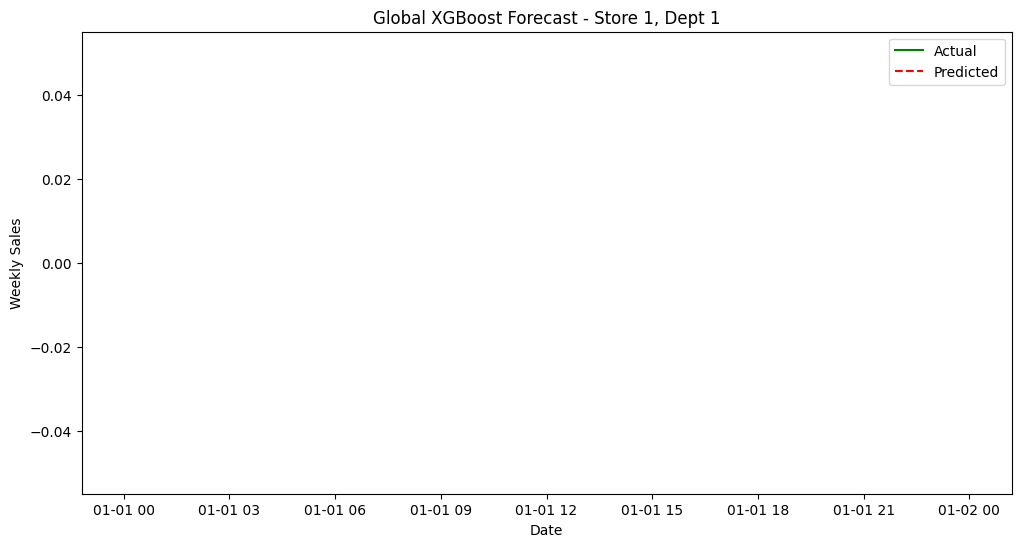

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -------------------------
# 1. Prepare Data
# -------------------------
df = df_forecast.copy()
df["date"] = pd.to_datetime(df["date"])


# Aggregate at Store–Dept level (weekly sums)
df = df.groupby(["Store", "Dept", "date"]).agg({
    "Weekly_Sales": "sum",
    "IsHoliday": "mean",
    "Fuel_Price": "mean",
    "cpi": "mean",
    "unemployment": "mean",
    "Size": "mean",
    "Total_Markdown": "sum"
}).reset_index()

df = df.sort_values(["Store", "Dept", "date"])

# -------------------------
# 2. Feature Engineering
# -------------------------
df["weekofyear"] = df["date"].dt.isocalendar().week.astype(int)
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

# Global lag/rolling features (per Store–Dept group)
df = df.set_index("date")

for lag in [1, 2, 52]:  # short + yearly lag
    df[f"lag_{lag}"] = df.groupby(["Store", "Dept"])["Weekly_Sales"].shift(lag)

for window in [4, 12]:
    df[f"rolling_{window}"] = (
        df.groupby(["Store", "Dept"])["Weekly_Sales"]
        .shift(1)
        .rolling(window)
        .mean()
    )

df = df.reset_index().dropna()

# -------------------------
# 3. Encode categorical features
# -------------------------
# Keep Store and Dept as categorical
df["Store"] = df["Store"].astype("category")
df["Dept"] = df["Dept"].astype("category")



# -------------------------
# 4. Train/Test Split
# -------------------------
train_size = int(df.shape[0] * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

target_col = "Weekly_Sales"
feature_cols = [
    "Store", "Dept", "IsHoliday", "Fuel_Price", "cpi", "unemployment", "Size",  "Total_Markdown",
    "weekofyear", "month", "year",
    "lag_1", "lag_2", "lag_52",
    "rolling_4", "rolling_12"
]

X_train, y_train = train[feature_cols].copy(), train[target_col]
X_test, y_test = test[feature_cols].copy(), test[target_col]

# -------------------------
# 5. Encode Categorical Features
# -------------------------
for col in X_train.select_dtypes(include="category").columns:
    X_train[col] = X_train[col].cat.codes
    X_test[col] = X_test[col].cat.codes

# -------------------------
# 5. Train Global XGBoost
# -------------------------
model = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=600,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# -------------------------
# 6. Forecast & Evaluate
# -------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Global XGBoost RMSE: {rmse:.2f}, R²: {r2:.3f}")






In [ ]:
print(test[["Store", "Dept"]].drop_duplicates().head(20))

       Store Dept
336044    35   41
336097    35   42
336240    35   44
336387    35   46
336566    35   49
336623    35   51
336708    35   52
336851    35   54
336987    35   55
337130    35   56
337266    35   58
337406    35   59
337542    35   60
337685    35   67
337828    35   71
337971    35   72
338114    35   74
338267    35   79
338410    35   80
338544    35   81


In [ ]:
pair_counts = plot_df.groupby(["Store", "Dept"]).size().reset_index(name="n_rows")
print(pair_counts.sort_values("n_rows", ascending=False).head(10))

     Store Dept  n_rows
2976    40   13      91
3100    41   80      91
2982    40   20      91
2979    40   17      91
2978    40   16      91
2977    40   14      91
2626    35   46      91
2975    40   12      91
2974    40   11      91
2973    40   10      91


/tmp/ipython-input-2779382547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pair_counts = plot_df.groupby(["Store", "Dept"]).size().reset_index(name="n_rows")


Rows found for Store=35, Dept=46: 91


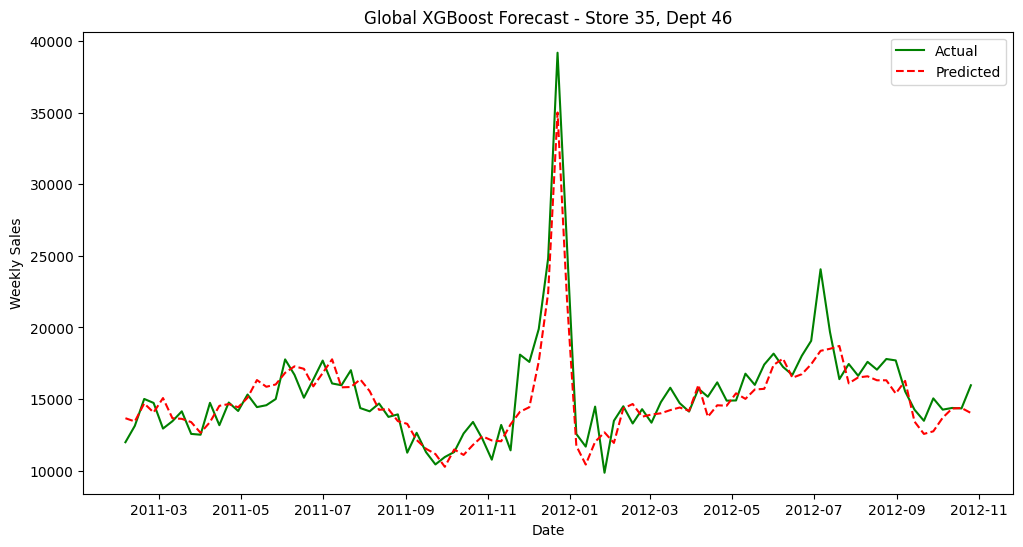

In [ ]:
# Align test, y_test, y_pred properly
plot_df = test[["date", "Store", "Dept"]].reset_index(drop=True).copy()
plot_df["Actual"] = y_test.reset_index(drop=True)
plot_df["Predicted"] = pd.Series(y_pred)

# Choose store–dept
example_store, example_dept = 35,46
mask = (plot_df["Store"].astype(int) == example_store) & (plot_df["Dept"].astype(int) == example_dept)

print(f"Rows found for Store={example_store}, Dept={example_dept}: {mask.sum()}")

# Plot
plt.figure(figsize=(12,6))
plt.plot(plot_df.loc[mask, "date"], plot_df.loc[mask, "Actual"], label="Actual", color="green")
plt.plot(plot_df.loc[mask, "date"], plot_df.loc[mask, "Predicted"], label="Predicted", color="red", linestyle="--")
plt.title(f"Global XGBoost Forecast - Store {example_store}, Dept {example_dept}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1515.521, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1538.433, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1516.034, Time=0.09 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1511.666, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1666.629, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1513.213, Time=0.15 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1512.219, Time=0.15 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1513.958, Time=0.21 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1593.622, Time=0.29 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.721 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Hybrid SARIMA+XGBoost → RMSE: 2183.33, R²: 0.521


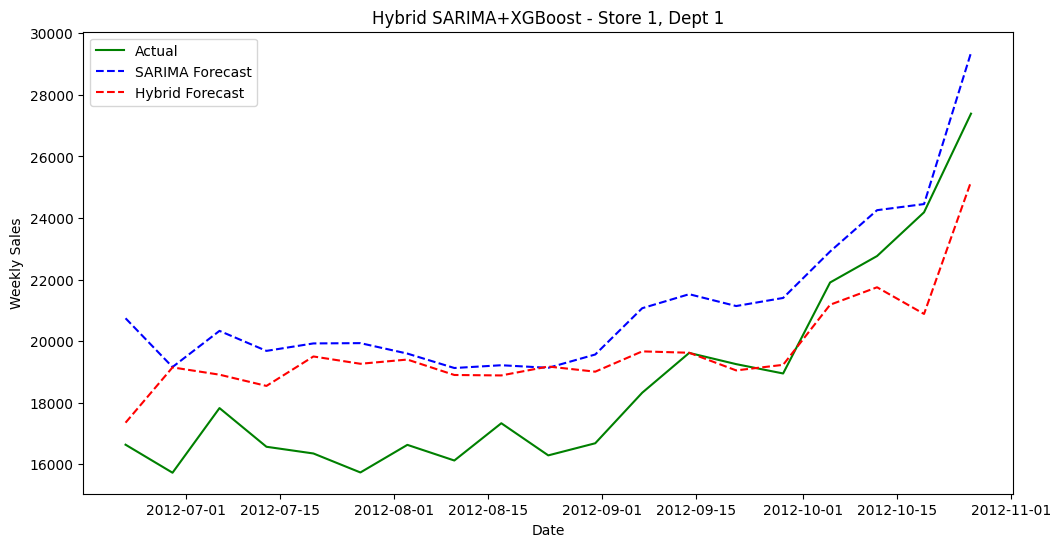

In [ ]:
# Hybrod model
from pmdarima import auto_arima


# -------------------------
# 1. Prepare Data (one Store–Dept)
# -------------------------
store, dept = 1, 1
group = df_forecast[(df_forecast["Store"] == store) & (df_forecast["Dept"] == dept)].copy()
group["date"] = pd.to_datetime(group["date"])
group = group.groupby("date").agg({
    "Weekly_Sales": "sum",
    "IsHoliday": "mean",
    "Fuel_Price": "mean",
    "cpi": "mean",
    "unemployment": "mean",
    "Size": "mean",
    "Total_Markdown": "sum"
}).reset_index()

group = group.sort_values("date").set_index("date")

# Lag/rolling features
group["lag_1"] = group["Weekly_Sales"].shift(1)
group["lag_52"] = group["Weekly_Sales"].shift(52)
group["rolling_4"] = group["Weekly_Sales"].shift(1).rolling(4).mean()
group["rolling_12"] = group["Weekly_Sales"].shift(1).rolling(12).mean()
group["weekofyear"] = group.index.isocalendar().week.astype(int)
group["month"] = group.index.month
group["year"] = group.index.year

group = group.dropna()

target_col = "Weekly_Sales"
feature_cols = ["IsHoliday", "Fuel_Price", "cpi", "unemployment", "Size",  "Total_Markdown",
                "lag_1", "lag_52", "rolling_4", "rolling_12",
                "weekofyear", "month", "year"]

# -------------------------
# 2. Train/Test Split
# -------------------------
train_size = int(len(group) * 0.8)
train, test = group.iloc[:train_size], group.iloc[train_size:]
y_train, y_test = train[target_col], test[target_col]
X_train, X_test = train[feature_cols], test[feature_cols]

# -------------------------
# 3. Fit SARIMA on y_train
# -------------------------
# sarima = SARIMAX(y_train, order=(1,1,1), seasonal_order=(1,1,1,52))
# sarima_fit = sarima.fit(disp=False)
# sarima_pred = sarima_fit.get_forecast(steps=len(y_test)).predicted_mean
# rmse_sarima = np.sqrt(mean_squared_error(y_test, sarima_pred))
# r2_sarima = r2_score(y_test, sarima_pred)

arima_model = auto_arima(
    y_train,
    #seasonal=True, m=52, r2=-1.1
    trace=True, stepwise=True,
    error_action="ignore", suppress_warnings=True)



# In-sample fitted values
fitted_values = arima_model.predict_in_sample(start=0, end=len(y_train)-1)

# Residuals
residuals = y_train.values - fitted_values

# Align with X_train
X_train_resid = X_train.iloc[len(y_train) - len(residuals):]  # just in case
assert len(X_train_resid) == len(residuals)

# -------------------------
# 4. Fit XGBoost on residuals
# -------------------------
xgb = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train_resid, residuals)

# -------------------------
# 5. Forecast on test set
# -------------------------
# Step 1: SARIMA baseline forecast
# sarima_forecast = sarima_fit.get_forecast(steps=len(test)).predicted_mean
arima_forecast = arima_model.predict(n_periods=len(y_test))

# Step 2: XGBoost residual correction
xgb_resid_pred = xgb.predict(X_test)

# Step 3: Hybrid forecast = SARIMA + residual correction
# hybrid_pred = sarima_forecast + xgb_resid_pred
hybrid_pred = arima_forecast + xgb_resid_pred

# -------------------------
# 6. Evaluation
# -------------------------
rmse = np.sqrt(mean_squared_error(y_test, hybrid_pred))
r2 = r2_score(y_test, hybrid_pred)

print(f"Hybrid SARIMA+XGBoost → RMSE: {rmse:.2f}, R²: {r2:.3f}")



# -------------------------
# 7. Plot results
# -------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(test.index, y_test, label="Actual", color="green")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", color="blue", linestyle="--")
plt.plot(test.index, hybrid_pred, label="Hybrid Forecast", color="red", linestyle="--")
plt.title(f"Hybrid SARIMA+XGBoost - Store {store}, Dept {dept}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpq0g8jmug/229hfmlb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq0g8jmug/in6tlabo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59226', 'data', 'file=/tmp/tmpq0g8jmug/229hfmlb.json', 'init=/tmp/tmpq0g8jmug/in6tlabo.json', 'output', 'file=/tmp/tmpq0g8jmug/prophet_model0t4cu5sb/prophet_model-20250922141734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 134627.24, R²: -1.856


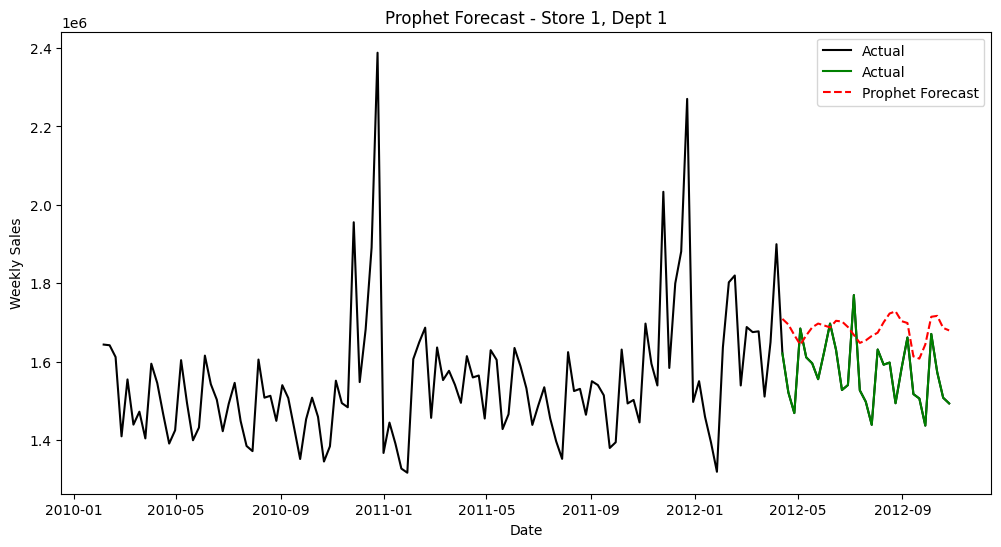

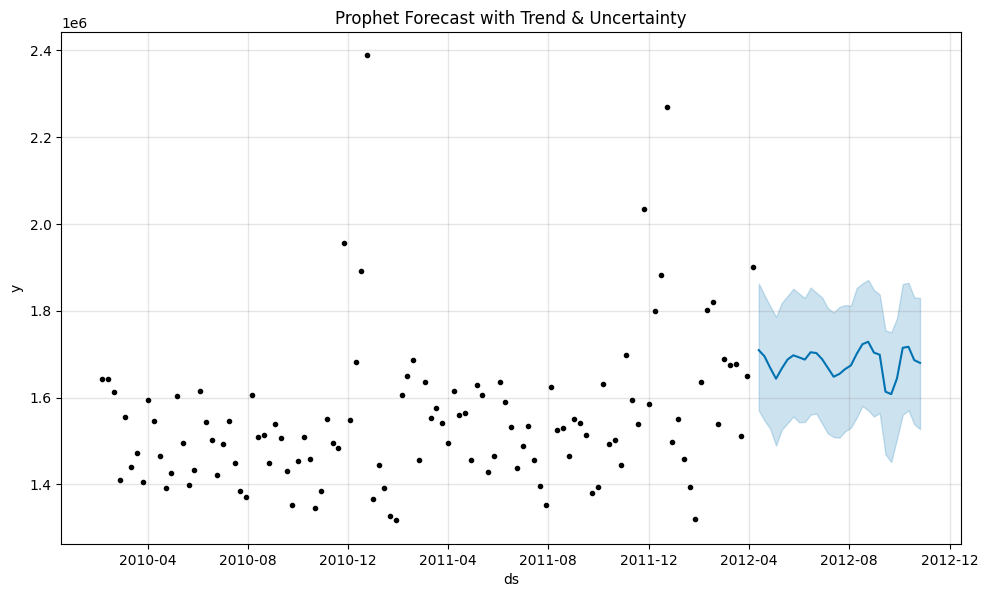

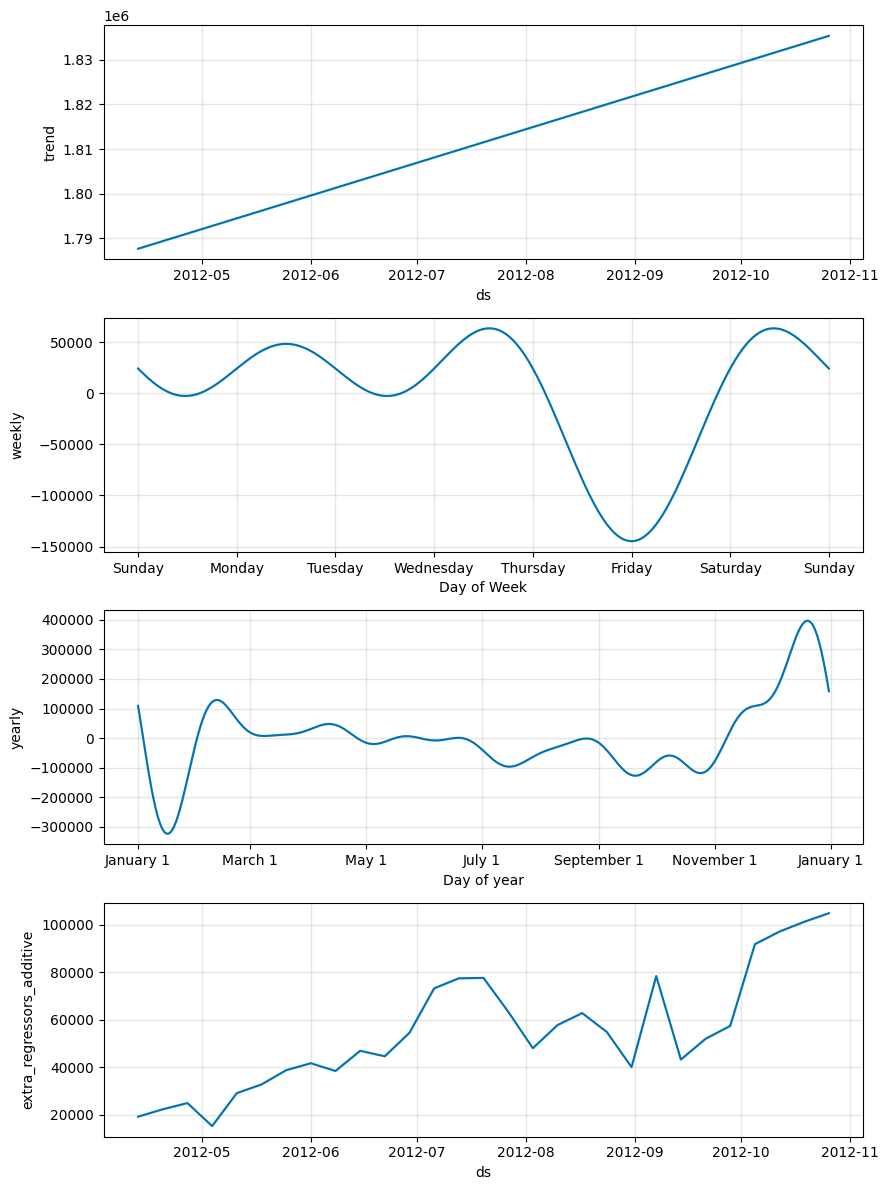

In [ ]:
# prophet

import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. Prepare Data
# -------------------------
# Take one Store–Dept for simplicity
df_forecast['Total_Markdown'] = df_forecast['MarkDown1'] + df_forecast['MarkDown2'] + df_forecast['MarkDown3'] + df_forecast['MarkDown4'] + df_forecast['MarkDown5']

store = 1
group = df_forecast[(df_forecast["Store"] == store)] .copy()

group["date"] = pd.to_datetime(group["date"])
group = group.groupby("date").agg({
    "Weekly_Sales": "sum",
    "IsHoliday": "mean",
    "Fuel_Price": "mean",
    "cpi": "mean",
    "unemployment": "mean",
    "Total_Markdown": "sum"
}).reset_index()

# Prophet requires columns "ds" (date) and "y" (target)
df_prophet = group.rename(columns={"date": "ds", "Weekly_Sales": "y"})

# -------------------------
# 2. Train/Test Split
# -------------------------
train_size = int(len(df_prophet) * 0.8)
train, test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]

# -------------------------
# 3. Define Prophet Model
# -------------------------
m = Prophet(
    yearly_seasonality=True,  # allow yearly patterns
    weekly_seasonality=True,  # allow weekly patterns
    daily_seasonality=False   # not needed here
)

# Add external regressors (optional)
for reg in ["IsHoliday", "Fuel_Price", "cpi", "unemployment","Total_Markdown" ]:
    m.add_regressor(reg)

# -------------------------
# 4. Fit Prophet
# -------------------------
m.fit(train)

# -------------------------
# 5. Make Future DataFrame
# -------------------------
future = test[["ds", "IsHoliday", "Fuel_Price", "cpi", "unemployment", "Total_Markdown"]].copy()

forecast = m.predict(future)

# -------------------------
# 6. Evaluate
# -------------------------
y_true = test["y"].values
y_pred = forecast["yhat"].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Prophet RMSE: {rmse:.2f}, R²: {r2:.3f}")

# -------------------------
# 7. Plot Forecast
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(df_prophet["ds"], df_prophet["y"], label="Actual", color="black")
plt.plot(test["ds"], y_true, label="Actual", color="green")
plt.plot(test["ds"], y_pred, label="Prophet Forecast", color="red", linestyle="--")
plt.title(f"Prophet Forecast - Store {store}, Dept {dept}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# -------------------------
# 8. Prophet's Built-in Plots
# -------------------------
m.plot(forecast)
plt.title("Prophet Forecast with Trend & Uncertainty")
plt.show()

m.plot_components(forecast)  # shows trend, weekly & yearly seasonality
plt.show()


In [ ]:
print(test[["Store","Dept"]].drop_duplicates().head(20))
print((test["Store"]==35).any(), (test["Dept"]==41).any())
print(((test["Store"]==35) & (test["Dept"]==41)).any())

       Store Dept
336044    35   41
336097    35   42
336240    35   44
336387    35   46
336566    35   49
336623    35   51
336708    35   52
336851    35   54
336987    35   55
337130    35   56
337266    35   58
337406    35   59
337542    35   60
337685    35   67
337828    35   71
337971    35   72
338114    35   74
338267    35   79
338410    35   80
338544    35   81
True True
True


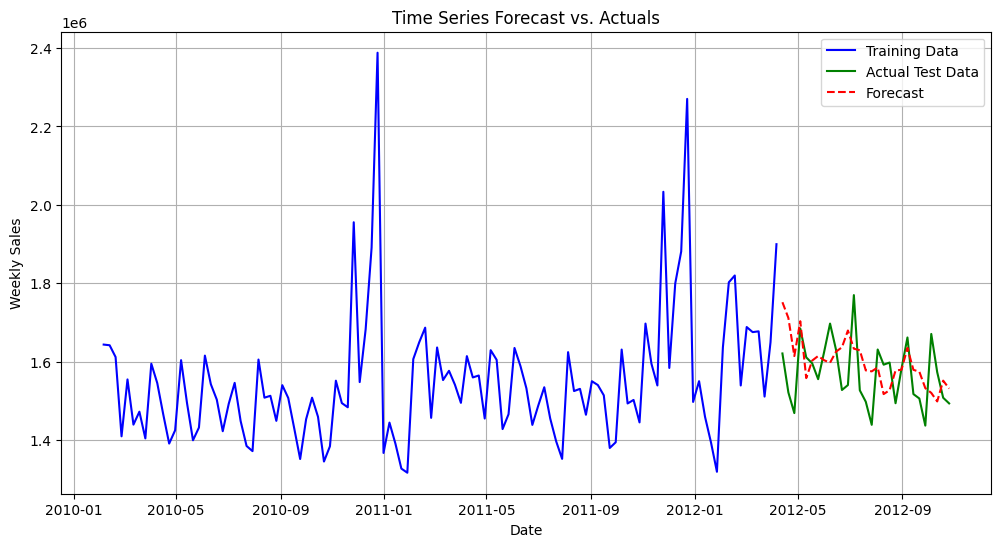

In [ ]:
import matplotlib.pyplot as plt

# Combine training and test data for plotting
train_and_test = pd.concat([y_train, y_test])

plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train.index, y_train, label='Training Data', color='blue')

# Plot the actual test data
plt.plot(test.index, y_test, label='Actual Test Data', color='green')

# Plot the forecasted values
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')

plt.title('Time Series Forecast vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
metrics_sarimax

{'RMSE': np.float64(305437.4185556371),
 'MAPE': np.float64(18.89147407093532),
 'R2': -13.699872287237886}

In [ ]:
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from joblib import Parallel, delayed
import multiprocessing

# Helper to calculate error metrics
def forecast_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true==0, 1, y_true))) * 100
    r2 = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAPE": mape, "R2": r2}


# -----------------------
# Forecast function for one group
# -----------------------
def forecast_group(store_id, group):
    try:

        # Preprocess
        group = group.copy()
        group["date"] = pd.to_datetime(group["date"])

        for i in range(1, 6):
                group[f'MarkDown{i}_lag1'] = group[f'MarkDown{i}'].shift(1)
                #group[f'Markdown{i}_lag2'] = group[f'Markdown{i}'].shift(2)


        group["rolling_mean_4"] = group["Weekly_Sales"].rolling(4).mean().shift(1)
        group = group.groupby('date').agg({
        "Weekly_Sales": "sum",
        "cpi": "mean",
        "unemployment": "mean",
        "Fuel_Price": "mean",
        "Total_Markdown": "sum",
        "Size":"mean",
        "IsHoliday":"mean",
        "MarkDown1":"sum",
        "MarkDown2":"sum",
        "MarkDown3":"sum",
        "MarkDown4":"sum",
        "MarkDown5":"sum",
        'MarkDown1_lag1':"sum",
        'MarkDown2_lag1':"sum",
        'MarkDown3_lag1':"sum",
        'MarkDown4_lag1':"sum",
        'MarkDown5_lag1':"sum",
        "week":"mean",
        "rolling_mean_4": "mean"
        }).reset_index()

        group = group.sort_values("date").set_index("date")
        group["week"] = group["date"].dt.isocalendar().week.astype(int)
        target_col = "Weekly_Sales"
        exog_cols =[  "IsHoliday",
                    #"MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5",
                      "Total_Markdown"]
        #              'MarkDown1_lag1',
        # 'MarkDown2_lag1',
        # 'MarkDown3_lag1',
        # 'MarkDown4_lag1',
        # 'MarkDown5_lag1'
        # ]

        group = group.replace([np.inf, -np.inf], np.nan)
        group = group.dropna(subset=[target_col]+exog_cols)
        exog_cols.append("rolling_mean_4")


        # sarima with no exog r2=0.08
        if len(group) < 60:
            return []  # skip if not enough history
        train_size = int(len(group) * 0.8)
        train, test = group.iloc[:train_size], group.iloc[train_size:]
        y_train, y_test = train[target_col], test[target_col]

        model = SARIMAX(
              y_train,
              order=(1,1,1),              # ARIMA part
              seasonal_order=(1,1,1,52),  # yearly seasonality
              enforce_stationarity=False,
              enforce_invertibility=False
          )

        sarima_fit = model.fit(disp=False)

        # Forecast
        sarima_forecast = sarima_fit.get_forecast(steps=len(y_test))
        sarima_pred = sarima_forecast.predicted_mean

          # --------------------------
          # Evaluation
          # --------------------------
        rmse = np.sqrt(mean_squared_error(y_test, sarima_pred))
        r2 = r2_score(y_test, sarima_pred)
        print(f"SARIMA RMSE: {rmse:.2f}, SARIMA R²: {r2:.3f}")

          # auto arima with no exog
          auto_model = auto_arima(
              y_train,
              #seasonal=True, m=52, r2=-1.1
              trace=True, stepwise=True,
              error_action="ignore", suppress_warnings=True
          )
          # print(auto_model.summary())
          pred = auto_model.predict(n_periods=len(y_test))

        # ------------------
        # 1. SARIMAX
        # ------------------
        sarimax = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(1,1,1,52))
        sarimax_fit = sarimax.fit(disp=False)
        sarimax_forecast = sarimax_fit.get_forecast(steps=len(y_test), exog=X_test)
        sarimax_pred = sarimax_forecast.predicted_mean
        metrics_sarimax = forecast_metrics(y_test, sarimax_pred)

        results.append({"Store": store_id,  "Model": "SARIMAX", **metrics_sarimax})

        # ------------------
        # 2. XGBoost
        # ------------------
        XGB_model = XGBRegressor(objective="reg:squarederror", n_estimators=200, learning_rate=0.1)
        XGB_model.fit(X_train, y_train)
        xgb_pred = XGB_model.predict(X_test)
        metrics_xgb = forecast_metrics(y_test, xgb_pred)

        results.append({"Store": store_id,  "Model": "XGBoost", **metrics_xgb})

        return results

    except Exception as e:
        print(f"Skipped Store {store_id}, due to error: {e}")
        return []


# -----------------------
# Run in Parallel
# -----------------------
groups = list(df_corr.groupby(["Store"]))

n_jobs = multiprocessing.cpu_count()  # use all CPU cores
print(f"Running with {n_jobs} parallel jobs...")

all_results = Parallel(n_jobs=n_jobs)(
    delayed(forecast_group)(store_id,  group) for (store_id), group in tqdm(groups)
)

# Flatten list of lists
all_results = [item for sublist in all_results for item in sublist]

# Convert to DataFrame
results_df = pd.DataFrame(all_results)


# -----------------------
# Aggregate Performance
# -----------------------
# summary = results_df.groupby("Model")[["RMSE","MAPE","R2"]].mean().sort_values("RMSE")
# print("Average Forecasting Performance Across All Stores & Depts")
# display(summary.style.format("{:.2f}"))

# -----------------------
# Best Model per Store–Dept
# -----------------------
# best_models = results_df.loc[results_df.groupby(["Store"])["RMSE"].idxmin()]
# best_model_counts = best_models["Model"].value_counts()

# print("Best Model Chosen Most Often:")
# print(best_model_counts)

# # -----------------------
# # Example Plot for One Store–Dept
# # -----------------------
# example = (1,1)
# ex_results = results_df[(results_df["Store"]==example[0]) ]

# plt.figure(figsize=(8,5))
# plt.bar(ex_results["Model"], ex_results["RMSE"], color="skyblue")
# plt.title(f"RMSE Comparison - Store {example[0]}")
# plt.ylabel("RMSE")
# plt.show()


Running with 2 parallel jobs...



100%|██████████| 45/45 [00:00<00:00, 57.19it/s]


In [ ]:
print(group["date"].head())             # Check data type
print(group["date"].dtype)              # Should be datetime64


KeyError: 'date'

In [ ]:
print(results_df.head())
print(results_df.columns)
print(len(results_df))


Empty DataFrame
Columns: []
Index: []
RangeIndex(start=0, stop=0, step=1)
0


In [ ]:
df_corr.info()

NameError: name 'df_corr' is not defined

In [ ]:


# Load your data (assuming 'df' already exists)
# df = pd.read_csv('your_data.csv')

# Preprocessing
# Ensure date column is datetime

df_corr = df_corr.sort_values(by=['Store', 'Dept', 'Date'])

# Define target and exogenous features
target_col = 'Weekly_Sales'
exog_cols = ['cpi', 'unemployment', 'Fuel_Price', 'Size']

# Group by Store and Dept
grouped = df_corr.groupby(['Store', 'Dept'])

results = []

for (store, dept), group in grouped:
    if len(group) < 30:
        continue  # Not enough data

    df = group.copy()
    df = df.sort_values('Date')

    # Short-term (up to 4 weeks ahead) forecast using XGBoost
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Year'] = df['Date'].dt.year

    # df['Target'] = df[target_col].shift(-1)
    # df = df.dropna()

    # X = df[exog_cols + ['Week', 'Year']]
    # y = df['Target']

    # # print(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # xgb_model = XGBRegressor(objective='reg:squarederror')
    # xgb_model.fit(X_train, y_train)
    # y_pred_xgb = xgb_model.predict(X_test)
    # xgb_rmse = r2_score(y_test, y_pred_xgb)

    # # Long-term forecast using Prophet
    # prophet_df = df[['Date', target_col]].rename(columns={'Date': 'ds', target_col: 'y'})
    # m = Prophet()
    # m.fit(prophet_df)
    # future = m.make_future_dataframe(periods=12, freq='W')  # 3-month forecast
    # prophet_forecast = m.predict(future)[['ds', 'yhat']].tail(12)

    # # Long-term forecast using SARIMAX (with weekly frequency)
    sarimax_df = df.set_index('Date')
    sarimax_endog = sarimax_df[target_col]
    sarimax_exog = sarimax_df[exog_cols]

    try:
        sarimax_model = SARIMAX(sarimax_endog, exog=sarimax_exog, order=(1,1,1), seasonal_order=(1,1,1,52))
        sarimax_result = sarimax_model.fit(disp=False)
        sarimax_forecast = sarimax_result.get_forecast(steps=12, exog=sarimax_exog.tail(12))
        sarimax_pred = sarimax_forecast.predicted_mean
    except Exception as e:
      sarimax_pred = pd.Series([np.nan]*12)

    results.append({
        # 'Store': store,
        # 'Dept': dept,
        # 'XGB_RMSE': xgb_rmse,
        # 'Prophet_Forecast': prophet_forecast,
          'SARIMAX_Forecast': sarimax_pred.reset_index(drop=True)
    })

forecast_results = pd.DataFrame(results)
print(forecast_results.head())


ValueError: Found input variables with inconsistent numbers of samples: [81, 5]

In [ ]:


from statsmodels.tsa.statespace.sarimax import SARIMAX
grouped = df_corr.groupby(['Store', 'Dept'])
result = []
for (store, dept), group in grouped:
  if len(group) < 30:
      continue
  # Set the index to Date and sort
  df_ts = df_corr[(df_corr['Store'] == store) & (df_corr['Dept'] == dept)].copy()

  df_ts['date'] = pd.to_datetime(df_ts['date'])
  df_ts = df_ts.set_index('date')
  df_ts = df_ts.asfreq('W-FRI')  # or whatever matches your actual data


  # Ensure no missing values in exog
  exog_cols = [ 'cpi', 'unemployment', 'Fuel_Price']
  df_ts = df_ts.dropna(subset=exog_cols + ['Weekly_Sales'])

  # Train SARIMAX

  df_ts['diff_sales'] = df_ts['Weekly_Sales'].diff().dropna()
  endog = df_ts['diff_sales']

  exog = df_ts[exog_cols]

  # Split train/test
  train_end = int(0.8 * len(df_ts))
  endog_train, endog_test = endog[:train_end], endog[train_end:]
  endog_train_log = np.log1p(endog_train)
  endog_test_log = np.log1p(endog_test)

  exog_train, exog_test = exog[:train_end], exog[train_end:]


  # auto_model = auto_arima(
  #     endog_train,
  #     exogenous=exog_train,
  #     seasonal=True,
  #     m=52,  # if weekly data with yearly seasonality
  #     trace=True,
  #     stepwise=True,
  #     suppress_warnings=True
  # )
  # print(auto_model.order)
  # print(auto_model.seasonal_order)


  #Define and fit model (tune orders as needed)
  model = SARIMAX(endog_train,
                  exog=exog_train,
                  order=[1,0,1],
                  seasonal_order=[1,0,0,52],
                  enforce_stationarity=True,
                  enforce_invertibility=True)
  results = model.fit(disp=False)

  # model_no_exog = SARIMAX(endog_train,
  #                         order=auto_model.order,
  #                         seasonal_order=auto_model.seasonal_order)
  # results_no_exog = model_no_exog.fit(disp=False)
  # pred_no_exog = results_no_exog.get_forecast(steps=len(endog_test)).predicted_mean
  # print("SARIMAX R² without exog:", r2_score(endog_test, pred_no_exog))
  # forecast = results.get_forecast(steps=len(endog_test), exog=exog_test)
  # predicted = np.expm1(forecast.predicted_mean)

  # # Forecast
  forecast = results.get_forecast(steps=len(endog_test), exog=exog_test)
  predicted = forecast.predicted_mean

  # # Evaluate
  sarimax_r2 = r2_score(endog_test, predicted)
  result.append(sarimax_r2)
  # print(f"SARIMAX R2: {sarimax_r2:.3f}")
print(f'avg r2 = {sum(result)/len(result)}')


LinAlgError: LU decomposition error.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Helper metrics
def forecast_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAPE": mape, "R2": r2}

# Pick one store-dept to demonstrate
store_id, dept_id = 1, 1
df_store_dept = df_corr[(df_corr["Store"]==store_id) & (df_corr["Dept"]==dept_id)].copy()

df_store_dept["Date"] = pd.to_datetime(df_store_dept["Date"])
df_store_dept = df_store_dept.sort_values("Date")
df_store_dept = df_store_dept.set_index("Date").asfreq("W-FRI")

target_col = "Weekly_Sales"
exog_cols = ["cpi","unemployment","Fuel_Price","total_markdowns"]

# Drop missing
df_store_dept = df_store_dept.dropna(subset=[target_col]+exog_cols)

# Train/test split (last 20% for test)
train_size = int(len(df_store_dept)*0.8)
train, test = df_store_dept.iloc[:train_size], df_store_dept.iloc[train_size:]

y_train, y_test = train[target_col], test[target_col]
X_train, X_test = train[exog_cols], test[exog_cols]

# ------------------------------
# 1. SARIMAX
# ------------------------------
sarimax = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(1,1,1,52))
sarimax_fit = sarimax.fit(disp=False)

sarimax_forecast = sarimax_fit.get_forecast(steps=len(y_test), exog=X_test)
sarimax_pred = sarimax_forecast.predicted_mean

metrics_sarimax = forecast_metrics(y_test, sarimax_pred)

# ------------------------------
# 2. Prophet
# ------------------------------
prophet_df = train.reset_index()[["Date",target_col]].rename(columns={"Date":"ds", target_col:"y"})
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
for col in exog_cols:  # add regressors
    m.add_regressor(col)

prophet_df[exog_cols] = X_train.reset_index()[exog_cols]
m.fit(prophet_df)

future = test.reset_index()[["Date"]].rename(columns={"Date":"ds"})
future[exog_cols] = X_test.reset_index()[exog_cols]

prophet_forecast = m.predict(future)
prophet_pred = prophet_forecast["yhat"].values

metrics_prophet = forecast_metrics(y_test.values, prophet_pred)

# ------------------------------
# 3. XGBoost
# ------------------------------
XGB_model = XGBRegressor(objective="reg:squarederror", n_estimators=200, learning_rate=0.1)
XGB_model.fit(X_train, y_train)

xgb_pred = XGB_model.predict(X_test)
metrics_xgb = forecast_metrics(y_test, xgb_pred)

# ------------------------------
# Compare Models
# ------------------------------
results = pd.DataFrame([metrics_sarimax, metrics_prophet, metrics_xgb],
                       index=["SARIMAX","Prophet","XGBoost"])
display(results.style.format("{:.2f}"))

# ------------------------------
# Plot Actual vs Predictions
# ------------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual", color="black")
plt.plot(y_test.index, sarimax_pred, label="SARIMAX", linestyle="--")
plt.plot(y_test.index, prophet_pred, label="Prophet", linestyle="--")
plt.plot(y_test.index, xgb_pred, label="XGBoost", linestyle="--")
plt.title(f"Forecast Comparison - Store {store_id}, Dept {dept_id}")
plt.xlabel("Date"); plt.ylabel("Weekly Sales")
plt.legend()
plt.show()
